# **Doctor Fee Prediction**
![alt text](https://pearlhealth.com/wp-content/uploads/2022/12/Machine-Learning__Feature.png)


# Team :


* Nour Sameh El Barbary
* Hoor Hisham
* Nour El Mohammady
* Rawan Badr
* Mennatallah Maged


#instruction : comment the visualisation in cities for running faster
# pip install category_encoders


In [ ]:
# pip install category_encoders

# Importing libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np


import time
from sklearn.ensemble import GradientBoostingRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from tabulate import tabulate

# Check if the data is normally distributed
from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, MultiLabelBinarizer, LabelEncoder
import re
import category_encoders as ce

# For modeling
from scipy import stats
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from geopy.geocoders import Nominatim

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import time
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [ ]:
df = pd.read_csv('DoctorFeePrediction.csv')

#Data Description

* **Doctor Name**: The name of the doctor.
* **City**: The city where the doctor is located.
* **Specialization**: The area of specialization or medical expertise of the doctor.
* **Doctor Qualification**: The qualifications or degrees held by the doctor.
* **Experience (Years)**: The number of years of experience the doctor has.
* **Total Reviews**: The total number of reviews received by the doctor.
* **Patient Satisfaction Rate (%age)**: The percentage of patients satisfied with the doctor's services.
* **Avg Time to Patients (mins)**: The average time taken by the doctor to attend to patients.
* **Wait Time (mins)**: The average wait time for patients before being attended to by the doctor.
* **Hospital Address**: The address of the hospital where the doctor practices.
* **Doctors Link**: A link to the doctor's profile or information.
* **Fee (PKR)**: The consultation fee charged by the doctor .

# **Task 1: Explore and Familiarize with the Dataset:**

![alt text](https://assets-global.website-files.com/62c609e220cfd73d2f4f179b/639146ee91bb9016fd8cf0a3_Data%20Exploration%20(1).png)


In [ ]:
df.shape

(2386, 12)

* Dataset consists of **```2386 rows```** and **```12 columns```**.

##1 Dive into the dataset to uncover any peculiarities or unexpected patterns that may influence linear regression modeling.



##2.Utilize domain knowledge to identify potential interactions or nonlinear relationships between features and the target variable **"Fee(PKR)"**.

In [ ]:
df.head().style.background_gradient('Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Doctor Name                      2386 non-null   object 
 1   City                             2386 non-null   object 
 2   Specialization                   2386 non-null   object 
 3   Doctor Qualification             2386 non-null   object 
 4   Experience(Years)                2386 non-null   float64
 5   Total_Reviews                    2386 non-null   int64  
 6   Patient Satisfaction Rate(%age)  2386 non-null   int64  
 7   Avg Time to Patients(mins)       2386 non-null   int64  
 8   Wait Time(mins)                  2386 non-null   int64  
 9   Hospital Address                 2386 non-null   object 
 10  Doctors Link                     2386 non-null   object 
 11  Fee(PKR)                         2386 non-null   int64  
dtypes: float64(1), int64

In [ ]:
df.dtypes

Doctor Name                         object
City                                object
Specialization                      object
Doctor Qualification                object
Experience(Years)                  float64
Total_Reviews                        int64
Patient Satisfaction Rate(%age)      int64
Avg Time to Patients(mins)           int64
Wait Time(mins)                      int64
Hospital Address                    object
Doctors Link                        object
Fee(PKR)                             int64
dtype: object

**Dataset Overview :**
1. No null values but there may be missing values
2. data need to be encoded "Doctor Name" , "City", "Specialization" , "Doctor Qualification" ,"Hospital Address", "Doctors Link"

In [ ]:
df.duplicated().sum()

13

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Doctor Name             City  \
111                  Dr. Ahmed Sajjad        ISLAMABAD   
297    Asst. Prof. Dr. Fahmina Ashfaq           LAHORE   
468                 Dr. Muhammad Asif           MARDAN   
796        Dr. Muhammad Akram Kumbhar        ISLAMABAD   
1161          Dr. Muzammil Ayub Mehar       GUJRANWALA   
1574             Dr. Muhammad Shahzad         PESHAWAR   
1600              Dr. Aftab Ali Malik        ISLAMABAD   
1763                Dr. Aasif Gurmani  DERA-GHAZI-KHAN   
1869  Prof. Dr. Ghulam Ali Mundrawala          KARACHI   
2005          Dr. Syed Babar Hussnain           GUJRAT   
2010   Dr. Kashif Ud Din Qayum Soomro        HYDERABAD   
2085    Asst. Prof. Dr. Faheem Ul Haq       ABBOTTABAD   
2252                 Dr. Ahmad Nadeem           LAHORE   

                                         Specialization  \
111                  Urologist, Sexologist, Andrologist   
297   Internal Medicine Specialist, General Physicia...   
468                               Urologist, Sexologist   
796                               Urologist, Sexologist   
1161                    General Physician, Pediatrician   
1574   Urologist, Sexologist, Andrologist, Nephrologist   
1600                 Urologist, Sexologist, Andrologist   
1763                 Urologist, Sexologist, Andrologist   
1869              Gastroenterologist, General Physician   
2005  General Physician, General Physician, Gastroen...   
2010                 Urologist, Andrologist, Sexologist   
2085                 Urologist, Andrologist, Sexologist   
2252                      Sexologist, General Physician   

                                   Doctor Qualification  Experience(Years)  \
111                                MBBS, FCPS (Urology)               33.0   
297              MBBS, FCPS (Medicine), MRCP (Medicine)               14.0   
468                            MBBS , FCPS ( Urology )                 6.0   
796                                 MBBS, M.S (Urology)               15.0   
1161                                                 MD               15.0   
1574                              MBBS, FCPS, FICS(USA)               28.0   
1600                               MBBS, FCPS (Urology)               35.0   
1763  MBBS, FCPS (Urology), FCPS (General Surgery), ...               16.0   
1869      MBBS, MD (Medicine), MCPS (Forensic Medicine)               42.0   
2005             MBBS, MCPS (Medicine), FCPS (Medicine)               20.0   
2010                         MBBS, MCPS, FCPS (urology)                8.0   
2085                             MBBS, FCPS, MRCS, MCPS               12.0   
2252                                 MBBS, PGD Sexology               31.0   

      Total_Reviews  Patient Satisfaction Rate(%age)  \
111             387                               97   
297             128                               96   
468               7                              100   
796              88                               96   
1161            134                               97   
1574            297                               95   
1600            586                               96   
1763            327                               97   
1869            730                               97   
2005            129                               96   
2010              1                              100   
2085             30                               97   
2252            310                               96   

      Avg Time to Patients(mins)  Wait Time(mins)  \
111                           14               11   
297                           14               11   
468                           14               11   
796                           14               11   
1161                          14               11   
1574                          14               11   
1600                          14               11   
1763                          14               11   
1869                          1

In [ ]:
#1
def drop_duplicates(df):
    df.drop_duplicates(inplace=True)

drop_duplicates(df)

In [ ]:
df.shape

(2373, 12)

In [ ]:
df.nunique()

Doctor Name                        2190
City                                117
Specialization                      150
Doctor Qualification               1041
Experience(Years)                    52
Total_Reviews                       361
Patient Satisfaction Rate(%age)      25
Avg Time to Patients(mins)           28
Wait Time(mins)                      47
Hospital Address                   1178
Doctors Link                       1606
Fee(PKR)                             48
dtype: int64

In [ ]:
df.isnull().sum()

Doctor Name                        0
City                               0
Specialization                     0
Doctor Qualification               0
Experience(Years)                  0
Total_Reviews                      0
Patient Satisfaction Rate(%age)    0
Avg Time to Patients(mins)         0
Wait Time(mins)                    0
Hospital Address                   0
Doctors Link                       0
Fee(PKR)                           0
dtype: int64

Satistics for **categorical** columns.

In [ ]:
df.describe()

Experience(Years)  Total_Reviews  Patient Satisfaction Rate(%age)  \
count        2373.000000    2373.000000                      2373.000000   
mean           11.793721      91.650653                        96.656131   
std             8.744012     282.258562                         4.974700   
min             1.000000       0.000000                        33.000000   
25%             6.000000       0.000000                        94.000000   
50%            10.000000       8.000000                        98.000000   
75%            14.000000      53.000000                       100.000000   
max            53.000000    5147.000000                       100.000000   

       Avg Time to Patients(mins)  Wait Time(mins)      Fee(PKR)  
count                 2373.000000      2373.000000   2373.000000  
mean                    14.091024        11.260851   1199.126001  
std                      2.729078         5.647961    831.269332  
min                      3.000000         0.000000      0.000000  
25%                     14.000000        10.000000    600.000000  
50%                     14.000000        11.000000   1000.000000  
75%                     15.000000        11.000000   1500.000000  
max                     50.000000        82.000000  10000.000000

In [ ]:
df.describe(include='O').T

count unique                   top freq
Doctor Name           2373   2190    Dr. Muhammad Amjad    4
City                  2373    117                LAHORE  151
Specialization        2373    150     General Physician  406
Doctor Qualification  2373   1041                  MBBS  332
Hospital Address      2373   1178  No Address Available  552
Doctors Link          2373   1606     No Link Available  645

found out that most freq in these 2 cols 'Hospital Address' & 'Doctors Link	' No Address Available & No Link Available	**So** we may drop them

In [ ]:
def rename_columns(df):
    df.rename(columns={'Fee(PKR)': 'Fee',
                       'Patient Satisfaction Rate(%age)': 'Patient_Satisfaction_Rate',
                       'Experience(Years)': 'Experience_Years',
                       'Avg Time to Patients(mins)': 'Avg_time_per_Patient',
                       'Wait Time(mins)': 'Wait_Time'}, inplace=True)

rename_columns(df)

In [ ]:
rename_columns_transformer = FunctionTransformer(rename_columns)


pipeline = Pipeline([
    ('rename_columns', rename_columns_transformer)
])

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Doctor Name', 'City', 'Specialization', 'Doctor Qualification',
       'Hospital Address', 'Doctors Link'],
      dtype='object')

# 1.Doctor Name

## Cleaning

In [ ]:
df[['Doctor Name']].describe().T

count unique                 top freq
Doctor Name  2373   2190  Dr. Muhammad Amjad    4

In [ ]:
doctor_name_counts = df['Doctor Name'].value_counts()
duplicate_doctor_names = doctor_name_counts[doctor_name_counts > 1]
print(duplicate_doctor_names)

Doctor Name
Dr. Muhammad Amjad                                4
Asst. Prof. Dr. Mujahid Israr                     4
Dr. Asim Munir Alvi Consultant Endocrinologist    3
Dr. Muhammad Saddiq Haris                         3
Asst. Prof. Dr. Shoaib Manzoor                    3
                                                 ..
Dr. Maria Anwar                                   2
Assoc. Prof. Dr. Mudassar Nazar                   2
Dr. Wasim Akram                                   2
Assoc. Prof. Dr. Fowad Shahzad                    2
Prof. Dr. Fawad Nasrullah                         2
Name: count, Length: 167, dtype: int64


In [ ]:
# Find repeated doctor names

duplicate_doctor_names = doctor_name_counts[doctor_name_counts > 1].index

print(duplicate_doctor_names)

Index(['Dr. Muhammad Amjad', 'Asst. Prof. Dr. Mujahid Israr',
       'Dr. Asim Munir Alvi Consultant Endocrinologist',
       'Dr. Muhammad Saddiq Haris', 'Asst. Prof. Dr. Shoaib Manzoor',
       'Dr. Sumera Yousaf', 'Dr. Zahid Hassan', 'Dr. Abdul Basit',
       'Dr. Moazzam Javaid Cheema', 'Asst. Prof. Dr. Mubeen Ahmed Memon',
       ...
       'Dr. Arshad Khan', 'Dr. Zainab', 'Dr. Mashood Zia',
       'Prof. Dr. Salman Ahmed Tipu', 'Dr. Sohail Ahmed Khan',
       'Dr. Maria Anwar', 'Assoc. Prof. Dr. Mudassar Nazar', 'Dr. Wasim Akram',
       'Assoc. Prof. Dr. Fowad Shahzad', 'Prof. Dr. Fawad Nasrullah'],
      dtype='object', name='Doctor Name', length=167)


In [ ]:
duplicate_data = df[df['Doctor Name'].isin(duplicate_doctor_names)]

sorted_duplicate_data = duplicate_data.sort_values(by='Doctor Name')

sorted_duplicate_data.head()

Doctor Name          City  \
1457   Assoc. Prof. Dr. Fowad Shahzad        LAHORE   
1156   Assoc. Prof. Dr. Fowad Shahzad    GUJRANWALA   
10       Assoc. Prof. Dr. Irfan Munir    FAISALABAD   
1827     Assoc. Prof. Dr. Irfan Munir    FAISALABAD   
20    Assoc. Prof. Dr. Mudassar Nazar  BAHAWALNAGAR   

                                 Specialization  \
1457  Nephrologist, Nephrologist, Diabetologist   
1156  Nephrologist, Nephrologist, Diabetologist   
10           Urologist, Sexologist, Andrologist   
1827         Urologist, Sexologist, Andrologist   
20                           Orthopedic Surgeon   

                                   Doctor Qualification  Experience_Years  \
1457  American Diabetologist (Sugar Specialist), Nep...              18.0   
1156  American Diabetologist (Sugar Specialist), Nep...              18.0   
10           MBBS, FCPS, Associate Professor of Urology               8.0   
1827         MBBS, FCPS, Associate Professor of Urology               8.0   
20    MBBS, FCPS Trauma &amp; Orthopaedics, FRCS Tra...              12.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
1457             43                         82                    14   
1156             43                         82                    14   
10               94                        100                    14   
1827             94                        100                    14   
20               10                        100                    14   

      Wait_Time                                   Hospital Address  \
1457         11  Doctors Hospital Medical Center, johar town, L...   
1156         11         Siddique Family Clinic, Green Town, Lahore   
10           11   Saad Medical Complex, Peoples Colony, Faisalabad   
1827          8   Saad Medical Complex, Peoples Colony, Faisalabad   
20            9  Life Care Medical Complex, wuqla colony, Bahaw...   

                                           Doctors Link    Fee  
1457  https://www.marham.pk/doctors/lahore/endocrino...  10000  
1156  https://www.marham.pk/doctors/lahore/endocrino...  10000  
10    https://www.marham.pk/doctors/faisalabad/urolo...   2000  
1827  https://www.marham.pk/doctors/faisalabad/urolo...   2000  
20    https://www.marham.pk/doctors/bahawalpur/ortho...   1200

In [ ]:
for name in sorted_duplicate_data['Doctor Name'].unique():
    doctor_data = sorted_duplicate_data[sorted_duplicate_data['Doctor Name'] == name]

    print('----------------------------------------')
    print(f"Doctor Name: {name}")
    print('----------------------------------------')

    doctor_data

    print(f"Number of rows: {len(doctor_data)}")

----------------------------------------
Doctor Name: Assoc. Prof. Dr. Fowad Shahzad
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Assoc. Prof. Dr. Irfan Munir
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Assoc. Prof. Dr. Mudassar Nazar
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Assoc. Prof. Dr. Muhammad Farooq
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Asst. Prof. Dr. Adil Hassan Chang
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Asst. Prof. Dr. Alamzeb Khan
----------------------------------------
Number of rows: 2
----------------------------------------
Doctor Name: Asst. Prof. Dr. Asif Malik
----------------------------------------
Number of ro

the duplicated names maybe Similarity of names we will see that when se more relation with other columns like 'Link'


In [ ]:
#1
def extract_titles_and_clean_name(name):
    # Define a regex pattern for titles
    title_regex = r'(Dr\.|Prof\.|Mr\.|Ms\.|Colonel|Assoc\. Prof\. Dr\.|Asst\. Prof\. Dr\.|Prof\. Dr\.)'

    # List of accepted titles
    accepted_titles = ["Dr", "Asst Prof Dr", "Prof, Dr", "Assoc Prof Dr"]

    # Find all titles in the name
    titles = re.findall(title_regex, name)

    # Clean the name by removing the extracted titles
    cleaned_name = re.sub(title_regex, '', name).strip()

    # Convert titles to a cleaned string without periods
    title_str = ', '.join(titles).replace('.', '').strip()

    # Check if the concatenated title string is in the list of accepted titles
    if title_str not in accepted_titles:
        title_str = 'others'

    return title_str, cleaned_name


df[['Titles', 'Cleaned Name']] = df['Doctor Name'].apply(lambda x: pd.Series(extract_titles_and_clean_name(x)))

df['Doctor Name'] = df['Cleaned Name']
df.drop('Cleaned Name', axis=1, inplace=True)

df.head()

Doctor Name         City     Specialization  \
0   Umair Hafeez   GUJRANWALA     Ent Specialist   
1  Haris Shakeel    RAJAN-PUR  General Physician   
2    Iqra Rehman  MIRPUR-KHAS  General Physician   
3     Erum Memon    HYDERABAD       Gynecologist   
4    Aisha Ahmad       LAHORE      Dermatologist   

                                Doctor Qualification  Experience_Years  \
0          MBBS , FCPS ( Otorhinolaryngologic ENT )                6.0   
1                                               MBBS               1.0   
2      MBBS, RMP, CFP (USA), Certified in Covid 19 +               6.0   
3                MBBS, FCPS (Gynae &amp; Obstetrics)              11.0   
4  MBBS, FCPS (Dermatology), Certified (Aesthetic...              12.0   

   Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  Wait_Time  \
0             11                        100                    19          6   
1              0                         94                    14         11   
2              9                        100                    10          0   
3             71                         96                    18         10   
4            199                        100                    16          2   

                              Hospital Address  \
0  Central Hospital, Jinnah Colony, Gujranwala   
1                         No Address Available   
2   Rehman Clinic, tandoadam naka, Mirpur Khas   
3       Mehmood Hospital, Qasimabad, Hyderabad   
4             Skinnovation, Johar Town, Lahore   

                                        Doctors Link   Fee Titles  
0  https://www.marham.pk/doctors/gujranwala/ent-s...  2000     Dr  
1                                  No Link Available   500     Dr  
2  https://www.marham.pk/doctors/mirpur-khas/gene...  1000     Dr  
3  https://www.marham.pk/doctors/hyderabad/gyneco...   800     Dr  
4  https://www.marham.pk/doctors/lahore/dermatolo...  1500     Dr

In [ ]:
df['Titles'].nunique()

5

In [ ]:
empty_title_rows = df[df['Titles'] == '']

# Display these rows
empty_title_rows

Empty DataFrame
Columns: [Doctor Name, City, Specialization, Doctor Qualification, Experience_Years, Total_Reviews, Patient_Satisfaction_Rate, Avg_time_per_Patient, Wait_Time, Hospital Address, Doctors Link, Fee, Titles]
Index: []

In [ ]:
title_counts = df['Titles'].value_counts()
title_counts

Titles
Dr               1897
Asst Prof Dr      247
Prof, Dr          148
Assoc Prof Dr      79
others              2
Name: count, dtype: int64

In [ ]:
duplicate_entries = df[df.duplicated(subset=['Doctor Name', 'Specialization','City'], keep=False)]
sorted_dup = duplicate_entries.sort_values(by=['Doctor Name', 'Specialization', 'City','Fee'])

sorted_dup

Doctor Name        City  \
1601  Abdul Ghaffar      MULTAN   
2148  Abdul Ghaffar      MULTAN   
308     Abdul Razaq      MULTAN   
1691    Abdul Razaq      MULTAN   
867        Ahkardar  FAISALABAD   
...             ...         ...   
520     Shahzad Ali     KARACHI   
13       Tahir Khan      QUETTA   
904      Tahir Khan      QUETTA   
1377   Talat Naheed      LAHORE   
1634   Talat Naheed      LAHORE   

                                         Specialization  \
1601                 Urologist, Sexologist, Andrologist   
2148                 Urologist, Sexologist, Andrologist   
308                       General Physician, Sexologist   
1691                      General Physician, Sexologist   
867                  Urologist, Sexologist, Andrologist   
...                                                 ...   
520                  Urologist, Sexologist, Andrologist   
13    Pulmonologist / Lung Specialist, General Physi...   
904   Pulmonologist / Lung Specialist, General Physi...   
1377  General Physician, Internal Medicine Specialis...   
1634  General Physician, Internal Medicine Specialis...   

                                   Doctor Qualification  Experience_Years  \
1601                               MBBS, FCPS (Urology)              25.0   
2148                               MBBS, FCPS (Urology)              25.0   
308         MBBS, MCPS, FCPS, CRSM (Community Medicine)              38.0   
1691        MBBS, MCPS, FCPS, CRSM (Community Medicine)              38.0   
867    MBBS , FRCS (Glasgow) , Diploma Urology (London)              34.0   
...                                                 ...               ...   
520                          MBBS, FCPS, FRCS (Glasgow)              30.0   
13                                           MBBS, FCPS              10.0   
904                                          MBBS, FCPS              10.0   
1377  MBBS, MCPS (Medicine), MD Medicine, Doctorate ...              40.0   
1634  MBBS, MCPS (Medicine), MD Medicine, Doctorate ...              40.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
1601            666                         97                    14   
2148            666                         97                    15   
308              51                        100                    19   
1691             51                        100                    14   
867             934                         98                    16   
...             ...                        ...                   ...   
520             636                         98                    14   
13              185                         98                    14   
904             185                         98                    15   
1377           1006                         95                    15   
1634           1006                         95                    15   

      Wait_Time                                   Hospital Address  \
1601         11         Punjab Hospital, New Multan Colony, Multan   
2148         18         Punjab Hospital, New Multan Colony, Multan   
308           7  Hussain Memorial Hospital, Sodiwal Samanabad, ...   
1691         11  Hussain Memorial Hospital, Sodiwal Samanabad, ...   
867          13  Kardar Specialist Hospital, Jaranwala Road, Fa...   
...         ...                                                ...   
520          11  Omi Hospital - Saddar, Depot Lines, Saddar, Ka...   
13           11               Yaseen Hospital, Quetta City, Quetta   
904          10               Yaseen Hospital, Quetta City, Quetta   
1377          8             Khan Clinic, Allama Iqbal Town, Lahore   
1634          8         Hameed Latif Hospital, Garden Town, Lahore   

                                           Doctors Link   Fee        Titles  
1601  https://www.marham.pk/doctors/multan/urologist...  2000            Dr  
2148  https://www.marham.pk/doctors/multan/urologist...  2000            Dr  
308   https:/

will drop row of dr that have  same ['Doctor Name', 'Specialization','City'] and also 'Doctors Link' as it is wierd to have dr have same all things

In [ ]:
def drop_duplicate_rows(df):
    df = df.drop_duplicates(subset=['Doctor Name', 'Specialization', 'City', 'Doctors Link'], keep=False)
    return df

In [ ]:
# df.info()

## Analysis

In [ ]:
doctor_count_by_city = df['City'].value_counts().reset_index()
doctor_count_by_city.columns = ['City', 'Number of Doctors']

# Create the bar plot using Plotly Express
fig = px.bar(doctor_count_by_city, x='City', y='Number of Doctors',
             title='Number of Doctors in Each City',
             labels={'Number of Doctors': 'Number of Doctors', 'City': 'City'})
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()

In conclusion, the analysis reveals that Karachi has the highest number of doctors compared to other cities in the dataset. However, it's worth noting that several cities have only one doctor listed. This discrepancy in the distribution of doctors across cities might indicate variations in healthcare accessibility and resource allocation.

In [ ]:
city_counts = df['City'].value_counts()

cities_with_1_doctor = city_counts[city_counts == 1].index
cities_with_144_doctors = city_counts[city_counts == 144].index

# Now, filter the DataFrame for doctors in these cities
doctors_in_cities_with_1 = df[df['City'].isin(cities_with_1_doctor)]
doctors_in_cities_with_144 = df[df['City'].isin(cities_with_144_doctors)]

# Print the fees of doctors in these cities
print("Fees of doctors in cities with 1 doctor:")
print(doctors_in_cities_with_1['Fee'])

print("\nFees of doctors in cities with 144 doctors:")
print(doctors_in_cities_with_144['Fee'])

Fees of doctors in cities with 1 doctor:
150      300
230      700
622      500
1094     600
1099     200
1116     300
1125     500
1242     500
1265    1000
1468     500
1709     800
1834     500
2025       0
2128     500
2328     500
Name: Fee, dtype: int64

Fees of doctors in cities with 144 doctors:
Series([], Name: Fee, dtype: int64)


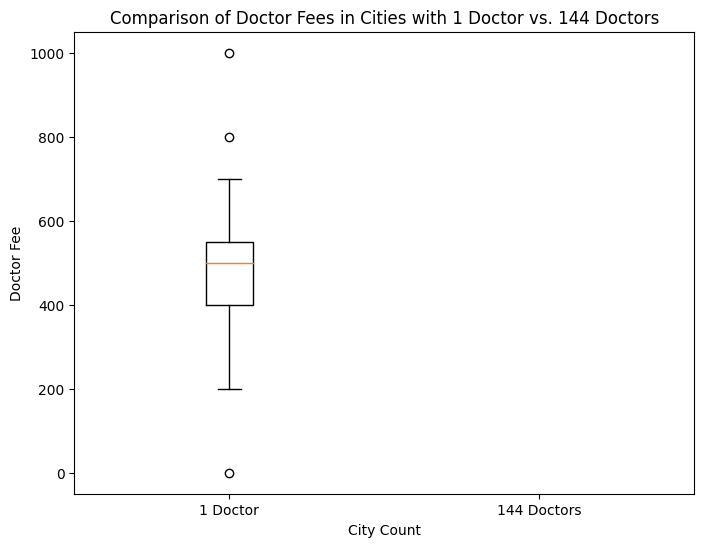

In [ ]:
fees_1_doctor = df[df['City'].isin(cities_with_1_doctor)]['Fee']

# Fees of doctors in cities with 144 doctors
fees_144_doctors = df[df['City'].isin(cities_with_144_doctors)]['Fee']


# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([fees_1_doctor, fees_144_doctors], labels=['1 Doctor', '144 Doctors'])
plt.title('Comparison of Doctor Fees in Cities with 1 Doctor vs. 144 Doctors')
plt.xlabel('City Count')
plt.ylabel('Doctor Fee')
plt.show()

In [ ]:
# Calculate summary statistics for fees of cities with 1 doctor
summary_1_doctor = fees_1_doctor.describe()

# Calculate summary statistics for fees of cities with 144 doctors
summary_144_doctors = fees_144_doctors.describe()

print("Summary Statistics for Fees in Cities with 1 Doctor:")
print(summary_1_doctor)

print("\nSummary Statistics for Fees in Cities with 144 Doctors:")
print(summary_144_doctors)


Summary Statistics for Fees in Cities with 1 Doctor:
count      15.000000
mean      493.333333
std       240.436112
min         0.000000
25%       400.000000
50%       500.000000
75%       550.000000
max      1000.000000
Name: Fee, dtype: float64

Summary Statistics for Fees in Cities with 144 Doctors:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Fee, dtype: float64


Cities with **1** doctor have a fee range from **0 to 1000**, whereas cities with **144** doctors have a wider fee range from **$200 to 5000** This indicates greater variability in the fees charged by doctors in cities with a higher concentration of doctors.



* avg comparing

In cities with only 1 doctor, the mean fee charged is significantly lower at approximately 493.33 compared to cities with 144 doctors, where the mean fee is substantially higher at approximately 1524.31. This suggests that there is a noticeable difference in the average fees depending on the number of doctors in a city.

#2. City

## Cleaning

In [ ]:
df[['City']].describe().T

count unique     top freq
City  2373    117  LAHORE  151

In [ ]:
df['City'].unique()

array(['GUJRANWALA', 'RAJAN-PUR', 'MIRPUR-KHAS', 'HYDERABAD', 'LAHORE',
       'ISLAMABAD', 'KHAIRPUR', 'NOWSHERA', 'JHELUM', 'FAISALABAD',
       'VEHARI', 'OKARA', 'QUETTA', 'KARACHI', 'MULTAN', 'SAHIWAL',
       'PESHAWAR', 'BAHAWALNAGAR', 'BAHAWALPUR', 'SWABI',
       'DERA-GHAZI-KHAN', 'MANSEHRA', 'BANNU', 'SARGODHA', 'CHINIOT',
       'MARDAN', 'ATTOCK', 'ISTANBUL', 'RAHIM-YAR-KHAN', 'SADIQABAD',
       'DASKA', 'GUJRAT', 'GILGIT', 'LALAMUSA', 'KASUR', 'NAROWAL',
       'JACOBABAD', 'WAH-CANTT', 'NANKANA-SAHIB', 'HAFIZABAD', 'DUNYAPUR',
       'ABBOTTABAD', 'TAXILA', 'SHEIKHUPURA', 'THATTA', 'SIALKOT',
       'KHANPUR', 'JAMSHORO', 'HANGU', 'KHARIAN', 'LARKANA', 'KANDIARO',
       'MUZAFFAR-GARH', 'HARIPUR', 'SWAT', 'KOHAT', 'JHANG', 'KOT-ADDU',
       'RAWALAKOT', 'NAWABSHAH', 'BUREWALA', 'LAYYAH', 'SUKKUR',
       'DERA-ISMAIL-KHAN', 'MANDI-BAHAUDDIN', 'RENALA-KHURD', 'BHAKKAR',
       'CHAKWAL', 'JAUHARABAD', 'TIMERGARA', 'UMARKOT', 'MALAKAND',
       'BUNER', 'GUJAR-KHAN', 'K

In [ ]:
cities = df['City'].unique()

In [ ]:
# ## comment this vis for faster running

# import folium

# # Creating a geolocator object
# geolocator = Nominatim(user_agent="city_locator", timeout=45)  # Timeout set to 10 seconds


# #  centroid of all cities
# total_lat, total_lon = 0, 0
# num_cities = len(cities)
# for city in cities:
#     location = geolocator.geocode(city)
#     if location:
#         total_lat += location.latitude
#         total_lon += location.longitude

# centroid_lat = total_lat / num_cities
# centroid_lon = total_lon / num_cities

# # Create a map centered around the centroid
# m = folium.Map(location=[centroid_lat, centroid_lon], zoom_start=5, control_scale=True, width='60%', height='60%')

# # Add markers for each city
# for city in cities:
#     location = geolocator.geocode(city)
#     if location:
#         folium.Marker(location=[location.latitude, location.longitude], popup=city, icon=folium.Icon(color='red')).add_to(m)

# # Save the map to an HTML file
# m.save('cities_map.html')

# # Display the map
# m


## Feature Engineering (Region)

In [ ]:
#3
def assign_region_clean_city(df):
    # Define the city-region mappings
    punjab_cities = [
        'Lahore', 'Islamabad', 'Multan', 'Sahiwal', 'Okara', 'Faisalabad', 'Sargodha',
        'Gujranwala', 'Rawalakot', 'Gujrat', 'Sialkot', 'Sheikhupura', 'Kasur', 'Narowal',
        'Jhang', 'Khanewal', 'Toba Tek Singh', 'Chiniot', 'Pakpattan', 'Burewala', 'Vehari',
        'Rahim Yar Khan', 'Bahawalpur', 'Bahawalnagar', 'Lodhran', 'Layyah', 'Mianwali',
        'Muzaffar Garh', 'Dera Ghazi Khan', 'Bhakkar', 'Khushab', 'Mian Channu', 'Chichawatni',
        'Gojra', 'Shorkot', 'Samundri', 'Tando Muhammad Khan', 'Talagang', 'Kamoke', 'Shahkot',
        'Dinga', 'Bhalwal', 'Chakwal', 'Kharian', 'Daska', 'Hafizabad', 'Sadiqabad', 'Nankana Sahib',
        'Pattoki', 'Alipur', "Rajan Pur", "Jhelum", "Attock", "Lalamusa", "Wah Cantt",
        "Dunyapur", "Khanpur", "Kot Addu", "Mandi Bahauddin", "Renala Khurd",
        "Taxila", "Jauharabad", "Gujar Khan", "Wazirabad", "Pasrur",
        "Muridke", "Chishtian", "Kabirwala", "Jaranwala", "Dijkot"
    ]

    sindh_cities = [
        'Karachi', 'Hyderabad', 'Mirpur Khas', 'Sukkur', 'Nawabshah', 'Larkana', 'Jacobabad',
        'Khairpur', 'Thatta', 'Jamshoro', 'Ghotki', 'Shikarpur', 'Badin', 'Dadu', 'Khairpur Nathan Shah',
        'Moro', 'Hala', "Kandiaro", "Umarkot", "Kashmor", "Mithi", "Matiari", "Shahdadpur", "Baden"
    ]

    kpk_cities = [
        'Peshawar', 'Abbottabad', 'Nowshera', 'Swabi', 'Mardan', 'Mansehra', 'Haripur', 'Bannu',
        'Kohat', 'Dera Ismail Khan', 'Mingora', 'Charsadda', 'Timergara', 'Buner', 'Chitral', 'Dargai',
        "Hangu", "Swat", "Malakand", "Bajaur Agency"
    ]

    balochistan_cities = [
        'Quetta', 'Turbat', 'Chaman', 'Khuzdar', 'Gwadar', 'Loralai', 'Zhob', 'Sibi', 'Nushki',
        'Barkhan', 'Mastung', 'Duki'
    ]

    international_cities = [
        "Istanbul", "Riyadh", "Izmir"
    ]

    kashmir_cities = [
        'Gilgit', 'Kotli', 'Mirpur', 'Skardu'
    ]

    # Create a dictionary to map cities to their respective regions
    city_regions = {
        **{city: 'Punjab Region' for city in punjab_cities},
        **{city: 'Sindh Region' for city in sindh_cities},
        **{city: 'KPK Region' for city in kpk_cities},
        **{city: 'Balochistan Region' for city in balochistan_cities},
        **{city: 'International Region' for city in international_cities},
        **{city: 'Kashmir Region' for city in kashmir_cities}
    }

    # Clean the 'City' column (el 7eta elly htro7 el test script)
    df['City'] = df['City'].str.replace('-', ' ').str.title()

    df['Region'] = df['City'].map(city_regions)

    return df

df = assign_region_clean_city(df)


In [ ]:
df["City"].nunique()

117

In [ ]:
# df['City'].value_counts()

## Analysis

In [ ]:
FeesbyCity= df[['City','Fee']].groupby('City').agg('mean').sort_values('Fee')

fig = px.bar(FeesbyCity.reset_index(), x='City', y='Fee', color='City', text='Fee')

fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

fig.update_layout(title='<b>Average Doctor Fee by City</b>', title_x=0.5, font_family="Times New Roman", title_font_family="Times New Roman")

fig.show()

the avg fees are in LAHORE city lets dive into it and see fees of drs in this city , whilr in IZMIR is the lowes avg tends to 0

In [ ]:
lahore_city_fees = df[df['City'] == 'Lahore']['Fee']
lahore_min_fee = lahore_city_fees.min()
lahore_max_fee = lahore_city_fees.max()

print("Minimum fee in LAHORE:", lahore_min_fee)
print("Maximum fee in LAHORE:", lahore_max_fee)

Minimum fee in LAHORE: 200
Maximum fee in LAHORE: 10000


In [ ]:
# Calculate average doctor fee by city
fees_by_city = df[['City', 'Fee']].groupby('City').agg('mean').sort_values('Fee', ascending=False)

top_5_cities = fees_by_city.head(5).reset_index()

fig = px.bar(top_5_cities, x='City', y='Fee', color='City', text='Fee')

fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

fig.update_layout(title='<b>Average Doctor Fee by City (Top 5)</b>', title_x=0.5, font_family="Times New Roman", title_font_family="Times New Roman")

fig.show()



The fees vary considerable, with a standard deviation of approximately 1369.37, suggesting a wide range of fee amounts.

In [ ]:
average_fees_by_city = df.groupby('City')['Fee'].mean()

city_with_min_avg_fees = average_fees_by_city.idxmin()
min_avg_fees = average_fees_by_city.min()

print(f"The city with the minimum average fees is {city_with_min_avg_fees} with an average fee of ${min_avg_fees:.2f}.")


The city with the minimum average fees is Izmir with an average fee of $0.00.


In [ ]:
izmir_reviews = df[df['City'] == 'Izmir']

total_reviews_in_izmir = izmir_reviews['Total_Reviews'].sum()

print(f"The total number of reviews in Izmir is {total_reviews_in_izmir}.")


The total number of reviews in Izmir is 0.


In [ ]:
izmir_rows = df[df['City'] == 'Izmir']

izmir_rows

Doctor Name   City Specialization Doctor Qualification  \
2025  Hayati Turker  Izmir    Eye Surgeon                 M.D.   

      Experience_Years  Total_Reviews  Patient_Satisfaction_Rate  \
2025              18.0              0                         94   

      Avg_time_per_Patient  Wait_Time  \
2025                    14         11   

                                 Hospital Address       Doctors Link  Fee  \
2025  Netgoz Eye Hospital, YalÄ± Mahallesi, Izmir  No Link Available    0   

     Titles                Region  
2025     Dr  International Region

In [ ]:
df.shape

(2373, 14)

In [ ]:
# Computes the maximum fee within each city group
MaxFeesByCity = df.groupby('City')['Fee'].max().reset_index()

fig = px.bar(MaxFeesByCity, x='City', y='Fee', color='City', text='Fee')

fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

fig.update_layout(title='<b>Maximum Doctor Fee by City</b>',
                  title_x=0.5,
                  font_family="Times New Roman",
                  title_font_family="Times New Roman")

fig.show()

In [ ]:
gujranwala_rows = df[df['City'] == 'Gujranwala']

gujranwala_fee_stats = gujranwala_rows['Fee'].describe()

print("Summary Statistics for Fees in GUJRANWALA:")
print(gujranwala_fee_stats)

Summary Statistics for Fees in GUJRANWALA:
count       90.000000
mean      1292.444444
std       1130.542587
min         20.000000
25%        700.000000
50%       1000.000000
75%       1500.000000
max      10000.000000
Name: Fee, dtype: float64


a wide range of fees charged by doctors in the city, with a minimum fee of 20 and a maximum fee of 10,000. The mean fee of approximately 1259.53 indicates the average cost of medical services

----------------------
(IQR) of 800 (from 700 to 1500) suggests that the middle 50% of fees are relatively consistent, with the median fee (1000) falling within this range. This indicates that while there is considerable variability in fees, **a significant portion of doctors charge fees within a certain range**

In [ ]:
df['Region'].value_counts()

Region
Punjab Region           1474
KPK Region               399
Sindh Region             335
Balochistan Region       129
Kashmir Region            24
International Region      12
Name: count, dtype: int64

In [ ]:
df['Region'].isnull().sum()

0

In [ ]:
"""
data=df.groupby(['Fee','Specialization']).apply(lambda x:x['Region'].count()).reset_index(name='Region')
px.line(data,x='Fee',y='Region',color='Specialization',title='')
"""

"\ndata=df.groupby(['Fee','Specialization']).apply(lambda x:x['Region'].count()).reset_index(name='Region')\npx.line(data,x='Fee',y='Region',color='Specialization',title='')\n"

In [ ]:
df_above_7k = df[df['Fee'] > 7000]

# Get unique hospital addresses for each region
addresses_by_region = df_above_7k.groupby('Region')['Hospital Address'].unique()


# Print addresses for each region
for region, addresses in addresses_by_region.items():
    print(f"Addresses with fees above 7k in {region}:")
    for address in addresses:
        print(address)

Addresses with fees above 7k in Punjab Region:
Siddique Family Clinic, Green Town, Lahore
Doctors Hospital Medical Center, johar town, Lahore
Ammar Medical Complex Hospital, Jail Road, Lahore


*  the largest fee is 7500 for Nephrologist in  Punjab Region
* the smallest   the  fee is 0 for Nephrologist in  Punjab Region also


In [ ]:
# x=df.groupby('City').agg({'Specialization':'count'}).sort_values(by='Specialization',ascending=False).reset_index()
# x

#3.Specialization

## Cleaning

In [ ]:
df[['Specialization']].describe().T

count unique                top freq
Specialization  2373    150  General Physician  406

In [ ]:
specialization_counts = df['Specialization'].value_counts()

# Print the counts
print(specialization_counts)

Specialization
General Physician                                                                     406
Gynecologist                                                                          255
Pediatrician                                                                          249
Orthopedic Surgeon                                                                    203
Dermatologist                                                                         181
                                                                                     ... 
Endocrinologist, General Physician                                                      1
Dermatologist, Dermatologist, Allergy Specialist                                        1
Plastic Surgeon, Cosmetic Surgeon, Plastic Surgeon, Dermatologist                       1
General Practitioner, Internal Medicine Specialist, Diabetologist, Family Medicine      1
Nephrologist, Kidney Transplant Specialist, Medical Specialist                       

In [ ]:
#2
def all_specialization_preprocessing(df):
  specialization_mapping = {
    "Pediatrician,Pediatric": "Pediatrician",
    "Lung Specialist": "Pulmonologist",
    "Eye Surgeon,Eye Specialist": "Ophthalmologist",
    "Sexologist": "Andrologist",
    "Cosmetic Surgeon,Dermatologist": "Cosmetic Dermatologist",
    "Internal Medicine Specialist,General Physician,Infectious Diseases": "Infectious Disease Specialist",
    'Dermatologist, Dermatologist, Allergy Specialist': 'Dermatologist, Allergy Specialist',
    'Plastic Surgeon, Cosmetic Surgeon, Plastic Surgeon, Dermatologist': "Cosmetic Dermatologist",


  }
  #clean
  def process_specialization(entry):
    entry = entry.replace('/', ',')

    specialties = [s.strip() for s in entry.split(',')]
    unique_specialties = []
    for specialty in specialties:
        if specialty not in unique_specialties:
            unique_specialties.append(specialty)
    # Join back into a string
    unique_specialties_str = ','.join(unique_specialties)
    return unique_specialties_str
  df['Specialization'] = df['Specialization'].apply(process_specialization)
  #map
  def map_specialization(specialization):
      for key, value in specialization_mapping.items():
          if key in specialization:
              return value
      return specialization
  df['Specialization'] = df['Specialization'].apply(map_specialization)

all_specialization_preprocessing(df)

In [ ]:
df['Specialization'].nunique()

106

In [ ]:
top_15_specializations = df['Specialization'].value_counts().head(15)

print("Top 15 most appeared specializations:")
print(top_15_specializations)

Top 15 most appeared specializations:
Specialization
General Physician     406
Gynecologist          256
Pediatrician          254
Orthopedic Surgeon    204
Dermatologist         183
Gastroenterologist    127
Pulmonologist         124
Neuro Surgeon         115
Andrologist           108
Urologist             100
Neurologist            87
Nephrologist           79
Ent Specialist         70
Eye Surgeon            63
Ophthalmologist        17
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   object 
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   int64  
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee                        2373 non-null   int64  
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
dt

## Analysis

In [ ]:
#doctors for each specialization
specialization_counts = df['Specialization'].value_counts()

popular_specializations = specialization_counts[specialization_counts >= 183].index

popular_specialization_rows = df[df['Specialization'].isin(popular_specializations)]

fees_of_popular_specializations = popular_specialization_rows['Fee']

data = {'Specialization': popular_specialization_rows['Specialization'], 'Fee': fees_of_popular_specializations}
df_plot = pd.DataFrame(data)

fig = px.bar(df_plot, x='Specialization', y='Fee', title='Fees of Specializations with 183 Doctors or More')
fig.show()

In [ ]:
max_fees = popular_specialization_rows.groupby('Specialization')['Fee'].max()
min_fees = popular_specialization_rows.groupby('Specialization')['Fee'].min()

for specialization in popular_specializations:
    print(f"Specialization: {specialization}")
    print(f"Maximum Fee: {max_fees[specialization]}")
    print(f"Minimum Fee: {min_fees[specialization]}")
    print()

Specialization: General Physician
Maximum Fee: 4000
Minimum Fee: 0

Specialization: Gynecologist
Maximum Fee: 5000
Minimum Fee: 0

Specialization: Pediatrician
Maximum Fee: 3000
Minimum Fee: 5

Specialization: Orthopedic Surgeon
Maximum Fee: 5000
Minimum Fee: 0

Specialization: Dermatologist
Maximum Fee: 5000
Minimum Fee: 0



In [ ]:
df.Specialization.value_counts()

Specialization
General Physician                                               406
Gynecologist                                                    256
Pediatrician                                                    254
Orthopedic Surgeon                                              204
Dermatologist                                                   183
                                                               ... 
General Physician,Gastroenterologist,Diabetologist                1
Pediatrician,Anesthetist                                          1
Dermatologist,Cosmetologist,Aesthetic Physician                   1
Ent Surgeon                                                       1
Nephrologist,Kidney Transplant Specialist,Medical Specialist      1
Name: count, Length: 106, dtype: int64

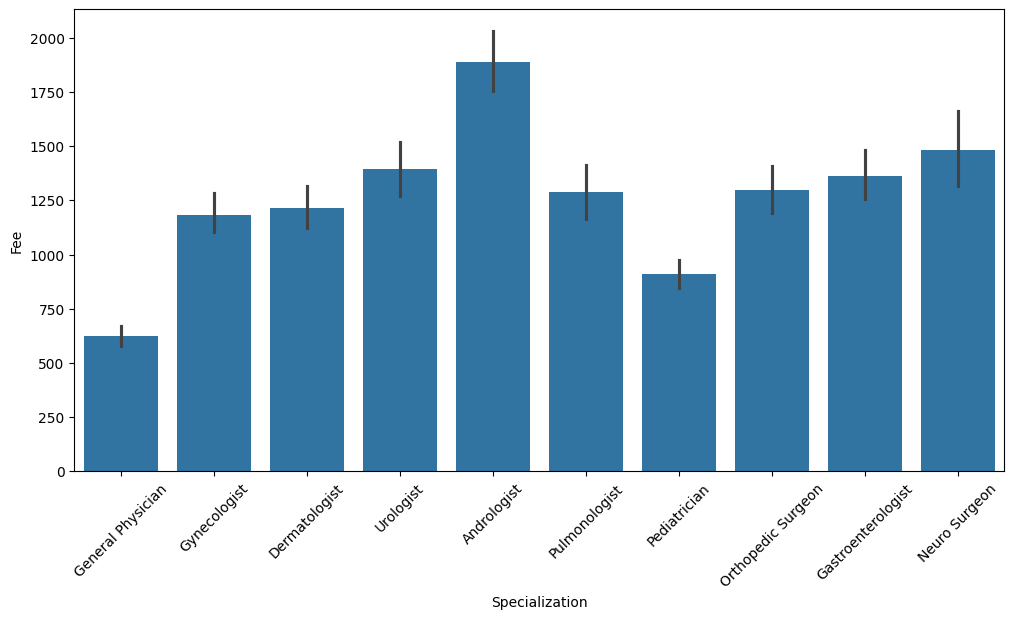

In [ ]:
plt.figure(figsize=(12, 6))

top_10_specializations = df['Specialization'].value_counts().head(10).index

filtered_df = df[df['Specialization'].isin(top_10_specializations)]

sns.barplot(x='Specialization', y='Fee', data=filtered_df)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
data = df.groupby(['Experience_Years', 'Specialization']).apply(lambda x: x['Patient_Satisfaction_Rate'].count()).reset_index(name='Rating')

fig = px.line(data, x='Experience_Years', y='Rating', color='Specialization', title='Avg of Ratings by Experience Years and Specialization')
fig.show()


Drs with less experiene have highest rating and dr that are 47 yrs are not given a rate

In [ ]:
top_20_specializations = df.groupby('Specialization')['Fee'].mean().nlargest(20).index

# Filter the DataFrame to include only data for the top 20 specializations
df_top_20_specializations = df[df['Specialization'].isin(top_20_specializations)]

# Calculate maximum and minimum fees by specialization for the top 20 specializations
max_fees = df_top_20_specializations.groupby('Specialization')['Fee'].max()
min_fees = df_top_20_specializations.groupby('Specialization')['Fee'].min()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Specialization': max_fees.index,
                          'Max Fee': max_fees.values,
                          'Min Fee': min_fees.values})

# Plot the data
fig = px.bar(plot_data, x='Specialization', y=['Max Fee', 'Min Fee'],
             barmode='group', title='Maximum and Minimum Fees by Specialization for Top 20 Specializations',
             labels={'value': 'Fee', 'Specialization': 'Specialization'})
fig.show()

Nephrologist,Diabetologist apears to have same max and min fees so lets view it


In [ ]:
filtered_rows = df[df['Specialization'].str.contains('Nephrologist') & df['Specialization'].str.contains('Diabetologist')]

filtered_rows.head()

Doctor Name        City  \
269   Hafiz Bilal Rasool Ramay      Lahore   
1156             Fowad Shahzad  Gujranwala   
1457             Fowad Shahzad      Lahore   

                                     Specialization  \
269   Nephrologist,Diabetologist,Medical Specialist   
1156                     Nephrologist,Diabetologist   
1457                     Nephrologist,Diabetologist   

                                   Doctor Qualification  Experience_Years  \
269   MBBS (K.E), MRCP (UK), FCPS (Nephrology), ESCE...              12.0   
1156  American Diabetologist (Sugar Specialist), Nep...              18.0   
1457  American Diabetologist (Sugar Specialist), Nep...              18.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
269             209                         97                    16   
1156             43                         82                    14   
1457             43                         82                    14   

      Wait_Time                                   Hospital Address  \
269          15                  Ramay Clinic, Bedian Road, Lahore   
1156         11         Siddique Family Clinic, Green Town, Lahore   
1457         11  Doctors Hospital Medical Center, johar town, L...   

                                           Doctors Link    Fee         Titles  \
269   https://www.marham.pk/doctors/lahore/nephrolog...   2000             Dr   
1156  https://www.marham.pk/doctors/lahore/endocrino...  10000  Assoc Prof Dr   
1457  https://www.marham.pk/doctors/lahore/endocrino...  10000  Assoc Prof Dr   

             Region  
269   Punjab Region  
1156  Punjab Region  
1457  Punjab Region

## Feature Engineering (Specialization Count)

In [ ]:
specialization_counts = df['Specialization'].str.count(',') + 1

doctors_with_multiple_specializations = specialization_counts[specialization_counts >= 1]

fig = px.histogram(doctors_with_multiple_specializations, x='Specialization', title='Distribution of Doctors with One or More Specializations')
fig.update_xaxes(title='Number of Specializations')
fig.update_yaxes(title='Count')
fig.show()


In [ ]:
multi_specialization_rows = df[df['Specialization'].str.count(',') >= 1]

multi_specialization_rows

Doctor Name        City  \
21          Sadia Mughese  Bahawalpur   
67     Tarique Ali Sheikh       Kasur   
73    Shakeel Anjum Ramay       Okara   
75           Suresh Kumar      Quetta   
88         Fatima Mehboob      Lahore   
...                   ...         ...   
2359           Imran Taqi       Okara   
2363         Alamzeb Khan      Quetta   
2366         Ayesha Tariq   Islamabad   
2369   Syed Mohsin Naveed   Islamabad   
2381          Amna Rizwan      Lahore   

                                         Specialization  \
21                           Dermatologist,Nutritionist   
67                           Ent Specialist,Ent Surgeon   
73                             Pediatrician,Anesthetist   
75    Endocrinologist,General Physician,Internal Med...   
88                   Gastroenterologist,Endocrinologist   
...                                                 ...   
2359               Gastroenterologist,General Physician   
2363                          Neuro Surgeon,Neurologist   
2366                  Dermatologist,Aesthetic Physician   
2369  Nephrologist,Kidney Transplant Specialist,Medi...   
2381                         Eye Specialist,Eye Surgeon   

                                   Doctor Qualification  Experience_Years  \
21                  MBBS, Certified Dermatologist, FACP              15.0   
67                                           MBBS, FCPS              15.0   
73    MD, Diploma Child Health from Institute of Hea...              18.0   
75    MBBS, MCPS, FCPS (Medicine), FCPS (Endocrinology)              15.0   
88                                       MBBS, MCPS, MD              43.0   
...                                                 ...               ...   
2359                            MBBS , FCPS (Medicine)               18.0   
2363  M.B.B.S, F.C.P.S, (Neuro Surgery) I.T.F(United...               9.0   
2366                            MBBS,FCPS (Dermatology)              10.0   
2369  FRCP (Glasgow, UK), FRCP (Ireland), MRCPS (Gla...              30.0   
2381                         MBBS, FCPS (VITREO-RETINA)              10.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
21              195                         99                    20   
67              346                         98                    16   
73                0                         94                    14   
75             1511                         99                    14   
88              300                         94                    14   
...             ...                        ...                   ...   
2359            173                         97                    18   
2363             35                         97                    13   
2366              0                         94                    14   
2369            248                         88                    15   
2381             11                        100                    14   

      Wait_Time                                   Hospital Address  \
21            8                Amin Clinic, Model Town, Bahawalpur   
67           13  Sharif Medical Complex Hospital, Kasur City, K...   
73           11  Dr. Shakeel Anjum Ramay Children Clinic, DHQ h...   
75           11           Gillani Hopsital, Satellite Town, Quetta   
88           11  Ali labs and Examination Center., Thokar Niaz ...   
...         ...                                                ...   
2359         11            National care hospital okara., 0, Okara   
2363         12  City International Hospital, Zarghon Road, Quetta   
2366         11  AT Skin &amp; Aesthetic Clinic, Phase 7 Bahria...   
2369         13   Islamabad Afternoon Clinic, F8 Markaz, Islamabad   
2381         11                 Wahdat clinic, Wahdat Road, Lahore   

                                           Doctors Link   Fee         Titles  \
21    https://www.marham.pk/doctors/bahawalpur/derma...  1000             Dr   
67    https://www.mar

In [ ]:
num_multi_specialization_rows = multi_specialization_rows.shape[0]

print("Number of Dr with multiple specializations:", num_multi_specialization_rows)

Number of Dr with multiple specializations: 132


lets see if ppl with 1 specialization are getting more fees or not

In [ ]:
single_specialization = df[df['Specialization'].apply(lambda x: len(x.split(','))) == 1]

fig = px.scatter(single_specialization, x='Specialization', y='Fee', title='Fees for Doctors with One Specialization',
                 labels={'Specialization': 'Specialization', 'Fee': 'Fee'})

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [ ]:
df['Specialization Count'] = df['Specialization'].str.count(',') + 1

max_specialization_count = df['Specialization Count'].max()
min_specialization_count = df['Specialization Count'].min()

print("Maximum number of specializations:", max_specialization_count)
print("Minimum number of specializations:", min_specialization_count)

Maximum number of specializations: 5
Minimum number of specializations: 1


drs that have 1 or 2 specialization are the most ppl that take higer fees that is expected 3shan e7na bnb2a 3wziin nroo7 le dactra mot5sesiin msh btoo3 kol 7aga

## Encoding

In [ ]:

"""
def clean_text(text):
    if pd.isna(text):
        return []
    parts = text.split(',')
    cleaned_parts = []
    for part in parts:
        part = re.sub(r'\([^)]*\)', '', part)
        part = re.sub(r'[.]', '', part)
        part = re.sub(r'\bAND\b', '', part, flags=re.IGNORECASE)
        cleaned_part = part.upper().strip()
        cleaned_parts.append(cleaned_part)

    filtered_list = [value for value in cleaned_parts if not value.startswith("CERTIFIED") and not value.startswith("CERTIFICATION")
                     and not value.startswith("CERTIFICATE")]
    return filtered_list

# Assuming df['Specialization'] exists
df['Specialization'] = df['Specialization'].apply(clean_text)

encoded_dfs = {}
cols = ['Specialization']
for col in cols:
    binarizer = MultiLabelBinarizer()
    # Make sure to pass list of lists to the binarizer
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                              columns=binarizer.classes_,
                              index=df.index)
    encoded_dfs[col] = encoded_df

# Display the encoded DataFrame
encoded_dfs['Specialization']
"""

'\ndef clean_text(text):\n    if pd.isna(text):\n        return []\n    parts = text.split(\',\')\n    cleaned_parts = []\n    for part in parts:\n        part = re.sub(r\'\\([^)]*\\)\', \'\', part)\n        part = re.sub(r\'[.]\', \'\', part)\n        part = re.sub(r\'\x08AND\x08\', \'\', part, flags=re.IGNORECASE)\n        cleaned_part = part.upper().strip()\n        cleaned_parts.append(cleaned_part)\n\n    filtered_list = [value for value in cleaned_parts if not value.startswith("CERTIFIED") and not value.startswith("CERTIFICATION")\n                     and not value.startswith("CERTIFICATE")]\n    return filtered_list\n\n# Assuming df[\'Specialization\'] exists\ndf[\'Specialization\'] = df[\'Specialization\'].apply(clean_text)\n\nencoded_dfs = {}\ncols = [\'Specialization\']\nfor col in cols:\n    binarizer = MultiLabelBinarizer()\n    # Make sure to pass list of lists to the binarizer\n    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),\n                             

In [ ]:
"""df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded
"""

'df_encoded = pd.concat([df, encoded_df], axis=1)\ndf_encoded\n'

In [ ]:
# df = pd.concat([df, encoded_dfs['Specialization']], axis=1)

In [ ]:
#df_encoded.columns

In [ ]:
for col in df.columns:
  print('-'*40)
  print(f"{col} nulls = {df[col].isnull().sum()}")


----------------------------------------
Doctor Name nulls = 0
----------------------------------------
City nulls = 0
----------------------------------------
Specialization nulls = 0
----------------------------------------
Doctor Qualification nulls = 0
----------------------------------------
Experience_Years nulls = 0
----------------------------------------
Total_Reviews nulls = 0
----------------------------------------
Patient_Satisfaction_Rate nulls = 0
----------------------------------------
Avg_time_per_Patient nulls = 0
----------------------------------------
Wait_Time nulls = 0
----------------------------------------
Hospital Address nulls = 0
----------------------------------------
Doctors Link nulls = 0
----------------------------------------
Fee nulls = 0
----------------------------------------
Titles nulls = 0
----------------------------------------
Region nulls = 0
----------------------------------------
Specialization Count nulls = 0


## Encoding top 15 momkn 10 brdo shofo

In [ ]:


# # Assuming df is your DataFrame

# # Instantiate the TargetEncoder
# encoder = ce.TargetEncoder(cols=['Specialization'])

# # Fit and transform the encoder on the 'Specialization' column using 'Fee' as the target
# df['Specialization_encoded'] = encoder.fit_transform(df['Specialization'], df['Fee'])

# # Now, df['Specialization_encoded'] contains the target-encoded values for 'Specialization'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   object 
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   int64  
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee                        2373 non-null   int64  
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
 1

In [ ]:
# #11
# onehot_encoded = pd.get_dummies(df['Specialization']).astype(int)

# df_encoded = pd.concat([df, onehot_encoded], axis=1)
# df_encoded

In [ ]:
# df = df_encoded

#4. Doctor Qualification

In [ ]:
df[['Doctor Qualification']].describe().T

count unique   top freq
Doctor Qualification  2373   1041  MBBS  332

## **NLP**

In [ ]:
"""
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (if not already downloaded)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Initialize Lemmatizer and CountVectorizer
lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer()

# Tokenization and Lemmatization
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization
    return ' '.join(tokens)

# Remove stopwords and perform lemmatization
stop_words = set(stopwords.words('english'))

# Apply preprocessing to each value in the 'Doctor Qualification' column
df['Cleaned Qualifications'] = df['Doctor Qualification'].apply(preprocess_text)

# Vectorization using Bag of Words
X = vectorizer.fit_transform(df['Cleaned Qualifications'])

# X now contains the vectorized representation of 'Doctor Qualification' column
"""

"\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\nfrom nltk.stem import WordNetLemmatizer\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# Download NLTK resources (if not already downloaded)\n#nltk.download('punkt')\n#nltk.download('stopwords')\n#nltk.download('wordnet')\n\n# Initialize Lemmatizer and CountVectorizer\nlemmatizer = WordNetLemmatizer()\nvectorizer = CountVectorizer()\n\n# Tokenization and Lemmatization\ndef preprocess_text(text):\n    tokens = word_tokenize(text.lower())  # Tokenization and convert to lowercase\n    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization\n    return ' '.join(tokens)\n\n# Remove stopwords and perform lemmatization\nstop_words = set(stopwords.words('english'))\n\n# Apply preprocessing to each value in the 'Doctor Qualification' column\ndf['Cleaned Qualifications'] = df['Doctor Qualification'].apply(preprocess_text)\n\n# Vectorization using Bag of Words\nX = vect

In [ ]:
df['Doctor Qualification'].explode().value_counts()[:60]

Doctor Qualification
MBBS                                                                                                                                                                                                     332
MBBS, FCPS                                                                                                                                                                                               133
 MBBS                                                                                                                                                                                                     78
MBBS,FCPS                                                                                                                                                                                                 68
MBBS, FCPS (Gastroenterology)                                                                                                                                  

there are typo error so will remove it

## Cleaning

---



In [ ]:
df[['Doctor Qualification']].describe().T

count unique   top freq
Doctor Qualification  2373   1041  MBBS  332

In [ ]:
df["Doctor Qualification"].nunique()

1041

In [ ]:
df["Doctor Qualification"].unique()

array([' MBBS , FCPS ( Otorhinolaryngologic ENT ) ', 'MBBS',
       'MBBS, RMP, CFP (USA), Certified in Covid 19 +', ...,
       ' MBBS , MCPS Dermatologist ',
       'MBBS, FCPS (OBSTETRICS &amp; GYNAECOLOGY), MS (Infertility &amp; Reproductive Medicine)',
       'MBBS, FCPS (VITREO-RETINA)'], dtype=object)

In [ ]:
# df['Doctor Qualification'].explode().unique().shape

In [ ]:
df['Doctor Qualification'].explode().value_counts()[:50]

Doctor Qualification
MBBS                                                                                                                                          332
MBBS, FCPS                                                                                                                                    133
 MBBS                                                                                                                                          78
MBBS,FCPS                                                                                                                                      68
MBBS, FCPS (Gastroenterology)                                                                                                                  40
MBBS, FCPS (Obstetrics &amp; Gynecology)                                                                                                       39
MBBS, FCPS (Orthopedic Surgery)                                                                        

In [ ]:
#12
def clean_qualifications(df):
    # Combine and update all replacements into a single dictionary
    replacements = {
        r'\bPhD\b': 'PHD', r'\bM\.D\.\b': 'MD', r'\bD\.M\.S\b': 'DMS',
        r'\bB\.Sc\.\b': 'BSC', r'\bM\.S\.\b': 'MS', r'\bM\.Phil\b': 'MPHIL',
        r'\bG\.A\.M\.S\b': 'GAMS', r'\(D\.H\.B\)': 'DHB', r'\(D\.Ac\)': 'PHD',
        r'Ophtamology': 'Ophthalmology', r'Gastroentrology': 'Gastroenterology',
        r'OtoRhinoLaryngology': 'Otorhinolaryngology', r'Paediatrics': 'Pediatrics',
        r'Pulmonology': 'Pulmonary', r'ENT': 'Otolaryngology', r'OrthopedicSurgery': 'Orthopedic Surgery',
        r'NeuroSurgery': 'Neurosurgery', r'Medicine': 'Internal Medicine',
        r'OBSTETRICS&GYNAECOLOGY': 'Obstetrics&Gynecology', r'Gynecology&amp;Obstetrics': 'Gynecology and Obstetrics',
        r'Genecology&amp;Obstetrics': 'Gynecology and Obstetrics', r'OtorhinolaryngologicENT': 'Otorhinolaryngologic,ENT',
        r'MasterOfSurgery': 'Master of Surgery', r'MD\d*': 'MD', r'MDGastroenterology': 'MD,Gastroenterology',
        r'FCPSPediatrics': 'FCPS,Pediatrics', r'MBBSMD': 'MBBS,MD', r'FRCSOrthopedics': 'FRCS,Orthopedics',
        r'MCPSGynae/Obs': 'MCPS(Gynecology/Obs)', r'MD-RMP': 'MD, RMP', r'Masters\(NeuroSurgeon\)': 'Masters, Neurosurgery',
        r'\(|\)': '', r'[^a-zA-Z,]': '', r'Ophthalmologist': 'Ophthalmology', r'GASTROENTEROLOGY': 'Gastroenterology',
        r'MCPS,': 'MCPS', r'M\.D': 'MD', 'MD 1': 'MD'
    }

    # Apply all replacements
    df['Doctor Qualification'] = df['Doctor Qualification'].replace(replacements, regex=True)

    # Additional replacements to handle specific concatenations
    concatenations = {
        r'FCPSOBSTETRICSampGYNAECOLOGY': 'FCPS,Obstetrics&Gynecology',
        r'FCPSOtolaryngology': 'FCPS,Otolaryngology',
        r'MCPSFCPS': 'MCPS,FCPS'
    }
    df['Doctor Qualification'] = df['Doctor Qualification'].replace(concatenations, regex=True)

    # Remove all unnecessary spaces, then remove spaces around commas
    df['Doctor Qualification'] = df['Doctor Qualification'].str.replace(r'\s+', '')
    df['Doctor Qualification'] = df['Doctor Qualification'].str.replace(r'\s*,\s*', ',', regex=True)
    df['Doctor Qualification'] = df['Doctor Qualification'].str.replace(r'\([^)]*\)', '', regex=True)


    # Enhanced cleaning function
    def enhance_cleaning(qualification):
        # Replace HTML entities and correct specific cases
        qualification = qualification.replace('&amp;', '&')
        qualification = re.sub(r'(?<!\w)([A-Z]+)(?!\w)', lambda x: x.group(1), qualification)
        qualification = qualification.replace('DiplomainTBandChestDiseases', 'DTBCD')

        # Split, sort, and remove duplicates
        parts = sorted(set(qualification.split(',')))  # Remove duplicates and sort
        return ','.join(parts)

    # Apply the enhanced cleaning function
    df['Doctor Qualification'] = df['Doctor Qualification'].apply(enhance_cleaning)

    return df

df = clean_qualifications(df)

## Analysis

In [ ]:
# dr qualification that appears only once in the data
qualification_counts = df['Doctor Qualification'].value_counts()


qualifications_count_1 = qualification_counts[qualification_counts == 1]


print(qualifications_count_1)

Doctor Qualification
FCPSOrthopedicsSurgery,MBBS                                              1
DiplomaInAesthetics,MBBS,MScClinicalDermatology                          1
DiplomainOrthopedicSurgery,MBBS,MSOrthopedicSurgery                      1
FCPSPediatrics,MBBS,MCPS                                                 1
FCPSNeuroSurgery,MBBS,MemberAmericanAssociationofNeurologicalSurgeons    1
                                                                        ..
DDermatologists,MBBS                                                     1
DipCardiology,MBBS                                                       1
FACCUSA,FACPUSA,FASIMUSA,FRCPEdinburgh,FRCPLONDON,MRCPUK                 1
DIP,FCPS,MBBS                                                            1
FCPSVITREORETINA,MBBS                                                    1
Name: count, Length: 681, dtype: int64


In [ ]:
print(df['Doctor Qualification'].unique())

['FCPSOtorhinolaryngologicOtolaryngology,MBBS' 'MBBS'
 'CFPUSA,CertifiedinCovid,MBBS,RMP' 'FCPSGynaeampObstetrics,MBBS'
 'CertifiedAestheticInternalMedicine,FCPSDermatology,MBBS' 'FCPS,MBBS'
 'MBBS,MasterOfSurgeryUrology' 'MBBS,MCPSUrology'
 'CHPE,FCPSInternalMedicine,MBBS,TrainingGeriatricInternalMedicineUK'
 'AssociateProfessorofUrology,FCPS,MBBS'
 'FCPSObstetricsampGynecology,MBBS,MRCOG'
 'AestheticPhysician,GeneralPhysician,andMBBS'
 'FCPSObstetricsandGynecology,MBBS' 'DiplomainChildHealthDCH,MBBS'
 'DTCDTBampChestDiseases,MBBS' 'FCPSPulmonary,MBBS' 'FCPSUrology,MBBS'
 'ATLS,FACS,FCPSTraumaampOrthopaedics,FRCSTraumaampOrthopaedics,MBBS'
 'CertifiedDermatologist,FACP,MBBS'
 'FCPSOrthopedicSurgery,MBBS,MCPSSurgery' 'MBBS,MCPSDermatology'
 'FCPSneurologyFCPSmedicine,MBBS'
 'FCPSGastroenterology,MBBS,MCPSInternalMedicine'
 'FCPSObstetricsampGynaecology,MBBS'
 'FCPSOrthopedicSurgery,MBBS,MScPainInternalMedicine' 'FCPSNeurology,MBBS'
 'MBBS,MD' 'FCPSOphthalmology,MBBS' 'FCPS,FellowEurope

In [ ]:
#drs that dont have mbbs

rows_without_MBBS = df[~df['Doctor Qualification'].str.contains('MBBS')]

rows_without_MBBS


#conclusion : 89 rows

Doctor Name            City            Specialization  \
42         Kaya Husnu Akan        Istanbul        Orthopedic Surgeon   
59           Abdul Rauf Ch  Rahim Yar Khan        Orthopedic Surgeon   
73     Shakeel Anjum Ramay           Okara  Pediatrician,Anesthetist   
79    Mohammad Zafar Iqbal           Kasur               Andrologist   
118       Abubakar Maqsood           Daska         General Physician   
...                    ...             ...                       ...   
2264       Anwar M Qureshi       Hyderabad               Neurologist   
2317     Irshad Ali Sanpal        Dunyapur         General Physician   
2319     Malik Aftab Afzal       Islamabad             Dermatologist   
2322           Rashid Riaz          Alipur         General Physician   
2329            Maria Ijaz   Nankana Sahib              Gynecologist   

                                   Doctor Qualification  Experience_Years  \
42                                                   MD              27.0   
59                                 MD,MSMasterofSurgery              22.0   
73    DiplomaAnaesthsia,DiplomaChildHealthfromInstit...              18.0   
79    DHMS,DIPSexology,InternationalAffiliateMemberA...              25.0   
118                                                DHMS              15.0   
...                                                 ...               ...   
2264     COBCEngland,DHFCMCPS,MBMASUK,MD,MMBS,PHDLondon              10.0   
2317                                                 MD              20.0   
2319  DiplomaDermatology,MD,MasterofScienceinPublicH...              15.0   
2322                                             MD,RMP               4.0   
2329                    FCPSObstetricsampGynaecology,MD               5.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
42                0                         94                    14   
59              118                         98                    14   
73                0                         94                    14   
79              139                         95                    14   
118               8                         89                    14   
...             ...                        ...                   ...   
2264              0                         94                    14   
2317              0                         94                    14   
2319            709                         97                    15   
2322              1                        100                    14   
2329              0                         94                    14   

      Wait_Time                                   Hospital Address  \
42           11   Okan University Hospital, Tuzla Turkey, Istanbul   
59           10  (RYK) Rahim Yar Khan Hospital, Darhi Sanghi, R...   
73           11  Dr. Shakeel Anjum Ramay Children Clinic, DHQ h...   
79           11  KHAWB KONSULTINGS Health &amp;wellbeing, Musta...   
118          11                               No Address Available   
...         ...                                                ...   
2264         11         Neuro Medical Centre, Latifabad, Hyderabad   
2317         11    Ramzan General Hospital, Zakuta Chowk, Dunyapur   
2319          7     Aesthetics Lounge (F 11), Islamabad, Islamabad   
2322         11                               No Address Available   
2329         11                               No Address Available   

                                           Doctors Link   Fee         Titles  \
42                                    No Link Available  2000  Assoc Prof Dr   
59    https://www.marham.pk/doctors/rahim-yar-khan/o...  1200  Assoc Prof Dr   
73                                    No Link Available   500             Dr   
79    https://www.marham.pk/doctors/kasur/psychologi...  3500         others   
118   https://www.marham.pk/online-consultation/gene...   500             Dr   
...                                    

In [ ]:
non_MBBS_rows = df[~df['Doctor Qualification'].str.contains('MBBS')]

# el drs el m3ndhomsh mbbs
print("Qualifications of rows where 'MBBS' is not present:")
for index, row in non_MBBS_rows.iterrows():
    print(row['Doctor Qualification'])


Qualifications of rows where 'MBBS' is not present:
MD
MD,MSMasterofSurgery
DiplomaAnaesthsia,DiplomaChildHealthfromInstituteofHealthampManagementScienceIslamabad,MD
DHMS,DIPSexology,InternationalAffiliateMemberAmericanPsychologicalAssociationDivisionUSA,MScPsychology
DHMS
CISUK,CLDPUAE,CMTOSriLanka,CTOFUK,DIPSexology,MPHILPsychology,RHMPPak
CRSM,MD,MemberofAmericanSocietyforReproductiveInternalMedicine,PGFM
CertifiedSexologist,DiplomaPsychosexualampRelationshipTherapist,DiplomateSexologist,PHDHumanSexology,RHMP
MD
FCPS,PHDGastro
DoctorofInternalMedicineMD
MDBasicMedicalQualification
MD
MD
Doctorate
CertifiedUrodynamicist,MD,MSUrology
MSneurosurgeon
MD
MD,MSC
MCPS
MCPSPediatrics,MD
MD,MasterofSurgeryinOrthopedics
FCPSPediatrics,MD
FRACSOrthopedicSurgery,FRCSTraumaampOrth,MBCHBBachelorofInternalMedicineampBachelorofSurgery
DiplomainDiabetes,MD
DAC,DHMS,DIPSexology
DiplomaInDermatology,DoctorofInternalMedicineMD,MemberofMedicalDermatologysocietyUSAMMDSUSA
FCPSNeuroSurgery,MD
FACCUSA,FACP

* 96.2% of the drs have MBBs Qualification
* 3.8 % only dont have MBBs.


most of drs have MBBS (Bachelor of Medicine, Bachelor of Surgery)

In [ ]:
# el shahada di w5dha kam dr

qualified_doctors_counts = qualification_counts[qualification_counts > 14]



fig = px.bar(x=qualified_doctors_counts.index, y=qualified_doctors_counts.values,
             labels={'x': 'Doctor Qualification', 'y': 'Count'},
             title='Doctor Qualifications with More Than 14 Doctors')
fig.show()

In [ ]:
qualification_counts = df['Doctor Qualification'].str.count(',') + 1

# Find the maximum and minimum number of qualifications
max_qualifications = qualification_counts.max()
min_qualifications = qualification_counts.min()

print(f"Maximum number of qualifications: {max_qualifications}")
print(f"Minimum number of qualifications: {min_qualifications}")

Maximum number of qualifications: 11
Minimum number of qualifications: 1


## Feature Engineering (Number of Qualification)

In [ ]:
df['No_of_qualifications'] = df['Doctor Qualification'].apply(lambda x: len(x.split(",")))
df['No_of_qualifications'].value_counts()

No_of_qualifications
2     1255
1      481
3      400
4      136
5       55
6       26
7       10
8        5
11       3
10       1
9        1
Name: count, dtype: int64

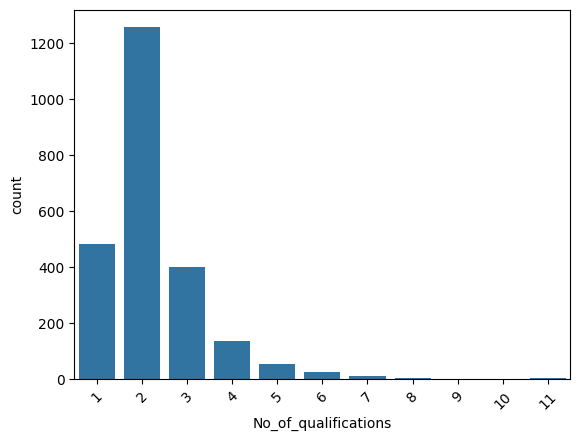

In [ ]:
sns.countplot(x='No_of_qualifications',data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df[df['No_of_qualifications'] == 10]


Doctor Name    City Specialization  \
762  Adil Manzoor  Lahore   Nephrologist   

                                  Doctor Qualification  Experience_Years  \
762  AssociateprofessorofNephrology,Chairmandepartm...              28.0   

     Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
762             38                         97                     9   

     Wait_Time                                   Hospital Address  \
762          9  Pakistan Kidney and Liver Institute (PKLI), DH...   

                                          Doctors Link   Fee         Titles  \
762  https://www.marham.pk/doctors/lahore/nephrolog...  3000  Assoc Prof Dr   

            Region  Specialization Count  No_of_qualifications  
762  Punjab Region                     1                    10

In [ ]:
df[df['No_of_qualifications'] == 9]


Doctor Name      City Specialization  \
1665  Kashif Ali  Peshawar  Dermatologist   

                                   Doctor Qualification  Experience_Years  \
1665  AAAMS,DDermUK,DFSRH,DRCOG,MBBS,MBCAM,MCFP,MRCG...              15.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
1665             29                         88                    14   

      Wait_Time                                   Hospital Address  \
1665         11  Dr Kashif Aesthetic Studio, University Town, P...   

                                           Doctors Link   Fee Titles  \
1665  https://www.marham.pk/doctors/peshawar/dermato...  2000     Dr   

          Region  Specialization Count  No_of_qualifications  
1665  KPK Region                     1                     9

In [ ]:
import plotly.express as px

# Create a copy of the DataFrame
modified_df = df.copy()

# Find all values beyond label 5
values_to_replace = modified_df['No_of_qualifications'].value_counts()[4:].index

# Replace those values with 'Others'
modified_df.loc[modified_df['No_of_qualifications'].isin(values_to_replace), 'No_of_qualifications'] = 'Others'

# Plot the pie chart
fig = px.pie(modified_df['No_of_qualifications'].value_counts(),
             values=modified_df['No_of_qualifications'].value_counts().values,
             names=modified_df['No_of_qualifications'].value_counts().index,
             title='Distribution of Number of Qualifications',
             labels={'index': 'Number of Qualifications'})  # Changing the label here

fig.show()


most doctors have 2 qualifications
 1 has 10 and onther have 11 so will see them and put it to the best qualifications

In [ ]:
fig = px.box(df, x='No_of_qualifications', y='Fee', title='Boxen Plot of Fee by Number of Qualifications')

fig.show()

As the number of qualifications of doctors increase, So does there fees increases, but after 8 qualifications fees seem to decrease and then increase at 12

#5.Hospital Address

## Analysis

In [ ]:
df['Hospital Label'] = np.where(df['Hospital Address'] == 'No Address Available', 0, 1)

# Calculate average fees by hospital label
avg_fees_by_label = df.groupby('Hospital Label')['Fee'].mean().reset_index()

# Creating scatter plot with trendline
fig = px.scatter(df, x='Hospital Label', y='Fee', trendline='ols', title='Hospital Address VS avg Fees')

# Add average fees line to the plot
fig.add_scatter(x=avg_fees_by_label['Hospital Label'], y=avg_fees_by_label['Fee'], mode='lines', line=dict(dash='dot', color='red'))

fig.show()


In [ ]:
df.drop('Hospital Label', axis=1, inplace=True)

* Doctors in these hospitals have the largest fees


In [ ]:
df_above_7k = df[df['Fee'] > 7000]

# Get unique hospital addresses for each region
addresses_by_region = df_above_7k.groupby('Region')['Hospital Address'].unique()

# Print addresses for each region
for region, addresses in addresses_by_region.items():
    print(f"Addresses with fees above 7k in {region}:")
    for address in addresses:
        print(address)

Addresses with fees above 7k in Punjab Region:
Siddique Family Clinic, Green Town, Lahore
Doctors Hospital Medical Center, johar town, Lahore
Ammar Medical Complex Hospital, Jail Road, Lahore


In [ ]:
df['Hospital Address'].value_counts()

Hospital Address
No Address Available                                                     552
Rehman Medical Institute Hospital, Hayatabad, Peshawar                    21
City International Hospital, Zarghon Road, Quetta                         16
Faisal Hospital, Peoples Colony, Faisalabad                               12
Saleem Medical Complex Hospital, Quetta City, Quetta                      11
                                                                        ... 
Dhq Hospital, Charsadda city, Charsadda                                    1
Heart Centre Jhelum, Machine Mohalla No.3 Jhelum, OLD GT road, Jhelum      1
Khan surgical hospital, Model Town, Bahawalpur                             1
Sohail Surgimed Hospital, mehmda chowk, Gujrat                             1
Sahiwal International Hospital, Near General Bus Stand, Sahiwal            1
Name: count, Length: 1178, dtype: int64

In [ ]:
filtered_doctors = df[(df['Hospital Address'] == 'No Address Available') & (df['Doctors Link'] == 'No Link Available')]
print(filtered_doctors[['Doctor Name']])

                 Doctor Name
1              Haris Shakeel
8                Awais Ahmad
27           Anwisha Samreen
44                 Saad Arif
48               Komal Azhar
...                      ...
2329              Maria Ijaz
2344               Asim Niaz
2365           Umber Mushtaq
2367  Hamraz Khan Yousaf Zai
2379         Muhammad Ikrama

[254 rows x 1 columns]


In [ ]:
df["Doctors Link"].replace("No Link Available", pd.NA, inplace=True)
df["Hospital Address"].replace("No Address Available", pd.NA, inplace=True)

##feature engnieering has hospital address

In [ ]:
#15
df['has_Doctors_Link'] = df['Doctors Link'].notnull().astype(int)

In [ ]:
df['has_hospital_address'] = df['Hospital Address'].notnull().astype(int)

In [ ]:
df["Hospital Address"].isnull().sum()


552

<Axes: >

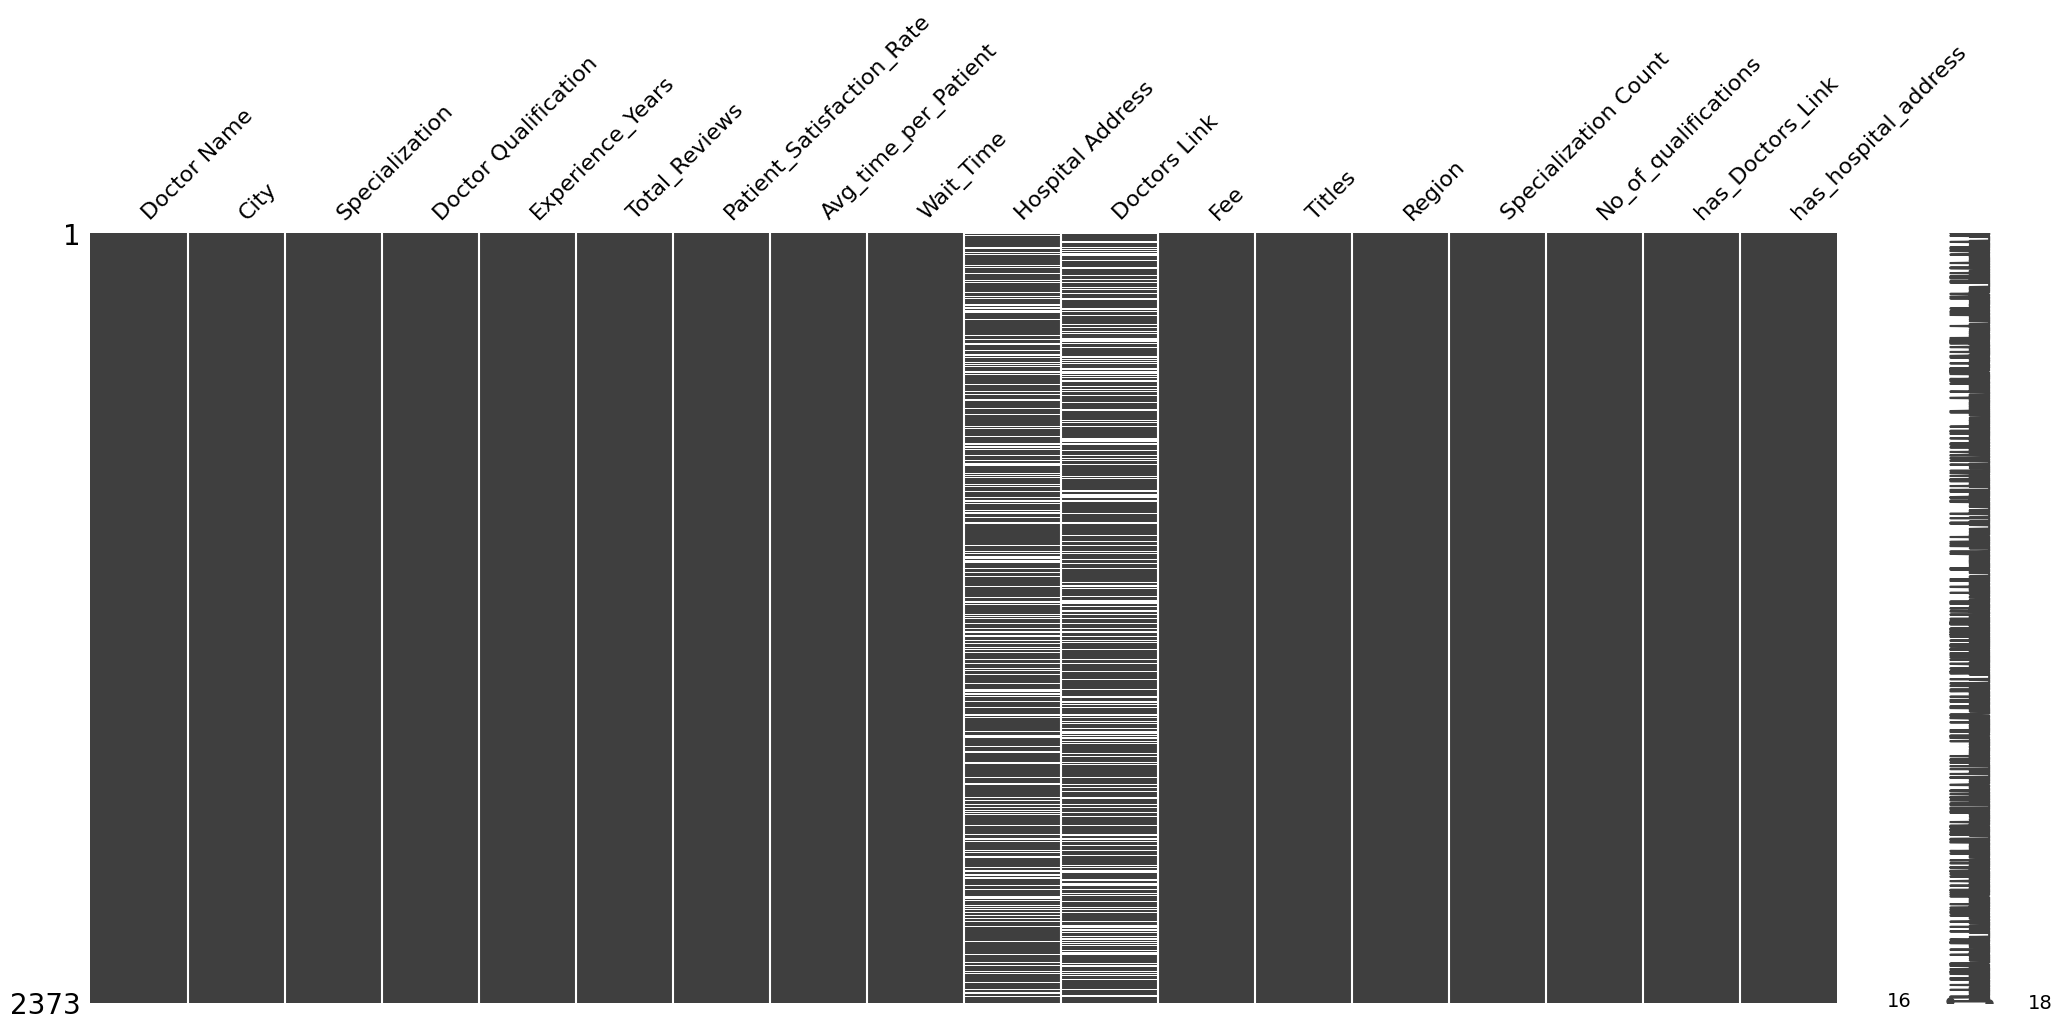

In [ ]:
msno.matrix(df)

In [ ]:
#16
df["Doctors Link"].replace(pd.NA, "No Link Available", inplace=True)

df["Hospital Address"].replace(pd.NA, "No Address Available", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2385
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Doctor Name                2373 non-null   object 
 1   City                       2373 non-null   object 
 2   Specialization             2373 non-null   object 
 3   Doctor Qualification       2373 non-null   object 
 4   Experience_Years           2373 non-null   float64
 5   Total_Reviews              2373 non-null   int64  
 6   Patient_Satisfaction_Rate  2373 non-null   int64  
 7   Avg_time_per_Patient       2373 non-null   int64  
 8   Wait_Time                  2373 non-null   int64  
 9   Hospital Address           2373 non-null   object 
 10  Doctors Link               2373 non-null   object 
 11  Fee                        2373 non-null   int64  
 12  Titles                     2373 non-null   object 
 13  Region                     2373 non-null   object 
 1

In [ ]:
hospital_address_counts = df['Hospital Address'].value_counts()

print(hospital_address_counts.head(20))

Hospital Address
No Address Available                                                           552
Rehman Medical Institute Hospital, Hayatabad, Peshawar                          21
City International Hospital, Zarghon Road, Quetta                               16
Faisal Hospital, Peoples Colony, Faisalabad                                     12
Saleem Medical Complex Hospital, Quetta City, Quetta                            11
Arif Memorial Speciality Clinics And Diagnostic Center, Tariq Colony, Kasur     10
Shaikh Zaid Medical College And Hospital, Babar Colony, Rahim Yar Khan          10
Doctors Hospital, Johar Town, Lahore                                            10
Jamal Medical Center, Gharibabad Maniri, Swabi                                   9
Shafiq Medical Centre, Abbottabad, Abbottabad                                    8
Thq Sadiq Abad Hospital, Sadiqabad City, Sadiqabad                               8
Yaseen Hospital, Quetta City, Quetta                                  

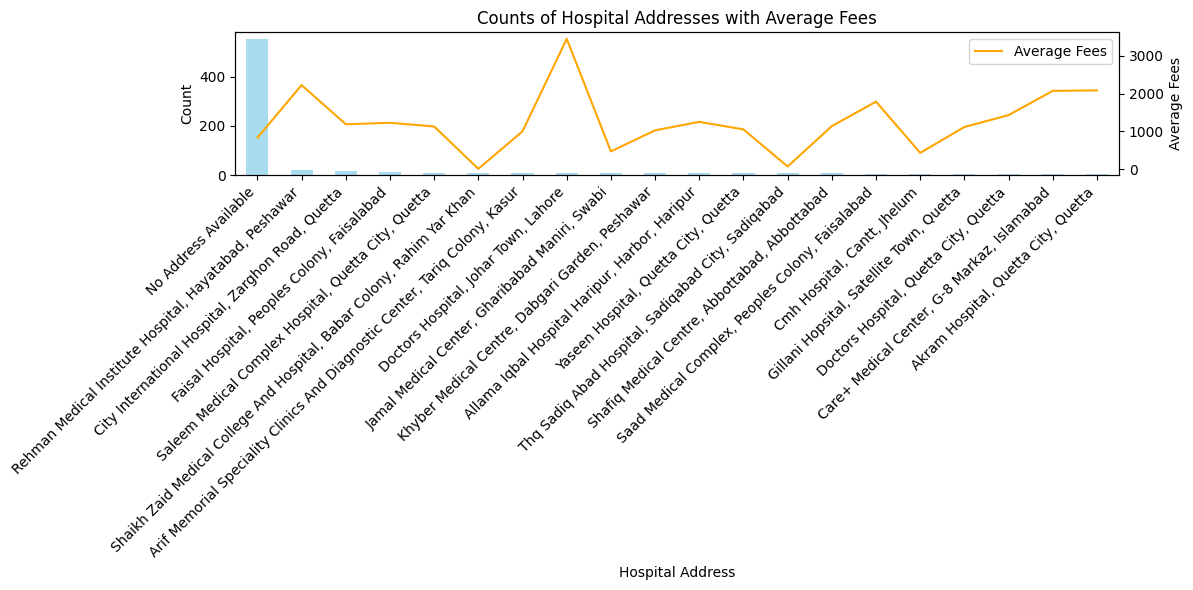

In [ ]:


hospital_address_counts = df['Hospital Address'].value_counts()

avg_fees_by_address = df.groupby('Hospital Address')['Fee'].mean()

address_data = pd.DataFrame({'Count': hospital_address_counts, 'Average Fees': avg_fees_by_address})

address_data_sorted = address_data.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
address_data_sorted['Count'].plot(kind='bar', color='skyblue', alpha=0.7, label='Count')
plt.ylabel('Count')
plt.xlabel('Hospital Address')
plt.xticks(rotation=45, ha='right')
plt.twinx()
address_data_sorted['Average Fees'].plot(kind='line', color='orange', label='Average Fees')
plt.ylabel('Average Fees')
plt.title('Counts of Hospital Addresses with Average Fees')
plt.legend()
plt.tight_layout()
plt.show()


Doctors Hospital, Johar Town,Lahore  hase the highest avg fees , it appeared 6 times in df                                      

In [ ]:
# Filter the DataFrame to include only the rows with the hospital address "Doctors Hospital, Johar Town, Lahore"
hospital_address = "Doctors Hospital, Johar Town, Lahore"
filtered_df = df[df['Hospital Address'] == hospital_address]

# Check if there are any rows for the specified hospital address
if not filtered_df.empty:
    # Find the doctor(s) with the highest fees
    highest_fees = filtered_df['Fee']

    # Display the fees of doctors with the highest fees
    doctors_with_highest_fees = filtered_df[filtered_df['Fee'] == highest_fees]
    print("Doctors with the highest fees at", hospital_address, ":\n")
    print(doctors_with_highest_fees[['Doctor Name', 'Fee']])
else:
    print("No data found for the hospital address:", hospital_address)


Doctors with the highest fees at Doctors Hospital, Johar Town, Lahore :

                    Doctor Name   Fee
46           Ghazanfar Ali Shah  5000
96          Qurat Ul Ain Sajida  3500
296        Muhammad Irfan Nazir  2500
839   Syed Shahzad Hussain Shah  3000
977        Muhammad Irfan Nazir  2500
987                Tariq Sohail  4000
1065        Khizer Hayat Gondal  3000
1767             Muhammad Bilal  3000
1860        Khizer Hayat Gondal  3000
1959              Khurshid Alam  5000


In [ ]:

# Filter the DataFrame to include only the rows with the hospital address "Doctors Hospital, Johar Town, Lahore"
hospital_address = "Doctors Hospital, Johar Town, Lahore"
filtered_df = df[df['Hospital Address'] == hospital_address]

# Check if there are any rows for the specified hospital address
if not filtered_df.empty:
    # Find the highest fee among doctors at this hospital
    highest_fee = filtered_df['Fee']

    # Display the doctors with the highest fee
    doctors_with_highest_fees = filtered_df[filtered_df['Fee'] == highest_fee]
    print("\nDoctors with the highest fee at", hospital_address, ":\n")
    print(doctors_with_highest_fees.to_string(index=False))
else:
    print("\nNo data found for the hospital address:", hospital_address)



Doctors with the highest fee at Doctors Hospital, Johar Town, Lahore :

              Doctor Name   City             Specialization                                                                         Doctor Qualification  Experience_Years  Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  Wait_Time                     Hospital Address                                                                                        Doctors Link  Fee        Titles        Region  Specialization Count  No_of_qualifications  has_Doctors_Link  has_hospital_address
       Ghazanfar Ali Shah Lahore         Orthopedic Surgeon                DiplomateAmericanBoardofOrthopaedicSurgery,FAAOS,FACS,FICS,FRCSSurgeryUK,MBBS              45.0             24                        100                    16         10 Doctors Hospital, Johar Town, Lahore   https://www.marham.pk/doctors/lahore/orthopedic-surgeon/prof-dr-ghazanfar-ali-shah#reviews-scroll 5000      Prof, Dr Punjab Region            

### No Address Available

In [ ]:

filtered_df = df[df['Hospital Address'] == 'No Address Available']

print(filtered_df[['Hospital Address', 'City']])

          Hospital Address             City
1     No Address Available        Rajan Pur
7     No Address Available         Khairpur
8     No Address Available         Nowshera
11    No Address Available           Vehari
27    No Address Available  Dera Ghazi Khan
...                    ...              ...
2364  No Address Available           Gilgit
2365  No Address Available   Rahim Yar Khan
2367  No Address Available           Mardan
2374  No Address Available       Abbottabad
2379  No Address Available            Gojra

[552 rows x 2 columns]


#6.Doctors Link

In [ ]:
df[['Doctors Link']].describe().T

count unique                top freq
Doctors Link  2373   1606  No Link Available  645

In [ ]:
df.head()

Doctor Name         City     Specialization  \
0   Umair Hafeez   Gujranwala     Ent Specialist   
1  Haris Shakeel    Rajan Pur  General Physician   
2    Iqra Rehman  Mirpur Khas  General Physician   
3     Erum Memon    Hyderabad       Gynecologist   
4    Aisha Ahmad       Lahore      Dermatologist   

                                Doctor Qualification  Experience_Years  \
0        FCPSOtorhinolaryngologicOtolaryngology,MBBS               6.0   
1                                               MBBS               1.0   
2                   CFPUSA,CertifiedinCovid,MBBS,RMP               6.0   
3                        FCPSGynaeampObstetrics,MBBS              11.0   
4  CertifiedAestheticInternalMedicine,FCPSDermato...              12.0   

   Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  Wait_Time  \
0             11                        100                    19          6   
1              0                         94                    14         11   
2              9                        100                    10          0   
3             71                         96                    18         10   
4            199                        100                    16          2   

                              Hospital Address  \
0  Central Hospital, Jinnah Colony, Gujranwala   
1                         No Address Available   
2   Rehman Clinic, tandoadam naka, Mirpur Khas   
3       Mehmood Hospital, Qasimabad, Hyderabad   
4             Skinnovation, Johar Town, Lahore   

                                        Doctors Link   Fee Titles  \
0  https://www.marham.pk/doctors/gujranwala/ent-s...  2000     Dr   
1                                  No Link Available   500     Dr   
2  https://www.marham.pk/doctors/mirpur-khas/gene...  1000     Dr   
3  https://www.marham.pk/doctors/hyderabad/gyneco...   800     Dr   
4  https://www.marham.pk/doctors/lahore/dermatolo...  1500     Dr   

          Region  Specialization Count  No_of_qualifications  \
0  Punjab Region                     1                     2   
1  Punjab Region                     1                     1   
2   Sindh Region                     1                     4   
3   Sindh Region                     1                     2   
4  Punjab Region                     1                     3   

   has_Doctors_Link  has_hospital_address  
0                 1                     1  
1                 0                     0  
2                 1                     1  
3                 1                     1  
4                 1                     1

In [ ]:
df['Doctors Link'].value_counts()

Doctors Link
No Link Available                                                                                                              645
https://www.marham.pk/doctors/lahore/gastroenterologist/asst-prof-dr-mujahid-israr#reviews-scroll                                4
https://www.marham.pk/doctors/hyderabad/pulmonologist/asst-prof-dr-mubeen-ahmed-memon#reviews-scroll                             3
https://www.marham.pk/doctors/haripur/neuro-physician/dr-zahid-hassan#reviews-scroll                                             3
https://www.marham.pk/doctors/rahim-yar-khan/general-physician/dr-asim-munir-alvi-consultant-endocrinologist#reviews-scroll      3
                                                                                                                              ... 
https://www.marham.pk/doctors/faisalabad/pediatrician/dr-ayesha-ghaffar#reviews-scroll                                           1
https://www.marham.pk/doctors/islamabad/ent-specialist/prof-dr-r-briga

In [ ]:
filtered_df = df[df['Doctors Link'] != 'No Link Available']

# Identify duplicate values in the filtered DataFrame
duplicate_doctors_link = filtered_df[filtered_df.duplicated(subset=['Doctors Link'], keep=False)]

# Print the DataFrame with duplicate links
print(duplicate_doctors_link[['Doctors Link']])


                                           Doctors Link
10    https://www.marham.pk/doctors/faisalabad/urolo...
13    https://www.marham.pk/doctors/quetta/pulmonolo...
20    https://www.marham.pk/doctors/bahawalpur/ortho...
32    https://www.marham.pk/doctors/lahore/neuro-phy...
35    https://www.marham.pk/doctors/karachi/urologis...
...                                                 ...
2354  https://www.marham.pk/doctors/abbottabad/urolo...
2359  https://www.marham.pk/doctors/lahore/gastroent...
2363  https://www.marham.pk/doctors/quetta/neuro-sur...
2378  https://www.marham.pk/doctors/rahim-yar-khan/u...
2383  https://www.marham.pk/doctors/sadiqabad/dermat...

[236 rows x 1 columns]


In [ ]:
################
filtered_df = df[df['Doctors Link'] != 'No Link Available']

duplicate_doctors_link = filtered_df[filtered_df.duplicated(subset=['Doctors Link'], keep=False)]

sorted_duplicate_doctors = duplicate_doctors_link.sort_values(by='Doctor Name')

# View the sorted DataFrame
sorted_duplicate_doctors[['Doctor Name', 'Doctors Link' , 'Hospital Address', 'Doctor Qualification','Specialization']]

Doctor Name                                       Doctors Link  \
1601  Abdul Ghaffar  https://www.marham.pk/doctors/multan/urologist...   
2148  Abdul Ghaffar  https://www.marham.pk/doctors/multan/urologist...   
1203   Abdul Haseeb  https://www.marham.pk/doctors/lalamusa/general...   
2283   Abdul Haseeb  https://www.marham.pk/doctors/lalamusa/general...   
308     Abdul Razaq  https://www.marham.pk/doctors/multan/general-p...   
...             ...                                                ...   
1429   Zahid Hassan  https://www.marham.pk/doctors/haripur/neuro-ph...   
2242    Zahida Rani  https://www.marham.pk/doctors/lahore/dermatolo...   
2331    Zahida Rani  https://www.marham.pk/doctors/lahore/dermatolo...   
1302     Zain Ullah  https://www.marham.pk/doctors/peshawar/orthope...   
2267     Zain Ullah  https://www.marham.pk/doctors/peshawar/orthope...   

                                       Hospital Address  \
1601         Punjab Hospital, New Multan Colony, Multan   
2148         Punjab Hospital, New Multan Colony, Multan   
1203              Sahara Hospital, Main Bazar, Lalamusa   
2283              Sahara Hospital, Main Bazar, Lalamusa   
308   Hussain Memorial Hospital, Sodiwal Samanabad, ...   
...                                                 ...   
1429           IDC- ABBOTABAD, ground floor, Abbottabad   
2242  Khan Skin &amp; Laser Center, Commissioner roa...   
2331  Khan Skin &amp; Laser Center, Commissioner roa...   
1302  SUDAIS Medical Complex, Khyber Pakhtunkhwa, Ch...   
2267  SUDAIS Medical Complex, Khyber Pakhtunkhwa, Ch...   

                                   Doctor Qualification      Specialization  
1601                                   FCPSUrology,MBBS         Andrologist  
2148                                   FCPSUrology,MBBS         Andrologist  
1203                                               MBBS   General Physician  
2283                                               MBBS   General Physician  
308        CRSMCommunityInternalMedicine,FCPS,MBBS,MCPS         Andrologist  
...                                                 ...                 ...  
1429  FCPSNeurology,FellowshipInStrokeampvascularNeu...         Neurologist  
2242                               FCPSDermatology,MBBS       Dermatologist  
2331                               FCPSDermatology,MBBS       Dermatologist  
1302                         FCPSOrthopedicSurgery,MBBS  Orthopedic Surgeon  
2267                         FCPSOrthopedicSurgery,MBBS  Orthopedic Surgeon  

[236 rows x 5 columns]

In [ ]:
#### if same 'Doctor Name', 'Doctors Link', 'Hospital Address drop

# Drop duplicate rows based on 'Doctor Name', 'Doctors Link', and 'Hospital Address'
df.drop_duplicates(subset=['Doctor Name', 'Doctors Link' , 'Hospital Address'], inplace=True)

# Verify the changes
df


Doctor Name         City              Specialization  \
0                   Umair Hafeez   Gujranwala              Ent Specialist   
1                  Haris Shakeel    Rajan Pur           General Physician   
2                    Iqra Rehman  Mirpur Khas           General Physician   
3                     Erum Memon    Hyderabad                Gynecologist   
4                    Aisha Ahmad       Lahore               Dermatologist   
...                          ...          ...                         ...   
2380  Syed Muhammad Danish Aslam     Sargodha                Pediatrician   
2381                 Amna Rizwan       Lahore  Eye Specialist,Eye Surgeon   
2382               Misbah Fatima        Okara                Pediatrician   
2384                 Ahmed Ayyaz      Sahiwal                Nephrologist   
2385                 Rameez Aziz      Larkana                Nephrologist   

                                   Doctor Qualification  Experience_Years  \
0           FCPSOtorhinolaryngologicOtolaryngology,MBBS               6.0   
1                                                  MBBS               1.0   
2                      CFPUSA,CertifiedinCovid,MBBS,RMP               6.0   
3                           FCPSGynaeampObstetrics,MBBS              11.0   
4     CertifiedAestheticInternalMedicine,FCPSDermato...              12.0   
...                                                 ...               ...   
2380                                FCPSPediatrics,MBBS               8.0   
2381                              FCPSVITREORETINA,MBBS              10.0   
2382                                FCPSPediatrics,MBBS              10.0   
2384                                  MBBS,MDNephrology              12.0   
2385                                FCPSNephrology,MBBS               8.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
0                11                        100                    19   
1                 0                         94                    14   
2                 9                        100                    10   
3                71                         96                    18   
4               199                        100                    16   
...             ...                        ...                   ...   
2380              1                        100                    10   
2381             11                        100                    14   
2382              7                        100                    14   
2384             23                        100                    14   
2385              1                        100                    10   

      Wait_Time                                   Hospital Address  \
0             6        Central Hospital, Jinnah Colony, Gujranwala   
1            11                               No Address Available   
2             0         Rehman Clinic, tandoadam naka, Mirpur Khas   
3            10             Mehmood Hospital, Qasimabad, Hyderabad   
4             2                   Skinnovation, Johar Town, Lahore   
...         ...                                                ...   
2380          9  Mubarak Medical Complex Hospital, Satellite To...   
2381         11                 Wahdat clinic, Wahdat Road, Lahore   
2382         11  Zayyan Kidney and Child Care Clinic, Okara, Okara   
2384         12  Sahiwal International Hospital, Near General B...   
2385         10          ali hospital larkana, wagan road, Larkana   

                                           Doctors Link   Fee        Titles  \
0     https://www.marham.pk/doctors/gujranwala/ent-s...  2000            Dr   
1                                     No Link Available   500            Dr   
2     https://www.marham.pk/doctors/mirpur-khas/gene...  1000            Dr   
3     https://www.marham.pk/doctors/hyderabad/gyneco...   800            Dr   
4     https://www.marham.pk/doctors/lahore/dermatolo...  1500         

In [ ]:
value_counts = df['Doctors Link'].value_counts()

# Filter the values to include only those that are greater than 1 and not equal to 'No Link Available'
filtered_values = value_counts[(value_counts > 1) & (value_counts.index != 'No Link Available')]

# Get all data corresponding to the filtered values
filtered_data = df[df['Doctors Link'].isin(filtered_values.index)]
# Sort the filtered data by a specific column, for example, 'Doctor Name'
sorted_filtered_data = filtered_data.sort_values(by='Doctor Name')
# Print the sorted data
sorted_filtered_data

Doctor Name        City  \
1156          Fowad Shahzad  Gujranwala   
1457          Fowad Shahzad      Lahore   
32     Khawaja Muhammad Ali      Lahore   
745    Khawaja Muhammad Ali       Kasur   
465            Khawar Anwar      Lahore   
1371           Khawar Anwar  Gujranwala   
53          Muhammad Farooq      Lahore   
2244        Muhammad Farooq      Lahore   
1157  Muhammad Sufian Pasha      Jhelum   
2260  Muhammad Sufian Pasha      Multan   
484             Shahzad Ali     Karachi   
520             Shahzad Ali     Karachi   
1377           Talat Naheed      Lahore   
1634           Talat Naheed      Lahore   

                                         Specialization  \
1156                         Nephrologist,Diabetologist   
1457                         Nephrologist,Diabetologist   
32                                          Neurologist   
745                                         Neurologist   
465                                       Neuro Surgeon   
1371                                      Neuro Surgeon   
53                                          Andrologist   
2244                                        Andrologist   
1157                                  General Physician   
2260                                  General Physician   
484                                         Andrologist   
520                                         Andrologist   
1377  General Physician,Internal Medicine Specialist...   
1634  General Physician,Internal Medicine Specialist...   

                                   Doctor Qualification  Experience_Years  \
1156  AmericanDiabetologistSugarSpecialist,DABMUSA,D...              18.0   
1457  AmericanDiabetologistSugarSpecialist,DABMUSA,D...              18.0   
32                                   FCPSNeurology,MBBS              10.0   
745                                  FCPSNeurology,MBBS              10.0   
465                                 MBBS,MSNeurosurgery               8.0   
1371                                MBBS,MSNeurosurgery               8.0   
53                         FCPSSurgery,FCPSUrology,MBBS              40.0   
2244                       FCPSSurgery,FCPSUrology,MBBS              40.0   
1157                                               MBBS               6.0   
2260                                               MBBS               6.0   
484                               FCPS,FRCSGlasgow,MBBS              30.0   
520                               FCPS,FRCSGlasgow,MBBS              30.0   
1377  DoctorateOfInternalMedicineInGastroenterology,...              40.0   
1634  DoctorateOfInternalMedicineInGastroenterology,...              40.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
1156             43                         82                    14   
1457             43                         82                    14   
32               38                         98                    16   
745              38                         98                    10   
465             105                         98                    14   
1371            105                         98                    14   
53             2904                         98                    14   
2244           2904                         98                    12   
1157              5                         83                    14   
2260              5                         83                    16   
484             636                         98                    15   
520             636                         98                    14   
1377           1006                         95                    15   
1634           1006                         95                    15   

      Wait_Time                                   Hospital Address  \
1156         11         Siddique Family Clinic, Green Town, Lahore   
1457         11  Doctors Hospital Medical Center, johar town, L...   
32           14                   Baj

* mmkn ndrop

In [ ]:
value_counts = df['Doctors Link'].value_counts()
filtered_values = value_counts[value_counts > 1]
print(filtered_values)

Doctors Link
No Link Available                                                                                                   639
https://www.marham.pk/doctors/lahore/urologist/assoc-prof-dr-muhammad-farooq#reviews-scroll                           2
https://www.marham.pk/doctors/lahore/neuro-surgeon/dr-khawar-anwar#reviews-scroll                                     2
https://www.marham.pk/doctors/lahore/neuro-physician/dr-khawaja-muhammad-ali#reviews-scroll                           2
https://www.marham.pk/doctors/karachi/urologist/prof-dr-shahzad-ali#reviews-scroll                                    2
https://www.marham.pk/online-consultation/general-physician/multan/dr-muhammad-sufian-pasha-38628#reviews-scroll      2
https://www.marham.pk/doctors/lahore/general-physician/prof-dr-talat-naheed#reviews-scroll                            2
https://www.marham.pk/doctors/lahore/endocrinologist/assoc-prof-dr-fowad-shahzad#reviews-scroll                       2
Name: count, dtype: int64


In [ ]:
value_counts = df['Doctors Link'].value_counts()

filtered_values = value_counts[(value_counts > 1) & (value_counts.index != 'No Link Available')]

filtered_data = df[df['Doctors Link'].isin(filtered_values.index)]


sorted_filtered_data = filtered_data.sort_values(by='Doctor Name')

sorted_filtered_data.head()

Doctor Name        City              Specialization  \
1156         Fowad Shahzad  Gujranwala  Nephrologist,Diabetologist   
1457         Fowad Shahzad      Lahore  Nephrologist,Diabetologist   
32    Khawaja Muhammad Ali      Lahore                 Neurologist   
745   Khawaja Muhammad Ali       Kasur                 Neurologist   
465           Khawar Anwar      Lahore               Neuro Surgeon   

                                   Doctor Qualification  Experience_Years  \
1156  AmericanDiabetologistSugarSpecialist,DABMUSA,D...              18.0   
1457  AmericanDiabetologistSugarSpecialist,DABMUSA,D...              18.0   
32                                   FCPSNeurology,MBBS              10.0   
745                                  FCPSNeurology,MBBS              10.0   
465                                 MBBS,MSNeurosurgery               8.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
1156             43                         82                    14   
1457             43                         82                    14   
32               38                         98                    16   
745              38                         98                    10   
465             105                         98                    14   

      Wait_Time                                   Hospital Address  \
1156         11         Siddique Family Clinic, Green Town, Lahore   
1457         11  Doctors Hospital Medical Center, johar town, L...   
32           14                   Bajwa Hospital, Shahdara, Lahore   
745          10  Al Rehman Hospital, Al Rehman Garden Phase 2, ...   
465          11  Siddique Family Hospital, Rahwali Cantt, Gujra...   

                                           Doctors Link    Fee         Titles  \
1156  https://www.marham.pk/doctors/lahore/endocrino...  10000  Assoc Prof Dr   
1457  https://www.marham.pk/doctors/lahore/endocrino...  10000  Assoc Prof Dr   
32    https://www.marham.pk/doctors/lahore/neuro-phy...   1000             Dr   
745   https://www.marham.pk/doctors/lahore/neuro-phy...   1000             Dr   
465   https://www.marham.pk/doctors/lahore/neuro-sur...   3000             Dr   

             Region  Specialization Count  No_of_qualifications  \
1156  Punjab Region                     2                    11   
1457  Punjab Region                     2                    11   
32    Punjab Region                     1                     2   
745   Punjab Region                     1                     2   
465   Punjab Region                     1                     2   

      has_Doctors_Link  has_hospital_address  
1156                 1                     1  
1457                 1                     1  
32                   1                     1  
745                  1                     1  
465                  1                     1

In [ ]:
print("Count of filtered data:", sorted_filtered_data.shape[0])

Count of filtered data: 14


In [ ]:
df.shape

(2251, 18)

In [ ]:
no_link_data = df[df['Doctors Link'] == 'No Link Available']
no_link_data.head()

Doctor Name        City     Specialization  \
1   Haris Shakeel   Rajan Pur  General Physician   
6         M.irfan  Gujranwala          Urologist   
8     Awais Ahmad    Nowshera          Urologist   
9      Aftab Alam      Jhelum  General Physician   
24    Abdul Malik      Quetta       Nephrologist   

                                 Doctor Qualification  Experience_Years  \
1                                                MBBS               1.0   
6                                           FCPS,MBBS              10.0   
8                                    MBBS,MCPSUrology               3.0   
9   CHPE,FCPSInternalMedicine,MBBS,TrainingGeriatr...              10.0   
24                     FCPSneurologyFCPSmedicine,MBBS              10.0   

    Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  Wait_Time  \
1               0                         94                    14         11   
6               0                         94                    14         11   
8               0                         94                    14         11   
9               0                         94                    14         11   
24              0                         94                    14         11   

                                     Hospital Address       Doctors Link  \
1                                No Address Available  No Link Available   
6   Gondal Medical Complex Hospital, Civil Lines, ...  No Link Available   
8                                No Address Available  No Link Available   
9                         Cmh Hospital, Cantt, Jhelum  No Link Available   
24  Time Pharma Saleem Medical Complex, Quetta Cit...  No Link Available   

     Fee Titles              Region  Specialization Count  \
1    500     Dr       Punjab Region                     1   
6   1000     Dr       Punjab Region                     1   
8   1000     Dr          KPK Region                     1   
9   1500     Dr       Punjab Region                     1   
24   700     Dr  Balochistan Region                     1   

    No_of_qualifications  has_Doctors_Link  has_hospital_address  
1                      1                 0                     0  
6                      2                 0                     1  
8                      2                 0                     0  
9                      4                 0                     1  
24                     2                 0                     1

In [ ]:

df['Doctors Link'] = df['Doctors Link'].replace('No Link Available', 'https://instacare.pk/')

# **Numerical Values**

Satistics for **Numerical** columns.

In [ ]:
numerical_columns = df.select_dtypes(include=['int','float']).columns
numerical_columns

Index(['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate',
       'Avg_time_per_Patient', 'Wait_Time', 'Fee', 'Specialization Count',
       'No_of_qualifications', 'has_Doctors_Link', 'has_hospital_address'],
      dtype='object')

In [ ]:
numerical_columns=['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate', 'Avg_time_per_Patient', 'Wait_Time', 'Fee','No_of_qualifications']

In [ ]:
df.describe().T

count         mean         std   min    25%  \
Experience_Years           2251.0    11.794980    8.795912   1.0    6.0   
Total_Reviews              2251.0    87.066637  280.695886   0.0    0.0   
Patient_Satisfaction_Rate  2251.0    96.656153    4.965654  33.0   94.0   
Avg_time_per_Patient       2251.0    14.092403    2.708897   3.0   14.0   
Wait_Time                  2251.0    11.197690    5.538031   0.0   10.0   
Fee                        2251.0  1183.818747  822.987125   0.0  600.0   
Specialization Count       2251.0     1.075522    0.368276   1.0    1.0   
No_of_qualifications       2251.0     2.224789    1.103179   1.0    2.0   
has_Doctors_Link           2251.0     0.716126    0.450977   0.0    0.0   
has_hospital_address       2251.0     0.756108    0.429524   0.0    1.0   

                              50%     75%      max  
Experience_Years             10.0    14.0     53.0  
Total_Reviews                 7.0    48.0   5147.0  
Patient_Satisfaction_Rate    98.0   100.0    100.0  
Avg_time_per_Patient         14.0    15.0     50.0  
Wait_Time                    11.0    11.0     82.0  
Fee                        1000.0  1500.0  10000.0  
Specialization Count          1.0     1.0      5.0  
No_of_qualifications          2.0     3.0     11.0  
has_Doctors_Link              1.0     1.0      1.0  
has_hospital_address          1.0     1.0      1.0

array([[<Axes: title={'center': 'Experience_Years'}>,
        <Axes: title={'center': 'Total_Reviews'}>,
        <Axes: title={'center': 'Patient_Satisfaction_Rate'}>],
       [<Axes: title={'center': 'Avg_time_per_Patient'}>,
        <Axes: title={'center': 'Wait_Time'}>,
        <Axes: title={'center': 'Fee'}>],
       [<Axes: title={'center': 'Specialization Count'}>,
        <Axes: title={'center': 'No_of_qualifications'}>,
        <Axes: title={'center': 'has_Doctors_Link'}>],
       [<Axes: title={'center': 'has_hospital_address'}>, <Axes: >,
        <Axes: >]], dtype=object)

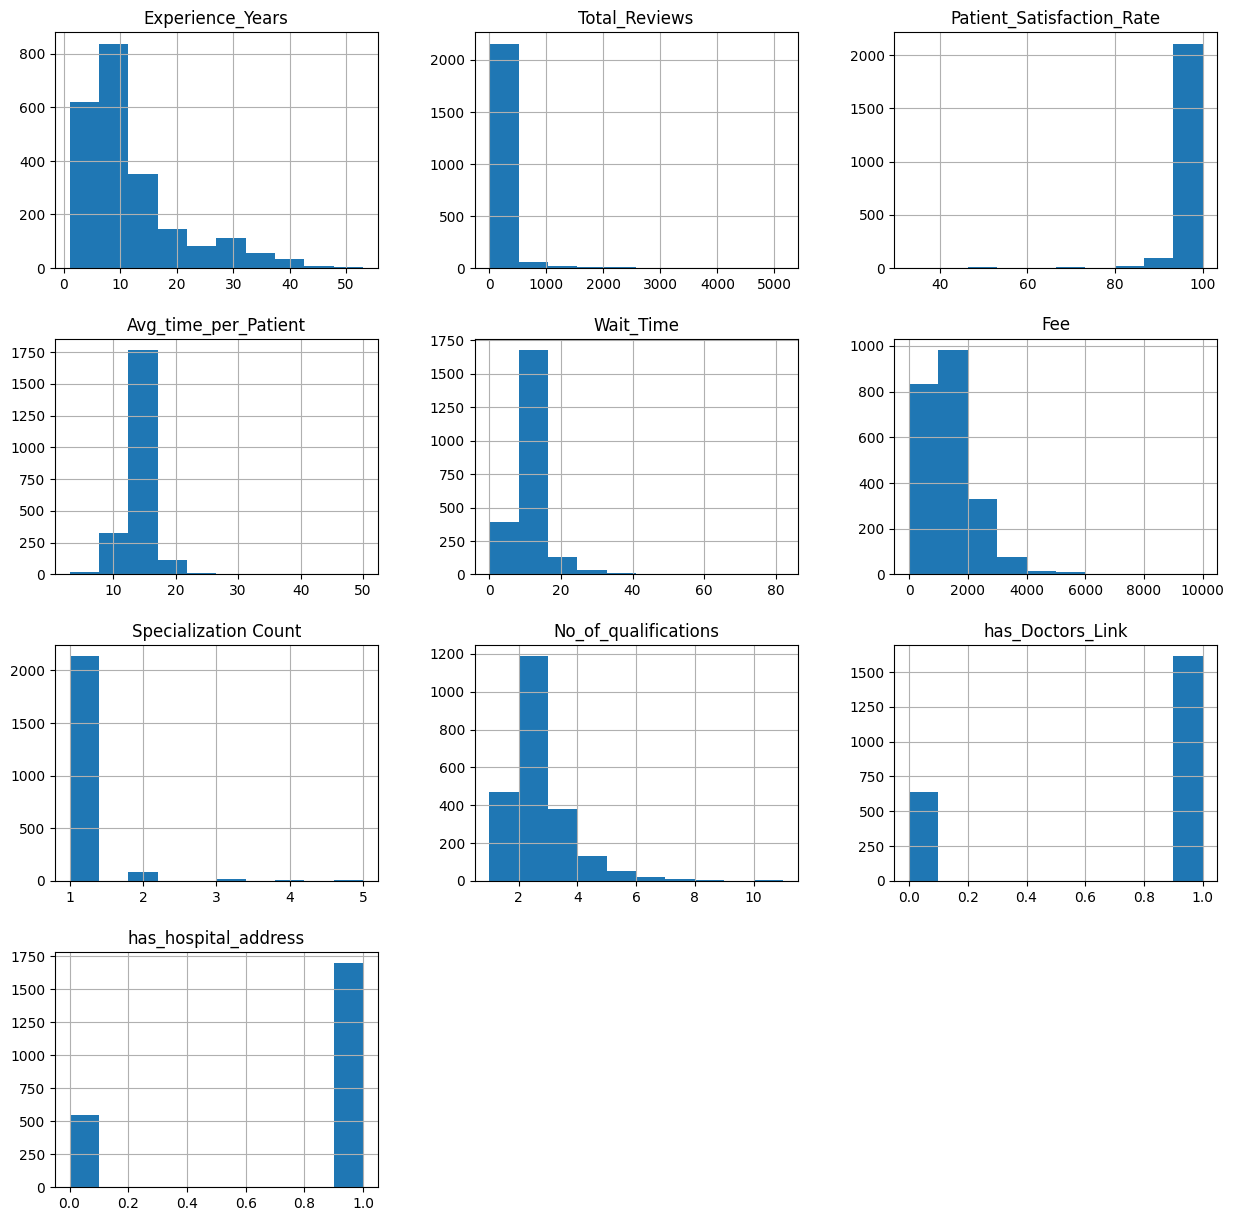

In [ ]:
df.hist(figsize=(15, 15))

we concluded that
1. experience is somehow normally distributed
2. total_reviews is right skewed and the max is > 2000 & min is almost 0
3.
4.try log to cancel skewness df['total_rooms'] = np.log(df['total_rooms'] +1)


<ipython-input-140-fd9251506a6e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




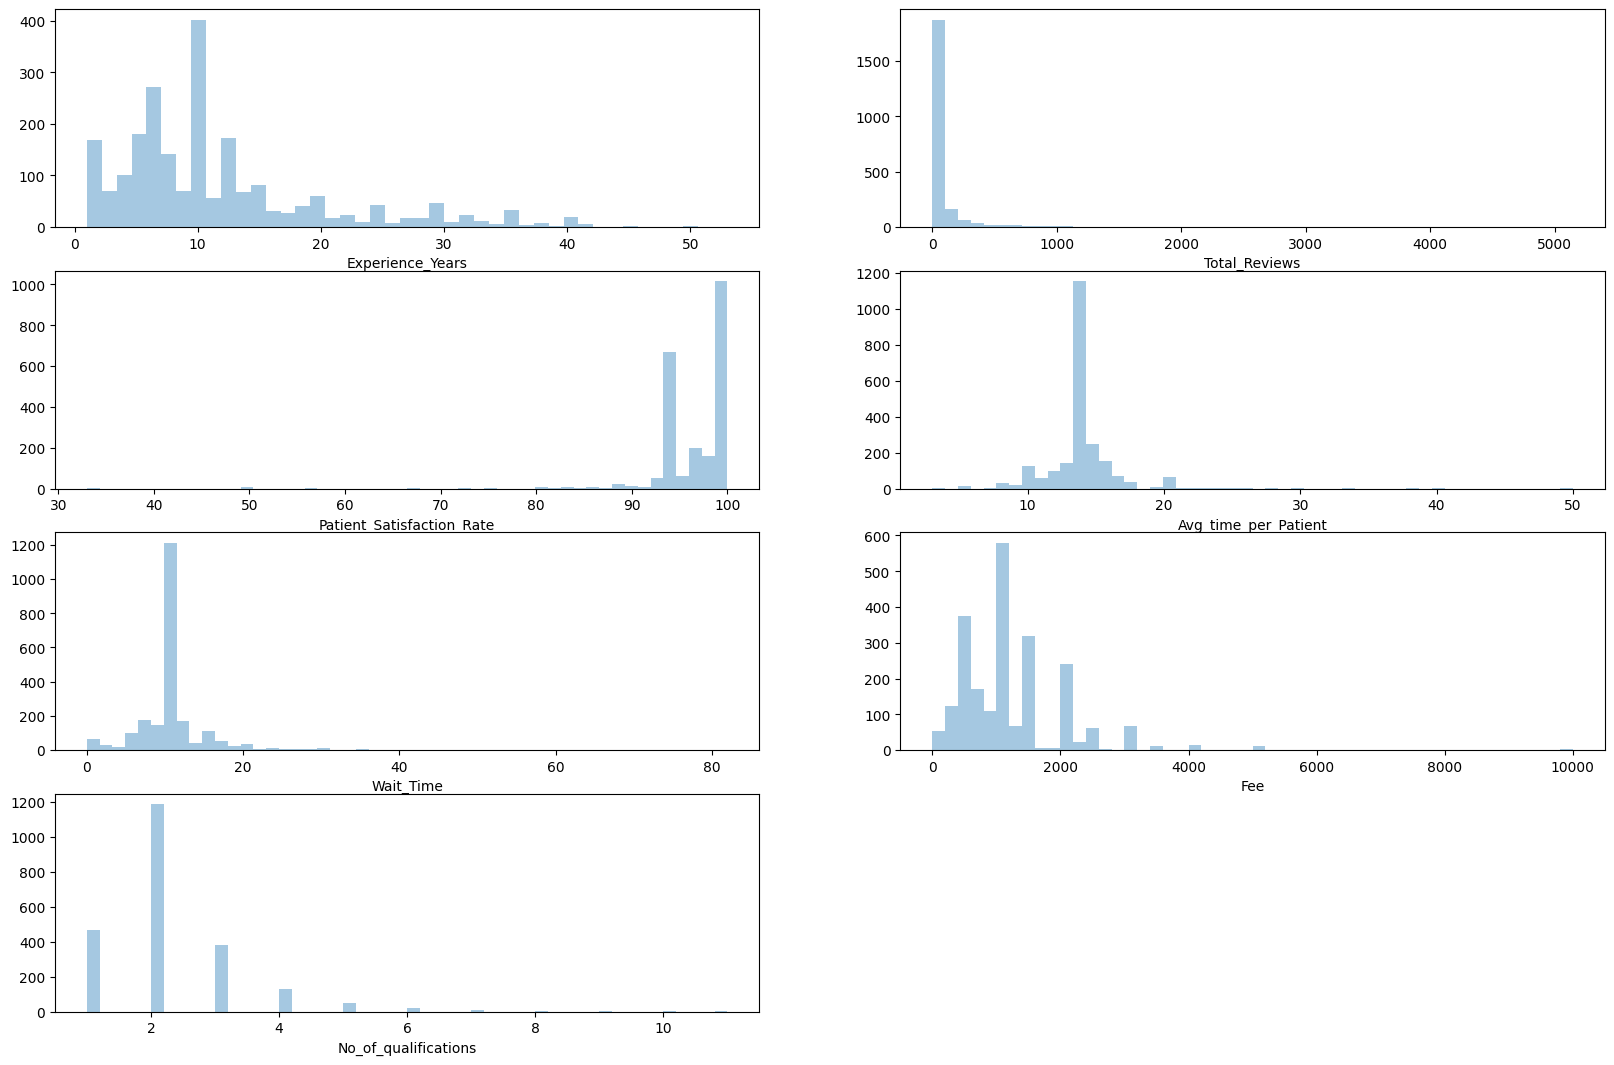

In [ ]:

plt.figure(figsize=(20,30))
for i, col in enumerate(df[numerical_columns].columns):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(df[col], ax=ax,kde=False)
    plt.xlabel(col)

plt.show()

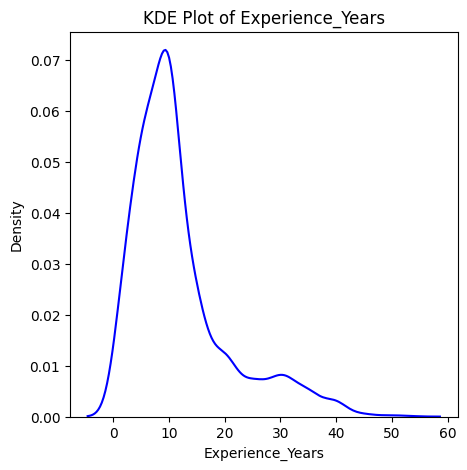

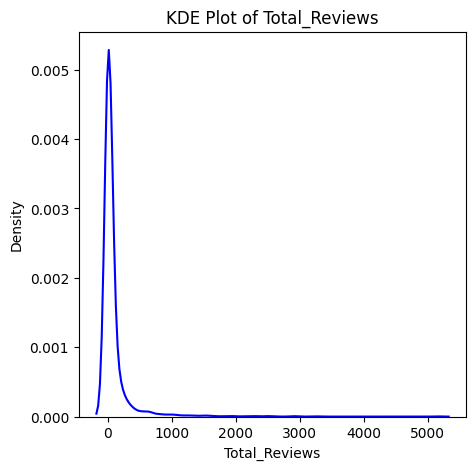

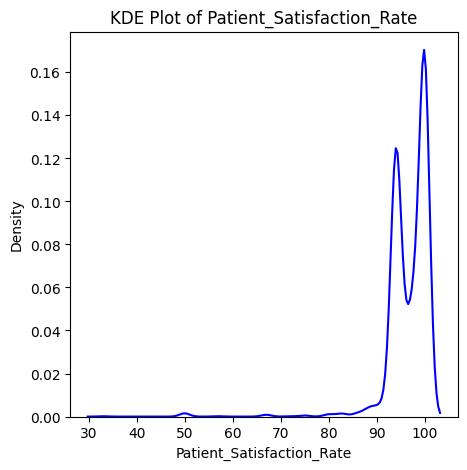

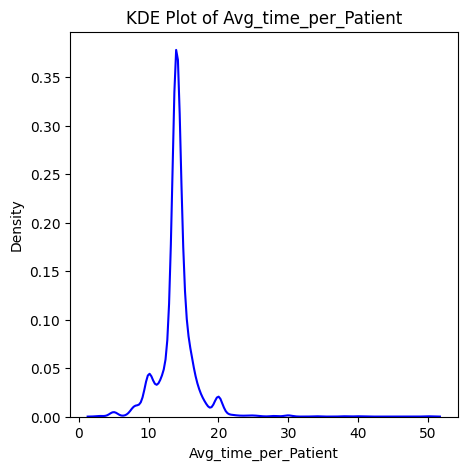

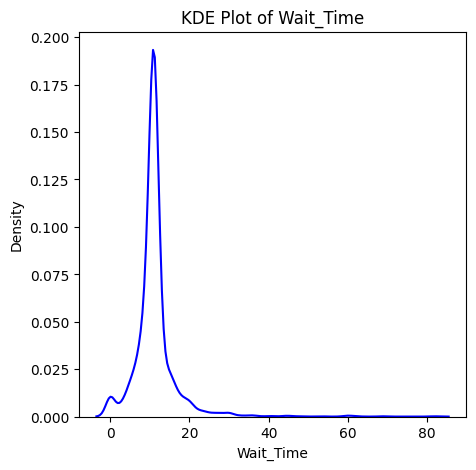

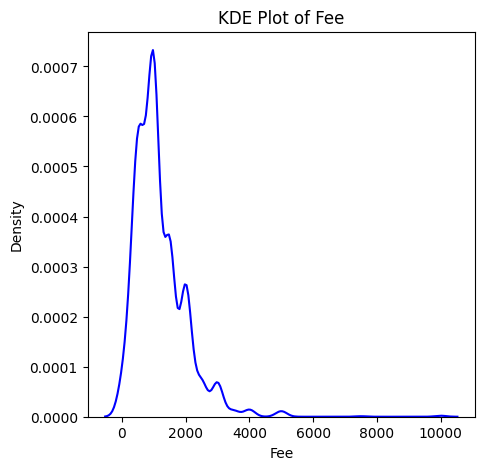

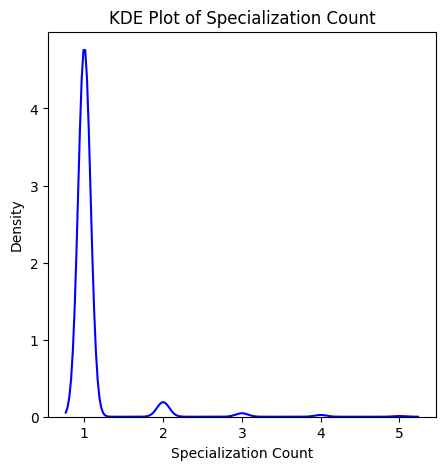

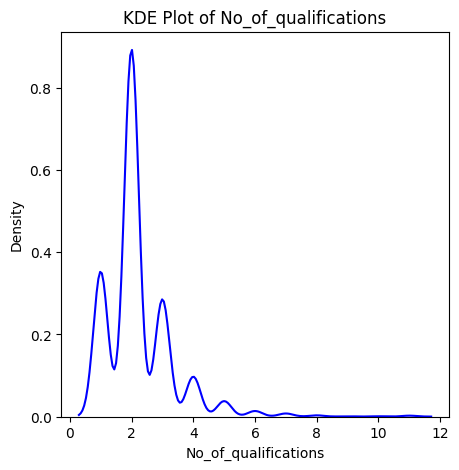

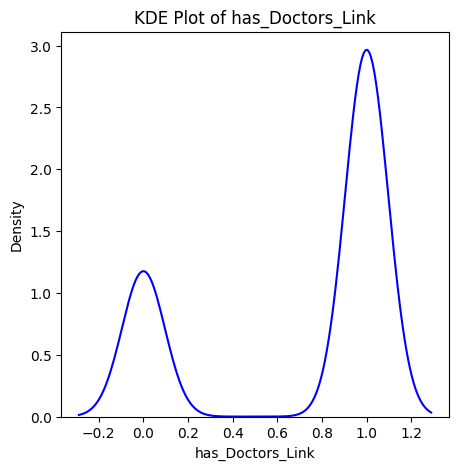

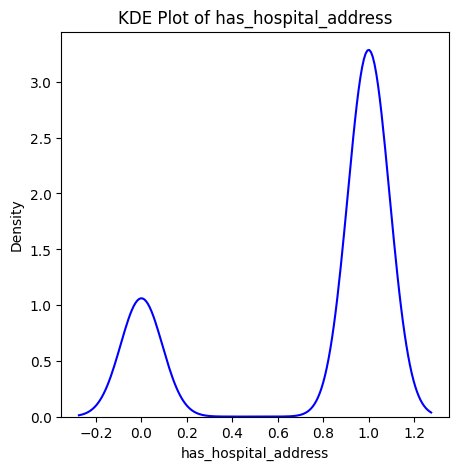

In [ ]:
# Filter numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Plot KDE for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(data=df, x=col, color='blue')
    plt.title(f'KDE Plot of {col}')
    plt.show()
    print("\n")

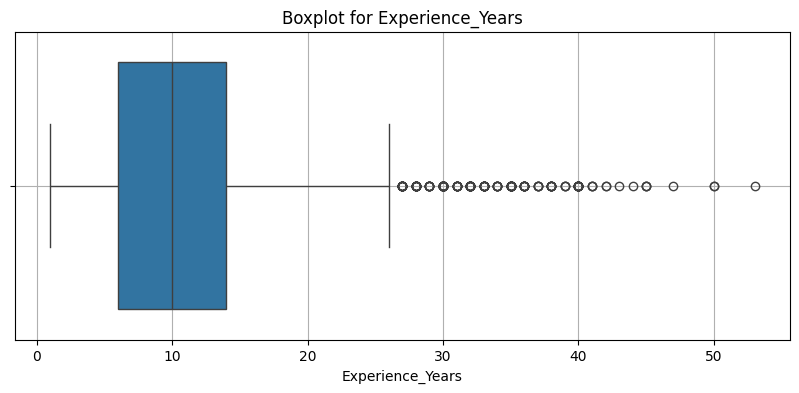

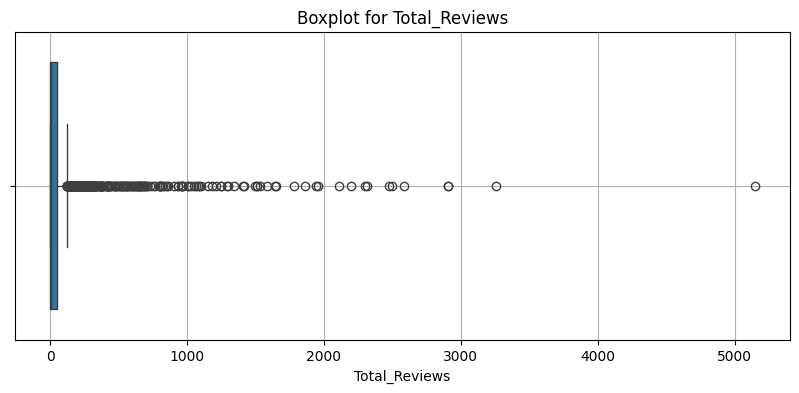

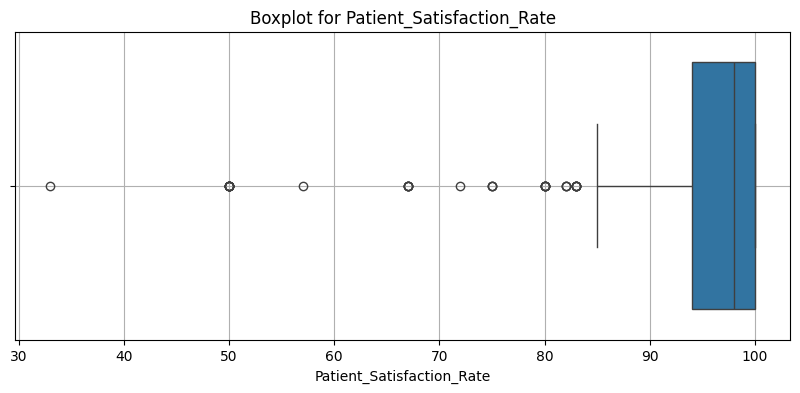

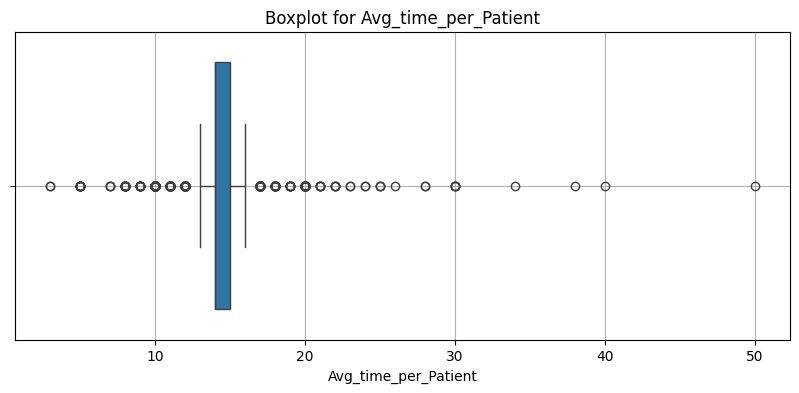

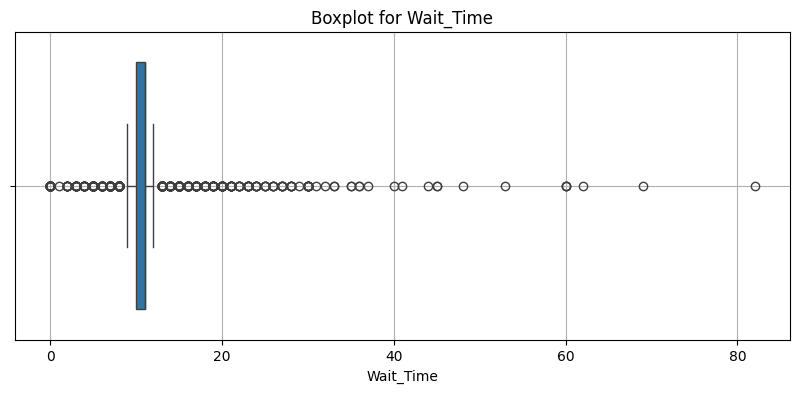

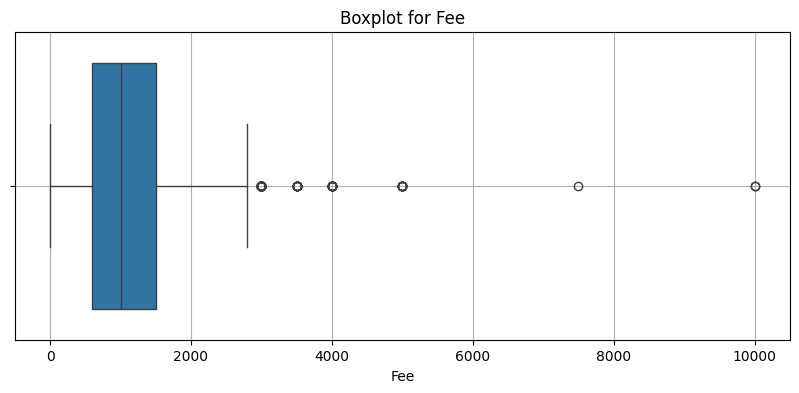

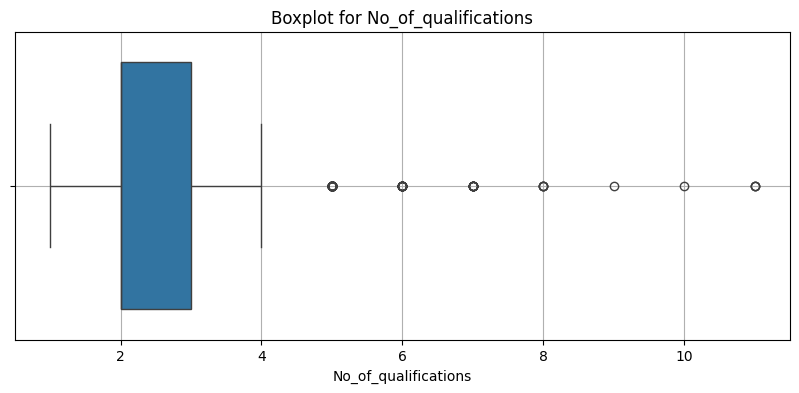

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.grid(True)
    plt.show()

#7.Experience(Years)

In [ ]:
### plot experierence > 10 with specialization w el fees

In [ ]:
df[['Experience_Years']].describe().T

count      mean       std  min  25%   50%   75%   max
Experience_Years  2251.0  11.79498  8.795912  1.0  6.0  10.0  14.0  53.0

Minimum 1.0
Maximum 53.0


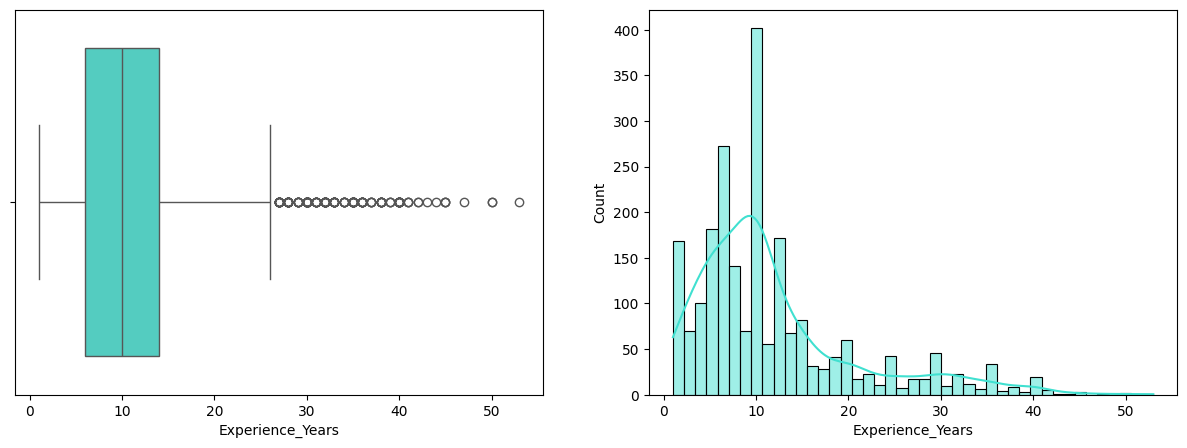

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Experience_Years'],color = 'turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Experience_Years'], kde=True ,color = 'turquoise')

print('Minimum',df['Experience_Years'].min())
print('Maximum',df['Experience_Years'].max())

In [ ]:
df.Experience_Years.value_counts()

Experience_Years
10.0    402
5.0     181
7.0     170
8.0     141
12.0    116
6.0     102
2.0     100
4.0      97
15.0     82
3.0      70
9.0      70
14.0     67
1.0      65
20.0     60
13.0     56
11.0     56
30.0     39
25.0     34
18.0     32
16.0     30
17.0     28
35.0     24
32.0     23
22.0     23
40.0     19
28.0     17
21.0     17
27.0     17
33.0     12
23.0     10
31.0      9
19.0      9
36.0      9
38.0      8
24.0      8
26.0      7
29.0      7
34.0      6
37.0      4
1.5       3
45.0      3
39.0      3
41.0      3
42.0      2
50.0      2
4.5       2
3.5       1
44.0      1
47.0      1
43.0      1
53.0      1
16.5      1
Name: count, dtype: int64

concluded that there are drs that have experience yrs 1.5 and 4.5 so will round them

In [ ]:
#17
df['Experience_Years'] = df['Experience_Years'].round()

In [ ]:
df.Experience_Years.value_counts()

Experience_Years
10.0    402
5.0     181
7.0     170
8.0     141
12.0    116
2.0     103
6.0     102
4.0     100
15.0     82
3.0      70
9.0      70
14.0     67
1.0      65
20.0     60
13.0     56
11.0     56
30.0     39
25.0     34
18.0     32
16.0     31
17.0     28
35.0     24
22.0     23
32.0     23
40.0     19
27.0     17
28.0     17
21.0     17
33.0     12
23.0     10
19.0      9
31.0      9
36.0      9
24.0      8
38.0      8
29.0      7
26.0      7
34.0      6
37.0      4
41.0      3
39.0      3
45.0      3
42.0      2
50.0      2
47.0      1
44.0      1
43.0      1
53.0      1
Name: count, dtype: int64

most drs have experience 10 yrs

In [ ]:
fig = px.histogram(df, x='Experience_Years', color='Experience_Years',
                   title='Distribution of Experience Years',
                   labels={'Experience_Years': 'Experience Years', 'count': 'Frequency'},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis=dict(type='category', categoryorder='array', categoryarray=df['Experience_Years'].value_counts().index))

fig.show()

In [ ]:
df.Experience_Years.value_counts()

Experience_Years
10.0    402
5.0     181
7.0     170
8.0     141
12.0    116
2.0     103
6.0     102
4.0     100
15.0     82
3.0      70
9.0      70
14.0     67
1.0      65
20.0     60
13.0     56
11.0     56
30.0     39
25.0     34
18.0     32
16.0     31
17.0     28
35.0     24
22.0     23
32.0     23
40.0     19
27.0     17
28.0     17
21.0     17
33.0     12
23.0     10
19.0      9
31.0      9
36.0      9
24.0      8
38.0      8
29.0      7
26.0      7
34.0      6
37.0      4
41.0      3
39.0      3
45.0      3
42.0      2
50.0      2
47.0      1
44.0      1
43.0      1
53.0      1
Name: count, dtype: int64

0.44090970747262503


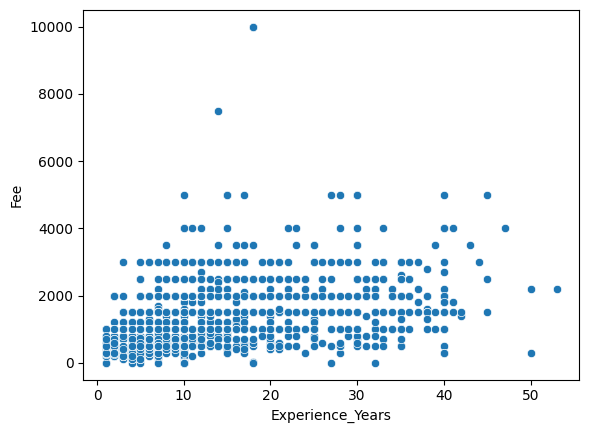

In [ ]:
sns.scatterplot(x="Experience_Years", y="Fee", data=df)
print(df['Fee'].corr(df['Experience_Years']))
# Experience has almost no relationship with the fees

exprience varies from range of 1-53 & most are 10 yrs and right skewed

In [ ]:
df_sorted = df.sort_values(by='Fee')

fig = px.bar(df_sorted, x='Experience_Years', y='Fee',
             title='Relationship between Experience and Fee',
             labels={'Experience_Years': 'Experience Years', 'Fee': 'Fee'},
             color='Experience_Years',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis=dict(categoryorder='total ascending'))

fig.show()


In [ ]:
max_fee_by_experience = df.groupby('Experience_Years')['Fee'].max()
min_fee_by_experience = df.groupby('Experience_Years')['Fee'].min()

# Create a DataFrame for visualization
plot_data = pd.DataFrame({'Experience_Years': max_fee_by_experience.index,
                          'Max_Fee': max_fee_by_experience.values,
                          'Min_Fee': min_fee_by_experience.values})

# Plot the data
fig = px.line(plot_data, x='Experience_Years', y=['Max_Fee', 'Min_Fee'],
              title='Maximum and Minimum Fees vs. Experience Years',
              labels={'value': 'Fee', 'Experience_Years': 'Experience Years'})
fig.show()


* AT max_fees : wee got that drs with experience 5 or more yrs are maximum then there is a drop at 24yrs then gets high again
* min_fees varies as exp varies to sum us fees is not that related to experience as there is a wide range in fees as it depends more on market demand , specialization ,Patient Demographics

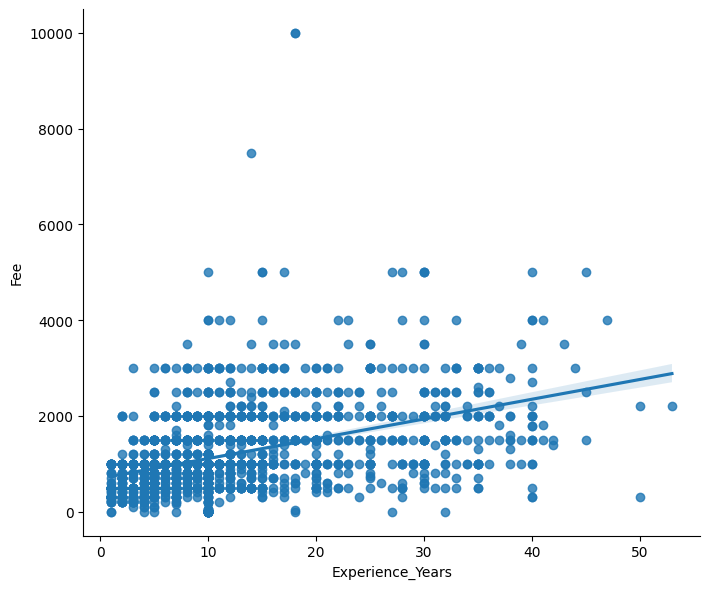

In [ ]:
sns.lmplot(x='Experience_Years',y='Fee',data=df,height=6, aspect=1.2)

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30]
# labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
labels = ['Novice', 'Beginner', 'Competent', 'Proficient', 'Expert', 'Master']


df['Experience_Group'] = pd.cut(df['Experience_Years'], bins=bins, labels=labels, right=False)



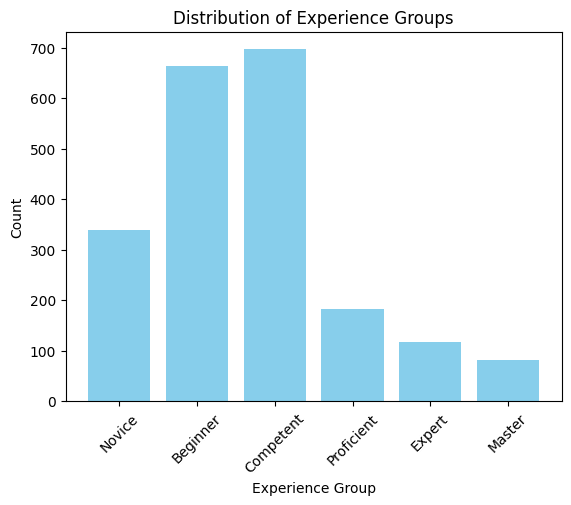

In [ ]:
group_counts = df['Experience_Group'].value_counts().sort_index()

# Plotting
plt.bar(group_counts.index, group_counts.values, color='skyblue')
plt.xlabel('Experience Group')
plt.ylabel('Count')
plt.title('Distribution of Experience Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

* mmkn ndrop

In [ ]:
fig = px.scatter(df, x='Experience_Group', y='Fee', title='Fee by Experience Group')
fig.show()

In [ ]:
fig = px.bar(df, x='Experience_Group', y='Fee', title='Average Fees by Experience Group')

# Show the plot
fig.show()

Minimum Novice
Maximum Master


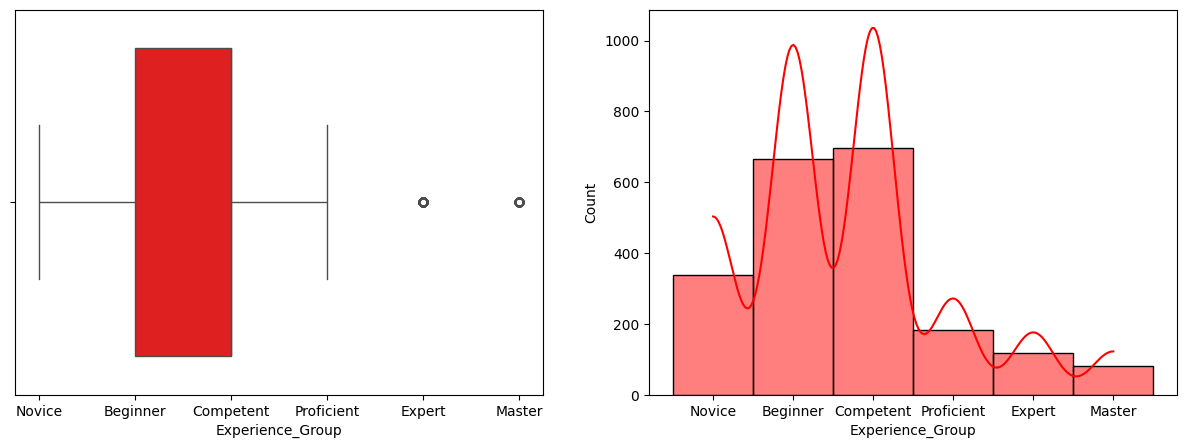

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Experience_Group'],color = 'red')
plt.subplot(1,2,2)
sns.histplot(x = df['Experience_Group'], kde=True ,color = 'red')

print('Minimum',df['Experience_Group'].min())
print('Maximum',df['Experience_Group'].max())

In [ ]:
df.dtypes

Doctor Name                    object
City                           object
Specialization                 object
Doctor Qualification           object
Experience_Years              float64
Total_Reviews                   int64
Patient_Satisfaction_Rate       int64
Avg_time_per_Patient            int64
Wait_Time                       int64
Hospital Address               object
Doctors Link                   object
Fee                             int64
Titles                         object
Region                         object
Specialization Count            int64
No_of_qualifications            int64
has_Doctors_Link                int64
has_hospital_address            int64
Experience_Group             category
dtype: object

#8.Total_Reviews

In [ ]:
#### visualisation b kol el columns yo3tbar

Minimum 0
Maximum 5147


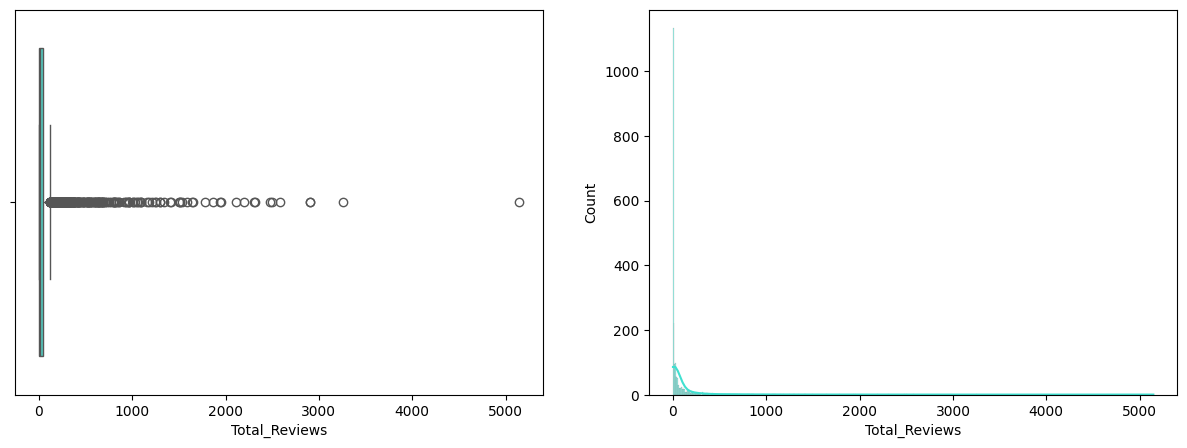

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Total_Reviews'],color = 'turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Total_Reviews'], kde=True ,color = 'turquoise')

print('Minimum',df['Total_Reviews'].min())
print('Maximum',df['Total_Reviews'].max())

In [ ]:
df['Total_Reviews'].value_counts()

Total_Reviews
0      639
1      142
2       98
3       68
4       63
      ... 
803      1
635      1
269      1
282      1
241      1
Name: count, Length: 361, dtype: int64

most of reviews are 0

In [ ]:
df['Review_or_Not'] = (df['Total_Reviews'] > 0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2251 entries, 0 to 2385
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Doctor Name                2251 non-null   object  
 1   City                       2251 non-null   object  
 2   Specialization             2251 non-null   object  
 3   Doctor Qualification       2251 non-null   object  
 4   Experience_Years           2251 non-null   float64 
 5   Total_Reviews              2251 non-null   int64   
 6   Patient_Satisfaction_Rate  2251 non-null   int64   
 7   Avg_time_per_Patient       2251 non-null   int64   
 8   Wait_Time                  2251 non-null   int64   
 9   Hospital Address           2251 non-null   object  
 10  Doctors Link               2251 non-null   object  
 11  Fee                        2251 non-null   int64   
 12  Titles                     2251 non-null   object  
 13  Region                     2251 non-nu

In [ ]:
# Get unique values of the column
unique_patient_satisfaction_rates = df['Total_Reviews'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_patient_satisfaction_rates)

# Print count of each unique value


# Print the number of unique values
num_unique_values = len(unique_patient_satisfaction_rates)
print("\nNumber of unique values:", num_unique_values)

Unique values in the column:
[  11    0    9   71  199   22    4   94    2   12  185  136    5   88
  202   10  195   14  127    6   38  110   45 1083  112   97   77   90
  155   24    3  908 2904  469  118   26  600  859    1  346   55    7
 1511  152  139  141   31   21   19  300  387   34 1298  124    8   61
  164   69   40   13  126  679   54   79  148   29   84  601  109  131
  151 1029  841   78  216 2304   25   27   59   18   16  962  242   86
   20  186   99   65  342 1215  210  317  121   57   64  106   62 1939
  128   85  284   98  182   28  209   51  200  275  586   46   67  105
   17   32   76 1641  177 1099   49  445   74  157   50  147   30   35
   63  168  143   72   15   23  174 1063  140   82   68  751  173  297
   60   47  226  122  180  359   37  123   39  523  153 1498  150   70
   53  232  125  117  268  636  319  156   42  104  529   92  101   95
   93   52  730  310  287  685   41   89  337  213  380  800  290 1650
  167  108  160  113  338   81  103  222  316  1

In [ ]:
fig = px.box(df, x='Region', y='Total_Reviews', color='Region',
             title='Box Plot: Total Reviews by Region')
fig.show()

least reviews at international regions and kashmir region

In [ ]:
fig = px.bar(df, x='Region', y='Review_or_Not', title='Bar Plot: Total Reviews by Region (Unique Values)')
fig.show()

In [ ]:
df_filtered = df[df['Total_Reviews'] == 1]

# Create a bar plot using Plotly Express
fig = px.bar(df_filtered, x='Specialization', title='Specializations with Total Reviews Equal to 1')
fig.show()

In [ ]:
fig = px.scatter(df, x='Patient_Satisfaction_Rate', y='Total_Reviews',
                 title='Scatter Plot: Patient Satisfaction Rate vs Total Reviews')
fig.show()

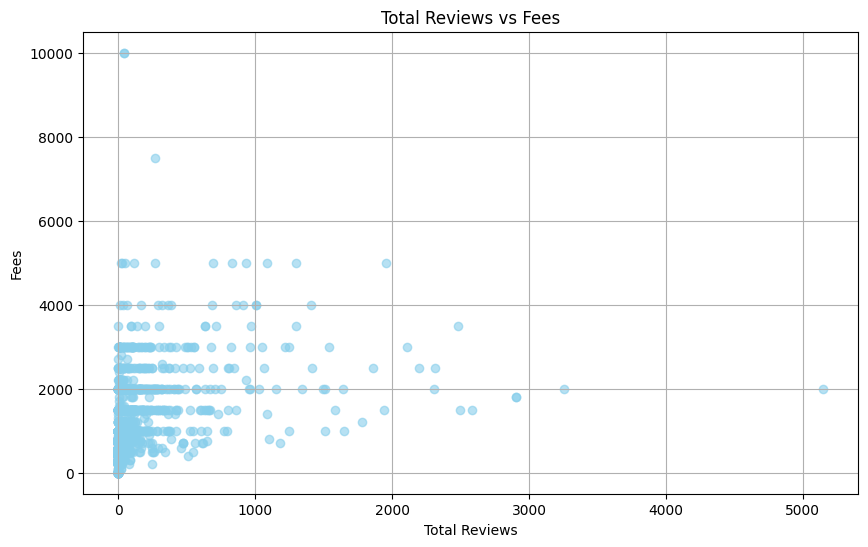

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Reviews'], df['Fee'], color='skyblue', alpha=0.6)
plt.title('Total Reviews vs Fees')
plt.xlabel('Total Reviews')
plt.ylabel('Fees')
plt.grid(True)
plt.show()

In [ ]:
#total reviews doesnt correlate so much with fee

#9.Patient Satisfaction Rate(%age)

In [ ]:
# Get unique values of the column
unique_patient_satisfaction_rates = df['Patient_Satisfaction_Rate'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_patient_satisfaction_rates)

# Print count of each unique value

# Print the number of unique values
num_unique_values = len(unique_patient_satisfaction_rates)
print("\nNumber of unique values:", num_unique_values)

Unique values in the column:
[100  94  96  98  99  97  75  93  83  95  92  50  90  89  67  86  91  80
  88  87  82  57  33  85  72]

Number of unique values: 25


from 33 -100

Minimum 33
Maximum 100


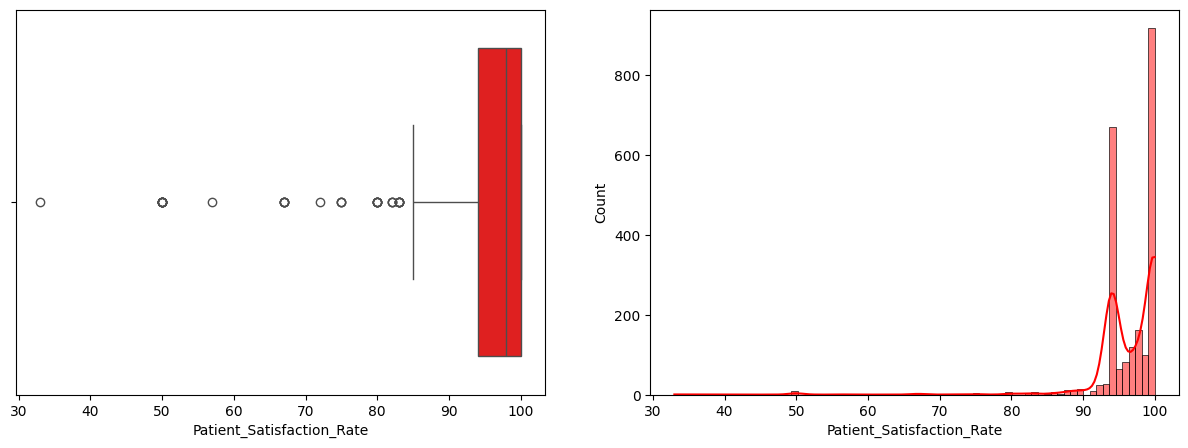

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Patient_Satisfaction_Rate'],color = 'red')
plt.subplot(1,2,2)
sns.histplot(x = df['Patient_Satisfaction_Rate'], kde=True ,color = 'red')

print('Minimum',df['Patient_Satisfaction_Rate'].min())
print('Maximum',df['Patient_Satisfaction_Rate'].max())

In [ ]:
satisfaction_rate_counts = df['Patient_Satisfaction_Rate'].value_counts()

satisfaction_rate_counts_sorted = satisfaction_rate_counts.sort_index(ascending=True)

print("\nCount of each unique value (Patient_Satisfaction_Rate sorted in ascending order):")
print(satisfaction_rate_counts_sorted)



Count of each unique value (Patient_Satisfaction_Rate sorted in ascending order):
Patient_Satisfaction_Rate
33       1
50       9
57       1
67       5
72       1
75       3
80       6
82       3
83       6
85       1
86       7
87       2
88      12
89      11
90      13
91       8
92      24
93      27
94     670
95      63
96      81
97     118
98     162
99      99
100    918
Name: count, dtype: int64


we can categorize ratings to high , med , low

In [ ]:
df['Patient_Satisfaction_Rate'].describe()

count    2251.000000
mean       96.656153
std         4.965654
min        33.000000
25%        94.000000
50%        98.000000
75%       100.000000
max       100.000000
Name: Patient_Satisfaction_Rate, dtype: float64

min rate is 33 and max is 100

<Axes: ylabel='Patient_Satisfaction_Rate'>

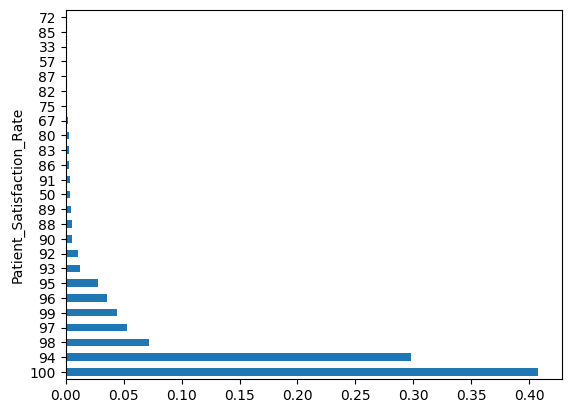

In [ ]:
df['Patient_Satisfaction_Rate'].value_counts(normalize=True)[:25].plot(kind='barh')

most have rating 100%
 minimum rating as 33%.
3. highly skewed to the left and there are outliers

In [ ]:
df_copy = df.copy()

# Divide 'Patient_Satisfaction_Rate' values by 1000
df_copy['Patient_Satisfaction_Rate'] /= 1000

# Create a bar plot using Plotly Express
fig = px.bar(df_copy, x='Wait_Time', y='Patient_Satisfaction_Rate', title='Wait Time vs. Patient Satisfaction Rate (in Thousands)')

# Update y-axis tick labels to display values in thousands
fig.update_yaxes(tickformat='.0f', title='Patient Satisfaction Rate (Thousands)')

# Show the plot
fig.show()

if the waiting time for the dr but the dr is good so it is worth the wait so it doesnt affect

if fees is min which is minimum and equal to =0 satesfaction rate seems high  

#10.Avg Time to Patients(min)

Minimum 3
Maximum 50


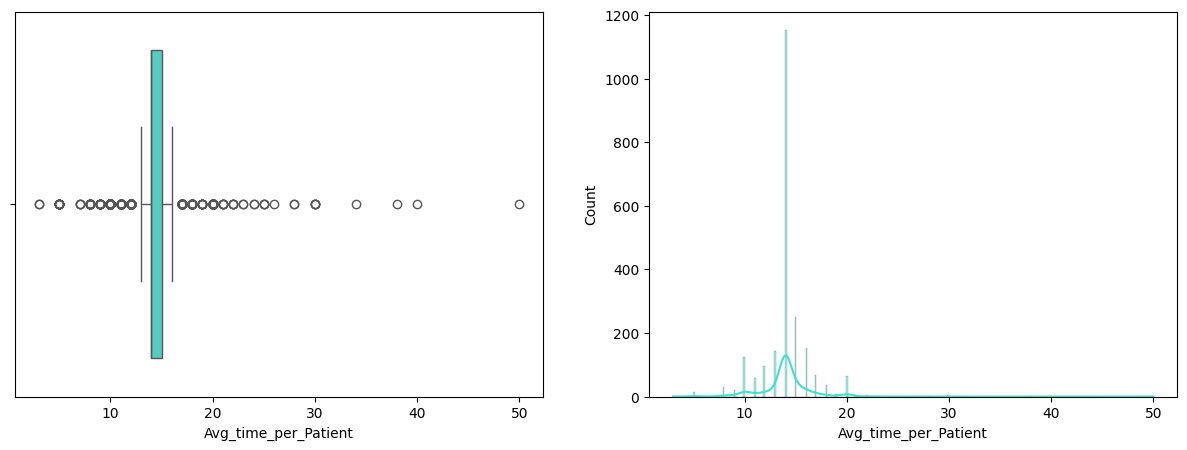

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Avg_time_per_Patient'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Avg_time_per_Patient'], kde=True , color='turquoise')

print('Minimum',df['Avg_time_per_Patient'].min())
print('Maximum',df['Avg_time_per_Patient'].max())

A pie chart that shows that the majority of the patients spend of average less than 15 mins

In [ ]:
unique_avg_time_per_patient = df['Avg_time_per_Patient'].unique()
print(unique_avg_time_per_patient)


[19 14 10 18 16 15 12 20 11 13  8  9 40 23 30 17  5  3 22 38 24 21 26  7
 34 28 25 50]


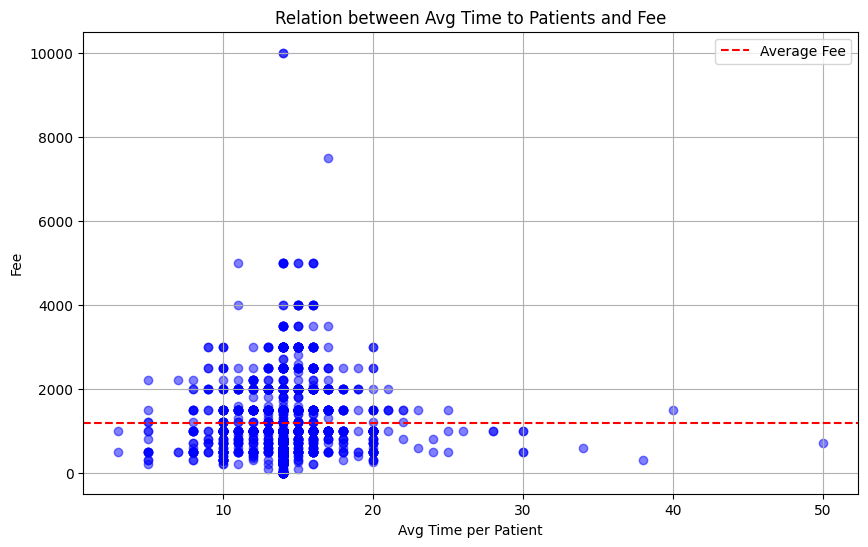

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Avg_time_per_Patient'], df['Fee'], color='blue', alpha=0.5)
plt.axhline(y=df['Fee'].mean(), color='red', linestyle='--', label='Average Fee')
plt.title('Relation between Avg Time to Patients and Fee')
plt.xlabel('Avg Time per Patient')
plt.ylabel('Fee')
plt.legend()
plt.grid(True)
plt.show()



#11.Wait Time(mins)


In [ ]:
df['Wait_Time']

0        6
1       11
2        0
3       10
4        2
        ..
2380     9
2381    11
2382    11
2384    12
2385    10
Name: Wait_Time, Length: 2251, dtype: int64

In [ ]:
df['Wait_Time'].isnull().sum()

0

In [ ]:
max_value = df['Wait_Time'].max()
min_value = df['Wait_Time'].min()
print('max val = ' , max_value)
print('min val = ' , min_value)

max val =  82
min val =  0


<Axes: xlabel='Wait_Time', ylabel='Count'>

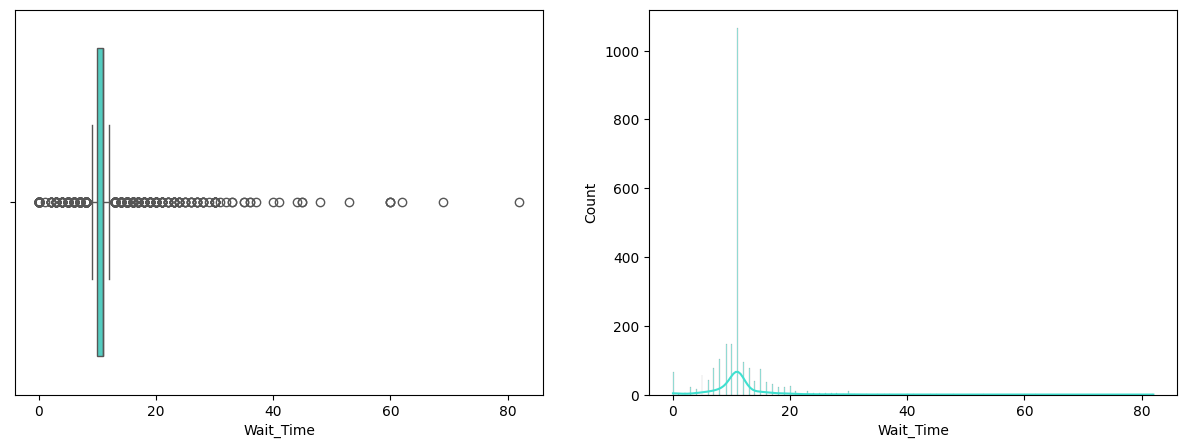

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Wait_Time'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Wait_Time'], kde=True , color='turquoise')

In [ ]:
# # Set the style of the plot
# sns.set(style="whitegrid")

# # Create a bigger figure
# plt.figure(figsize=(28, 8))

# # Create a bar plot using Seaborn
# sns.barplot(x='Wait_Time', y='Fee', data=df, palette="viridis")  # Change palette to "viridis"
# plt.xlabel('Wait Time')
# plt.ylabel('Fee')
# plt.title('Fee vs Wait Time')

# # Show the plot
# plt.show()


# #group by average fees per each waittime

<ipython-input-187-1e1136cb2c0c>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




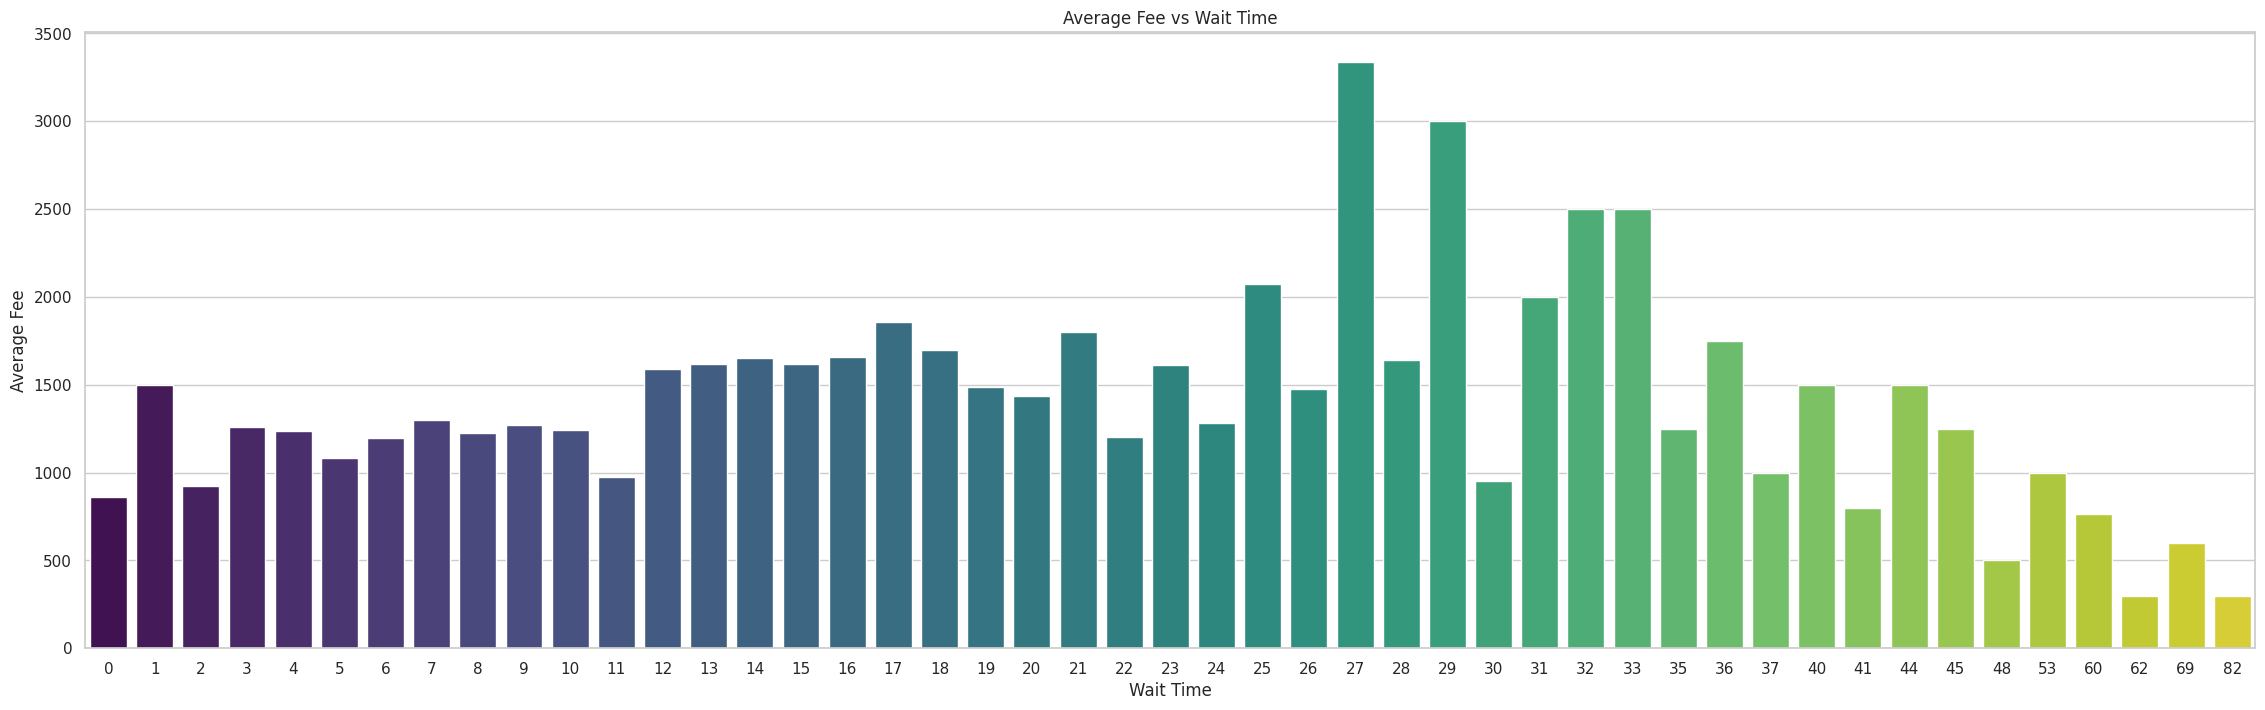

In [ ]:
avg_fee_per_wait_time = df.groupby('Wait_Time')['Fee'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bigger figure
plt.figure(figsize=(28, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Wait_Time', y='Fee', data=avg_fee_per_wait_time, palette="viridis")  # Change palette to "viridis"
plt.xlabel('Wait Time')
plt.ylabel('Average Fee')
plt.title('Average Fee vs Wait Time')

# Show the plot
plt.show()

## Feature Engineering (Total Time)

In [ ]:
#18
df['Total Time'] = df['Avg_time_per_Patient'] + df['Wait_Time']

In [ ]:
df

Doctor Name         City              Specialization  \
0                   Umair Hafeez   Gujranwala              Ent Specialist   
1                  Haris Shakeel    Rajan Pur           General Physician   
2                    Iqra Rehman  Mirpur Khas           General Physician   
3                     Erum Memon    Hyderabad                Gynecologist   
4                    Aisha Ahmad       Lahore               Dermatologist   
...                          ...          ...                         ...   
2380  Syed Muhammad Danish Aslam     Sargodha                Pediatrician   
2381                 Amna Rizwan       Lahore  Eye Specialist,Eye Surgeon   
2382               Misbah Fatima        Okara                Pediatrician   
2384                 Ahmed Ayyaz      Sahiwal                Nephrologist   
2385                 Rameez Aziz      Larkana                Nephrologist   

                                   Doctor Qualification  Experience_Years  \
0           FCPSOtorhinolaryngologicOtolaryngology,MBBS               6.0   
1                                                  MBBS               1.0   
2                      CFPUSA,CertifiedinCovid,MBBS,RMP               6.0   
3                           FCPSGynaeampObstetrics,MBBS              11.0   
4     CertifiedAestheticInternalMedicine,FCPSDermato...              12.0   
...                                                 ...               ...   
2380                                FCPSPediatrics,MBBS               8.0   
2381                              FCPSVITREORETINA,MBBS              10.0   
2382                                FCPSPediatrics,MBBS              10.0   
2384                                  MBBS,MDNephrology              12.0   
2385                                FCPSNephrology,MBBS               8.0   

      Total_Reviews  Patient_Satisfaction_Rate  Avg_time_per_Patient  \
0                11                        100                    19   
1                 0                         94                    14   
2                 9                        100                    10   
3                71                         96                    18   
4               199                        100                    16   
...             ...                        ...                   ...   
2380              1                        100                    10   
2381             11                        100                    14   
2382              7                        100                    14   
2384             23                        100                    14   
2385              1                        100                    10   

      Wait_Time                                   Hospital Address  ...   Fee  \
0             6        Central Hospital, Jinnah Colony, Gujranwala  ...  2000   
1            11                               No Address Available  ...   500   
2             0         Rehman Clinic, tandoadam naka, Mirpur Khas  ...  1000   
3            10             Mehmood Hospital, Qasimabad, Hyderabad  ...   800   
4             2                   Skinnovation, Johar Town, Lahore  ...  1500   
...         ...                                                ...  ...   ...   
2380          9  Mubarak Medical Complex Hospital, Satellite To...  ...  1000   
2381         11                 Wahdat clinic, Wahdat Road, Lahore  ...  1000   
2382         11  Zayyan Kidney and Child Care Clinic, Okara, Okara  ...  1000   
2384         12  Sahiwal International Hospital, Near General B...  ...  1500   
2385         10          ali hospital larkana, wagan road, Larkana  ...   800   

            Titles         Region Specialization Count  No_of_qualifications  \
0               Dr  Punjab Region                    1                     2   
1               Dr  Punjab Region                    1                     1   
2               Dr   Sindh Region                    1                     4   
3            

#12.Fee(PKR)

In [ ]:
df['Fee'].value_counts()

Fee
1000     579
500      333
1500     311
2000     239
800      102
700       99
300       77
3000      66
1200      63
2500      62
600       59
400       41
200       33
2200      23
0         22
5         17
750       14
4000      14
3500      12
5000      11
250       11
1400       8
1800       7
900        6
1300       5
100        5
1600       4
50         3
1799       2
350        2
10000      2
2700       2
10         2
1100       1
2400       1
25         1
20         1
1499       1
2100       1
2800       1
850        1
1700       1
450        1
999        1
2600       1
150        1
180        1
7500       1
Name: count, dtype: int64

There is imbalance in the target so will use stratify
To prevent bias and ensures that our model learns from a balanced distribution of target classes



Minimum 0
Maximum 10000


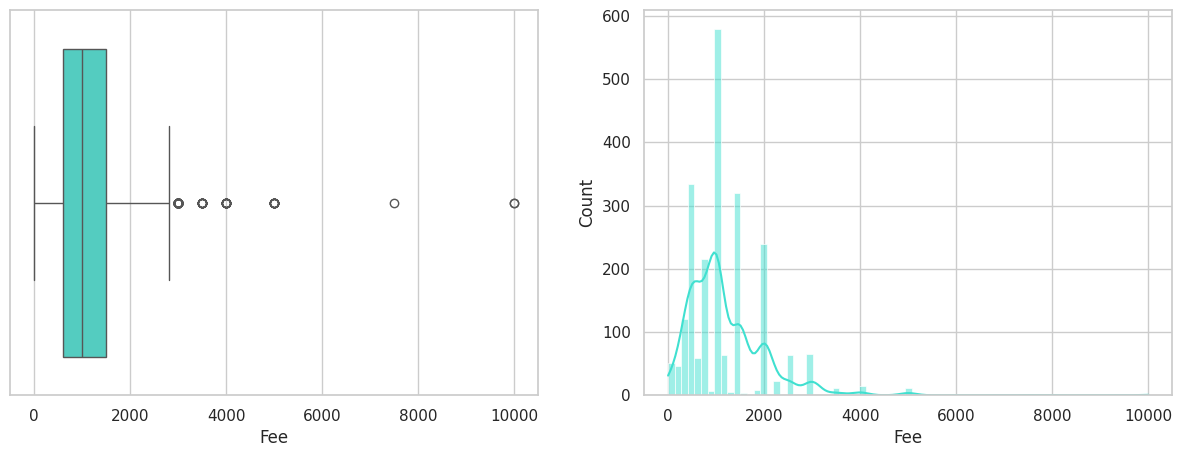

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Fee'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Fee'], kde=True , color='turquoise')

print('Minimum',df['Fee'].min())
print('Maximum',df['Fee'].max())

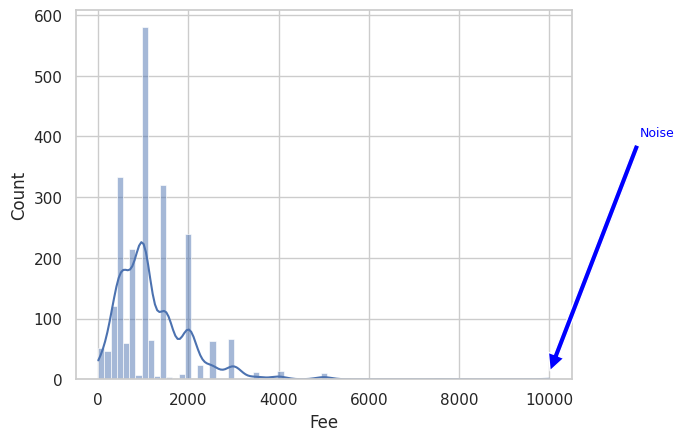

In [ ]:
sns.histplot(df['Fee'], kde=True)

# Annotate the point indicating noise
plt.annotate('Noise', xy=(10000, 10), xytext=(12000, 400), color='blue', fontsize=9,
             arrowprops=dict(facecolor='blue', shrink=0.01))

plt.show()

 some dr dont take fees but others take 10000 majority takes 1500

In [ ]:
# df2 = df
# df1 = df

#Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2251 entries, 0 to 2385
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Doctor Name                2251 non-null   object  
 1   City                       2251 non-null   object  
 2   Specialization             2251 non-null   object  
 3   Doctor Qualification       2251 non-null   object  
 4   Experience_Years           2251 non-null   float64 
 5   Total_Reviews              2251 non-null   int64   
 6   Patient_Satisfaction_Rate  2251 non-null   int64   
 7   Avg_time_per_Patient       2251 non-null   int64   
 8   Wait_Time                  2251 non-null   int64   
 9   Hospital Address           2251 non-null   object  
 10  Doctors Link               2251 non-null   object  
 11  Fee                        2251 non-null   int64   
 12  Titles                     2251 non-null   object  
 13  Region                     2251 non-nu

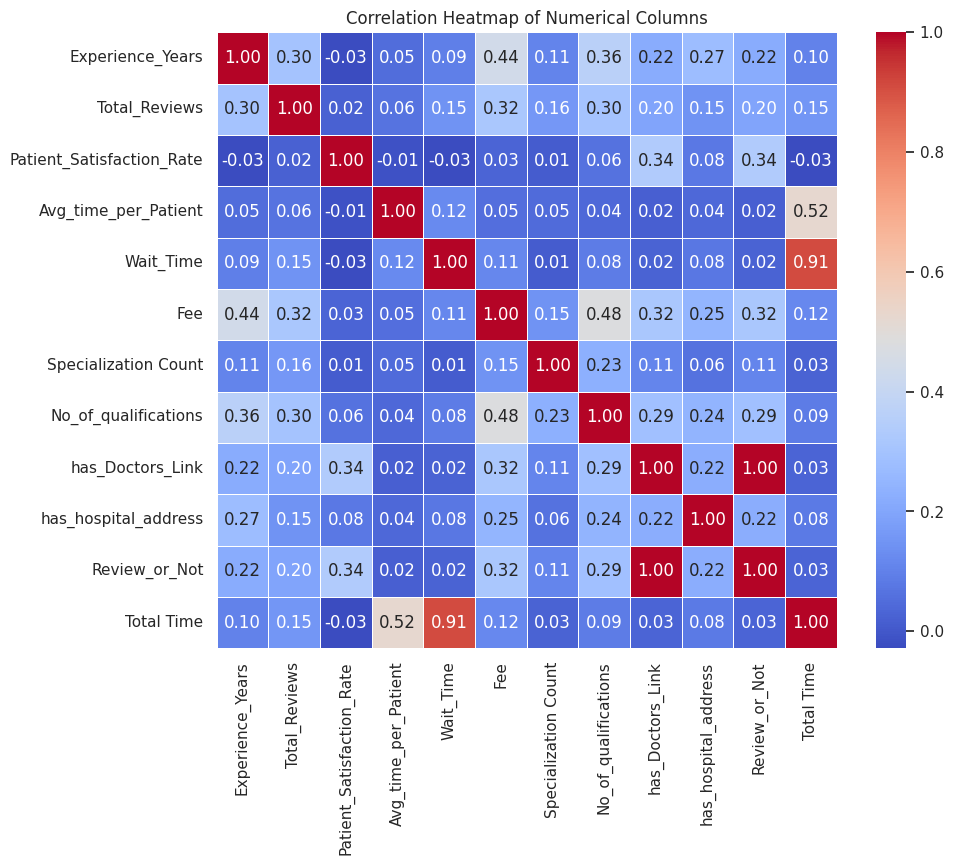

In [ ]:
numerical_columns = df.select_dtypes(exclude=['object', 'category'])

# Calculate correlation matrix
corr_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


will drop reviews or not ass it gives same corr as total reviews


In [ ]:
df.drop(['Review_or_Not'], axis=1, inplace=True)
df.drop(['Avg_time_per_Patient'], axis=1, inplace=True)
df.drop(['Wait_Time'], axis=1, inplace=True)

In [ ]:
# Filter columns with dtype 'object' or 'category'
categorical_columns = df.columns[df.dtypes.isin(['object', 'category'])].tolist()

cardinality_ratios = {}

for col in categorical_columns:
    try:
        cardinality_ratio = len(df[col].unique()) / len(df)
        cardinality_ratios[col] = cardinality_ratio
    except TypeError:
        print(f"Skipping '{col}' column due to unsupported data type.")

for col, ratio in cardinality_ratios.items():

    print(f"Cardinality ratio for '{col}' column:", ratio)


Surly we will drop Doctor Name as CR is almost 1 & Hospital Address

In [ ]:
#sure
df.drop(['Doctors Link'], axis=1, inplace=True)
df.drop(['Hospital Address'], axis=1, inplace=True)
df.drop(['Doctor Name'], axis=1, inplace=True)
df.drop(['Region'], axis=1, inplace=True)
df.drop(['No_of_qualifications'], axis=1, inplace=True)
df.drop(['Experience_Group'], axis=1, inplace=True)


In [ ]:
from scipy.stats import pearsonr, spearmanr

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Pearson correlation coefficients
pearson_corr = {}
for col in numerical_cols:
    pearson_corr[col] = pearsonr(df[col], df['Fee'])[0]

# Calculate Spearman correlation coefficients
spearman_corr = {}
for col in numerical_cols:
    spearman_corr[col] = spearmanr(df[col], df['Fee'])[0]

# Create DataFrames for Pearson and Spearman correlations
pearson_df = pd.DataFrame({'Feature': list(pearson_corr.keys()), 'Pearson Correlation': list(pearson_corr.values())})
spearman_df = pd.DataFrame({'Feature': list(spearman_corr.keys()), 'Spearman Correlation': list(spearman_corr.values())})

# Display tables
print("Pearson Correlation Table:")
print(pearson_df)

print("\nSpearman Correlation Table:")
print(spearman_df)

Pearson Correlation Table:
                     Feature  Pearson Correlation
0           Experience_Years             0.440910
1              Total_Reviews             0.316714
2  Patient_Satisfaction_Rate             0.028405
3                        Fee             1.000000
4       Specialization Count             0.147447
5           has_Doctors_Link             0.316232
6       has_hospital_address             0.245319
7                 Total Time             0.119509

Spearman Correlation Table:
                     Feature  Spearman Correlation
0           Experience_Years              0.493854
1              Total_Reviews              0.500877
2  Patient_Satisfaction_Rate              0.132676
3                        Fee              1.000000
4       Specialization Count              0.143805
5           has_Doctors_Link              0.366987
6       has_hospital_address              0.277143
7                 Total Time              0.148414


Experience_Years has a Pearson correlation coefficient of approximately 0.431, indicating a moderate positive linear relationship with Fee.
Total_Reviews has a Pearson correlation coefficient of approximately 0.306, indicating a moderate positive linear relationship with Fee.
Patient_Satisfaction_Rate has a Pearson correlation coefficient of approximately 0.030, indicating a weak positive linear relationship with Fee.
Total Time has a Pearson correlation coefficient of approximately 0.121, indicating a very weak positive linear relationship with Fee.

In [ ]:
##### henaaaa

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2251 entries, 0 to 2385
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City                       2251 non-null   object  
 1   Specialization             2251 non-null   object  
 2   Doctor Qualification       2251 non-null   object  
 3   Experience_Years           2251 non-null   float64 
 4   Total_Reviews              2251 non-null   int64   
 5   Patient_Satisfaction_Rate  2251 non-null   int64   
 6   Fee                        2251 non-null   int64   
 7   Titles                     2251 non-null   object  
 8   Specialization Count       2251 non-null   int64   
 9   has_Doctors_Link           2251 non-null   int64   
 10  has_hospital_address       2251 non-null   int64   
 11  Experience_Group           2081 non-null   category
 12  Total Time                 2251 non-null   int64   
dtypes: category(1), float64(1), int64(7), 

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['City', 'Specialization', 'Doctor Qualification', 'Titles'], dtype='object')

## Scaling Data

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Experience_Years', 'Total_Reviews', 'Patient_Satisfaction_Rate', 'Fee',
       'Specialization Count', 'has_Doctors_Link', 'has_hospital_address',
       'Total Time'],
      dtype='object')

In [ ]:
num_cols = ['Experience_Years','Total_Reviews','Total Time']

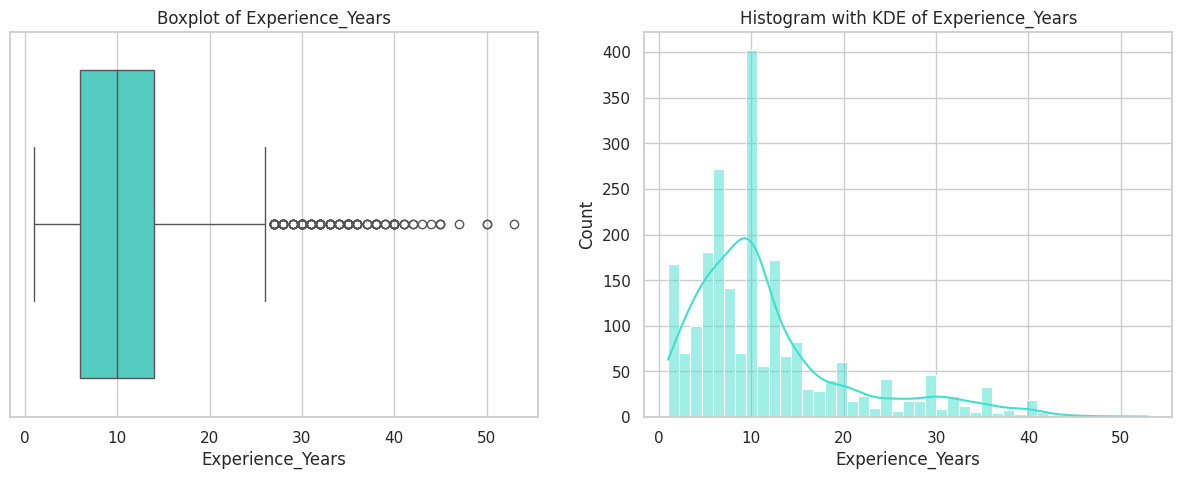

Minimum of Experience_Years: 1.0
Maximum of Experience_Years: 53.0


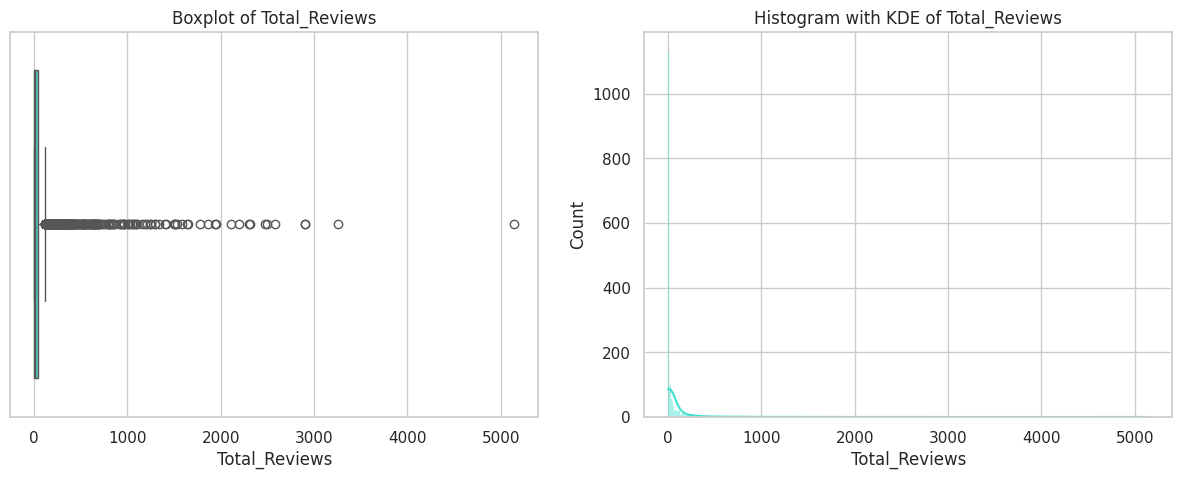

Minimum of Total_Reviews: 0
Maximum of Total_Reviews: 5147


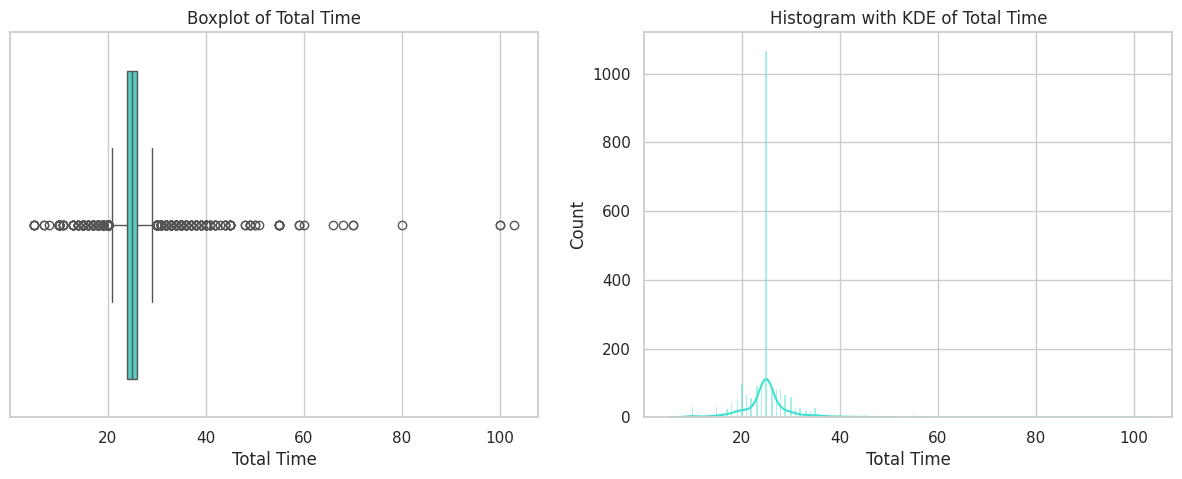

Minimum of Total Time: 5
Maximum of Total Time: 103


In [ ]:
for col in num_cols:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f'Boxplot of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(x=df[col], kde=True, color='turquoise')
    plt.title(f'Histogram with KDE of {col}')

    plt.show()

    print(f'Minimum of {col}: {df[col].min()}')
    print(f'Maximum of {col}: {df[col].max()}')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def show_distributions(data, col):
    plt.figure(figsize=(12, 4))

    # Plotting the histogram without any transformation
    plt.subplot(1, 4, 1)
    sns.histplot(data[col], kde=True, color='purple')
    plt.title('Original Data')

    # Plotting the histogram with log transformation
    plt.subplot(1, 4, 2)
    sns.histplot(np.log1p(data[col]), kde=True, color='blue')
    plt.title('Log Transformation')

    # Plotting the histogram with cubic root transformation
    plt.subplot(1, 4, 3)
    sns.histplot(np.cbrt(data[col]), kde=True, color='red')
    plt.title('Cubic Root Transformation')

    # Plotting the histogram with square root transformation
    plt.subplot(1, 4, 4)
    sns.histplot(np.sqrt(data[col]), kde=True, color='green')
    plt.title('Square Root Transformation')

    plt.suptitle(f'Distributions for Column {col}', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()

    # Display skewness for each transformation
    print(f"Skewness without transformation = {data[col].skew()}")
    print(f"Skewness with log transformation = {np.log1p(data[col]).skew()}")
    print(f"Skewness with cubic root transformation = {np.cbrt(data[col]).skew()}")
    print(f"Skewness with square root transformation = {np.sqrt(data[col]).skew()}")


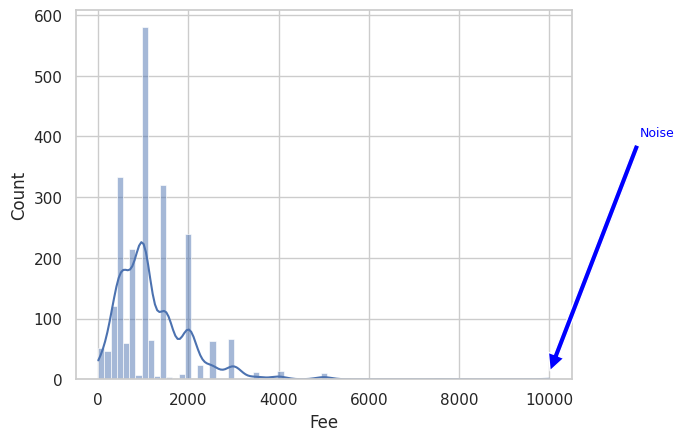

In [ ]:
sns.histplot(df['Fee'], kde=True)

# Annotate the point indicating noise
plt.annotate('Noise', xy=(10000, 10), xytext=(12000, 400), color='blue', fontsize=9,
             arrowprops=dict(facecolor='blue', shrink=0.01))

plt.show()

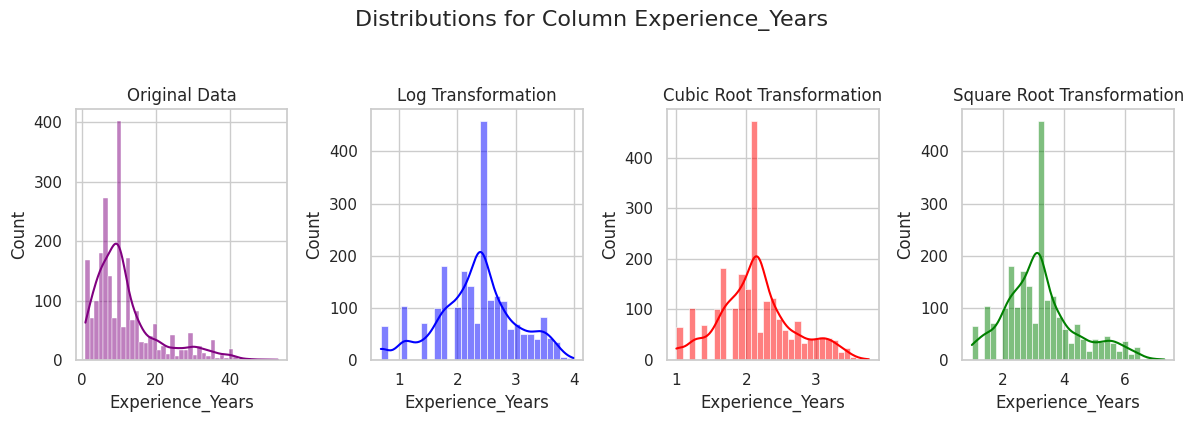

Skewness without transformation = 1.5204422287867962
Skewness with log transformation = -0.18547356557373515
Skewness with cubic root transformation = 0.28300822243572665
Skewness with square root transformation = 0.6398264843577264


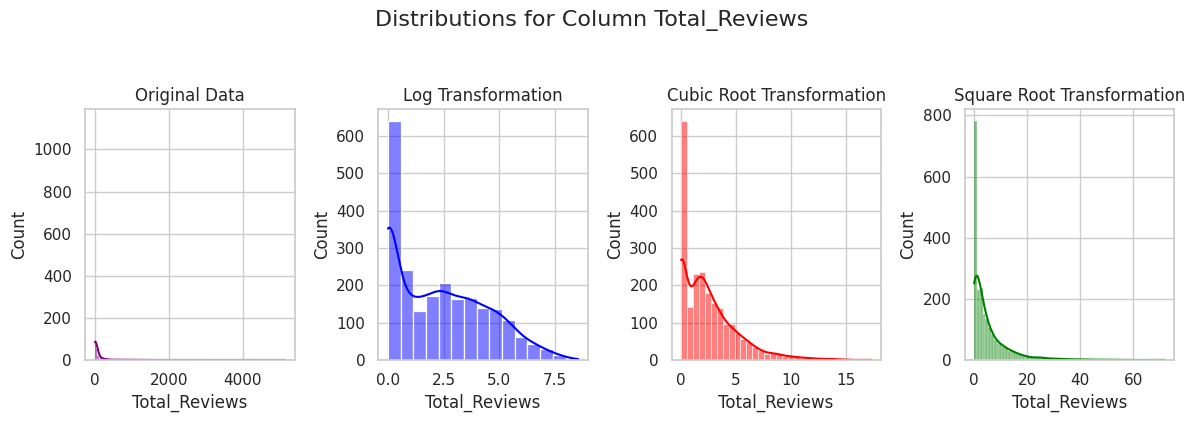

Skewness without transformation = 7.534411365574701
Skewness with log transformation = 0.5081647863691365
Skewness with cubic root transformation = 1.4768280442675956
Skewness with square root transformation = 2.832658657790208


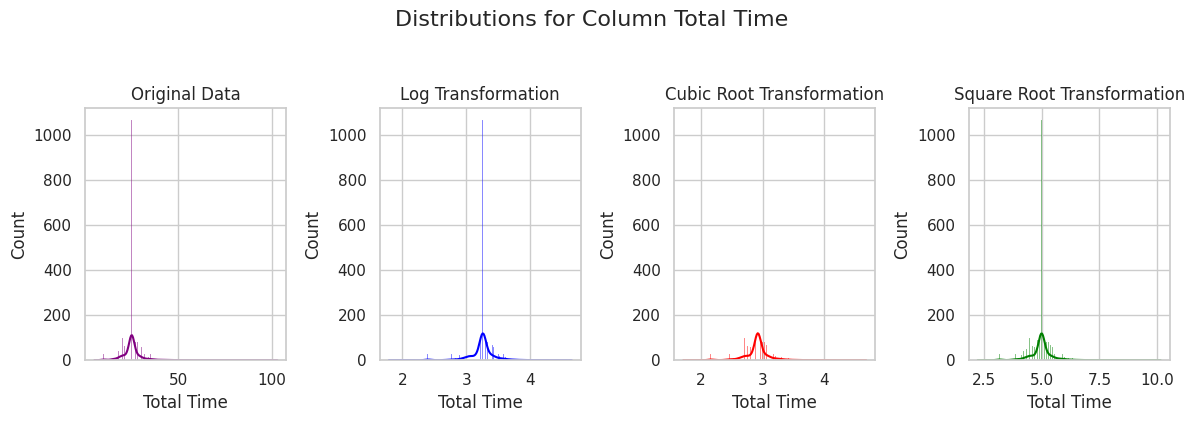

Skewness without transformation = 3.5847780660419444
Skewness with log transformation = -0.709280391969337
Skewness with cubic root transformation = 0.42879619139195285
Skewness with square root transformation = 1.1291989112920338


In [ ]:
for col in num_cols:
    show_distributions(df,col)

In [ ]:
def show_qq(data, col):
    plt.figure(figsize=(12, 4))

    # Plotting the Q-Q plot without any transformation
    plt.subplot(1, 4, 1)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title('Original Data')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    # Plotting the Q-Q plot with log transformation
    plt.subplot(1, 4, 2)
    stats.probplot(np.log1p(data[col]), dist="norm", plot=plt)
    plt.title('Log Transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    # Plotting the Q-Q plot with cubic root transformation
    plt.subplot(1, 4, 3)
    stats.probplot(np.cbrt(data[col]), dist="norm", plot=plt)
    plt.title('Cubic Root Transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    # Plotting the Q-Q plot with square root transformation
    plt.subplot(1, 4, 4)
    stats.probplot(np.sqrt(data[col]), dist="norm", plot=plt)
    plt.title('Square Root Transformation')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    plt.suptitle(f'Q-Q Plot for Column {col}', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()


Generating Q-Q plots for each transformation applied to visualize the degree of conformity to normal distribution and assess the effectiveness of the transformation in reducing skewness.

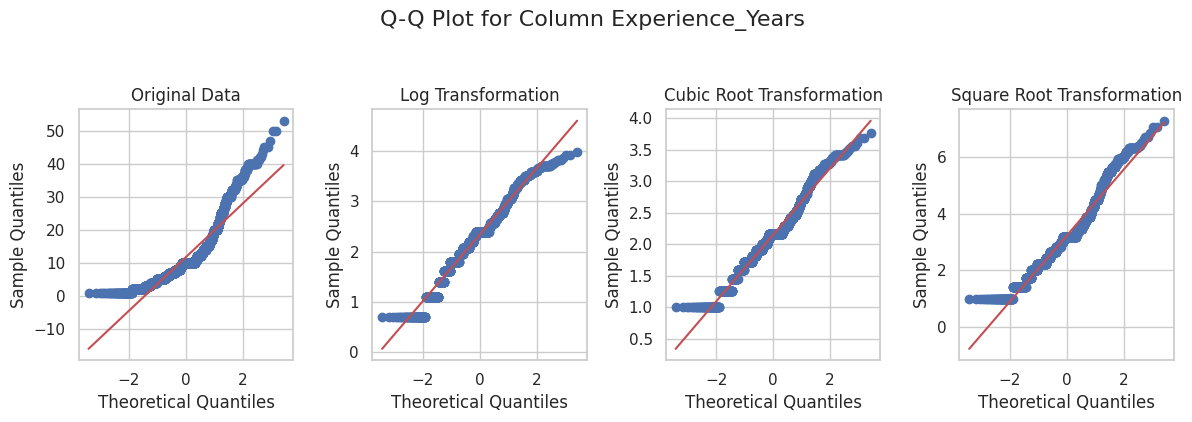

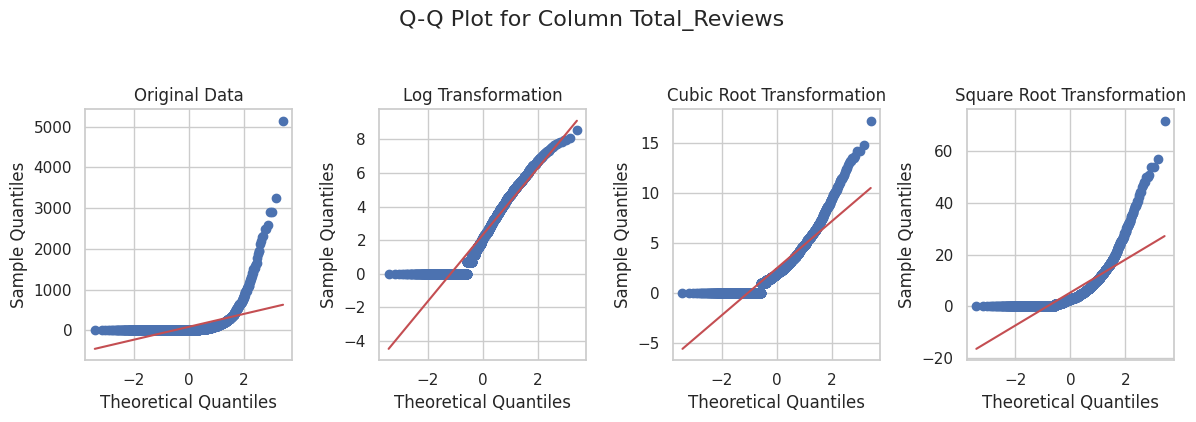

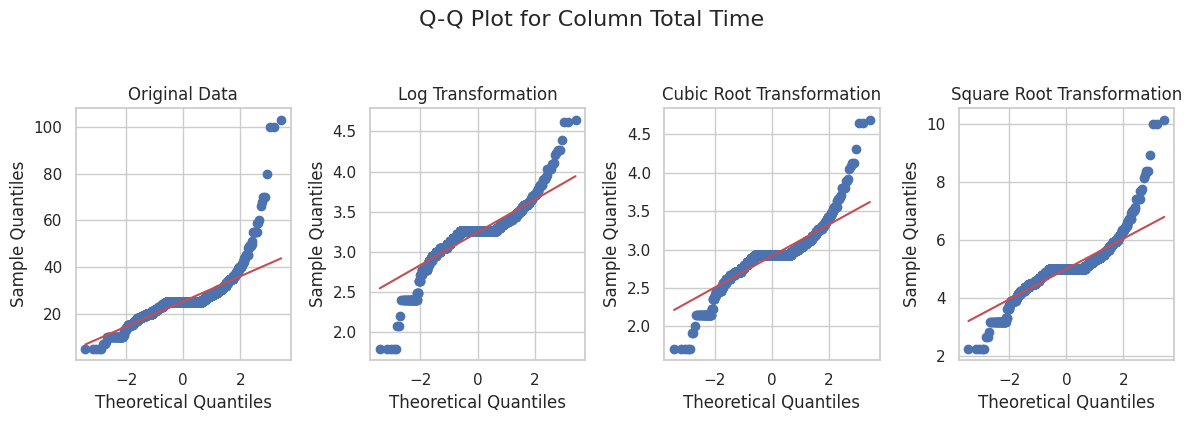

In [ ]:
for col in num_cols:
    show_qq(df,col)

In [ ]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for col in num_cols:
    lower_limit, upper_limit = calculate_outliers(df[col])
    lower_outliers = len(df[df[col] < lower_limit])
    upper_outliers = len(df[df[col] > upper_limit])
    total_outliers = lower_outliers + upper_outliers
    outlier_percentage = (total_outliers / df.shape[0]) * 100

    print(f"Total outliers in column before transformation {col}: {total_outliers}, Percentage: {outlier_percentage}%")
    print('-'*100)

Total outliers in column before transformation Experience_Years: 211, Percentage: 9.373611728120835%
----------------------------------------------------------------------------------------------------
Total outliers in column before transformation Total_Reviews: 330, Percentage: 14.660151043980454%
----------------------------------------------------------------------------------------------------
Total outliers in column before transformation Total Time: 575, Percentage: 25.544202576632607%
----------------------------------------------------------------------------------------------------


In [ ]:

# # Apply log transformation to 'Experience_Years' and 'Total_Reviews'
# df['Experience_Years'] = np.log1p(df['Experience_Years'])
# df['Total_Reviews'] = np.log1p(df['Total_Reviews'])

# # Apply cubic root transformation to 'Total_Time'
# df['Total Time'] = np.cbrt(df['Total Time'])


In [ ]:
# df['Total_Reviews'] = df[''].apply(lambda x: x**(1/3))


In [ ]:
for col in num_cols:
    lower_limit, upper_limit = calculate_outliers(df[col])
    lower_outliers = len(df[df[col] < lower_limit])
    upper_outliers = len(df[df[col] > upper_limit])
    total_outliers = lower_outliers + upper_outliers
    outlier_percentage = (total_outliers / df.shape[0]) * 100

    print(f"Total outliers in column aftar log transformation {col}: {total_outliers}, Percentage: {outlier_percentage}%")
    print('-'*100)

Total outliers in column aftar log transformation Experience_Years: 211, Percentage: 9.373611728120835%
----------------------------------------------------------------------------------------------------
Total outliers in column aftar log transformation Total_Reviews: 330, Percentage: 14.660151043980454%
----------------------------------------------------------------------------------------------------
Total outliers in column aftar log transformation Total Time: 575, Percentage: 25.544202576632607%
----------------------------------------------------------------------------------------------------


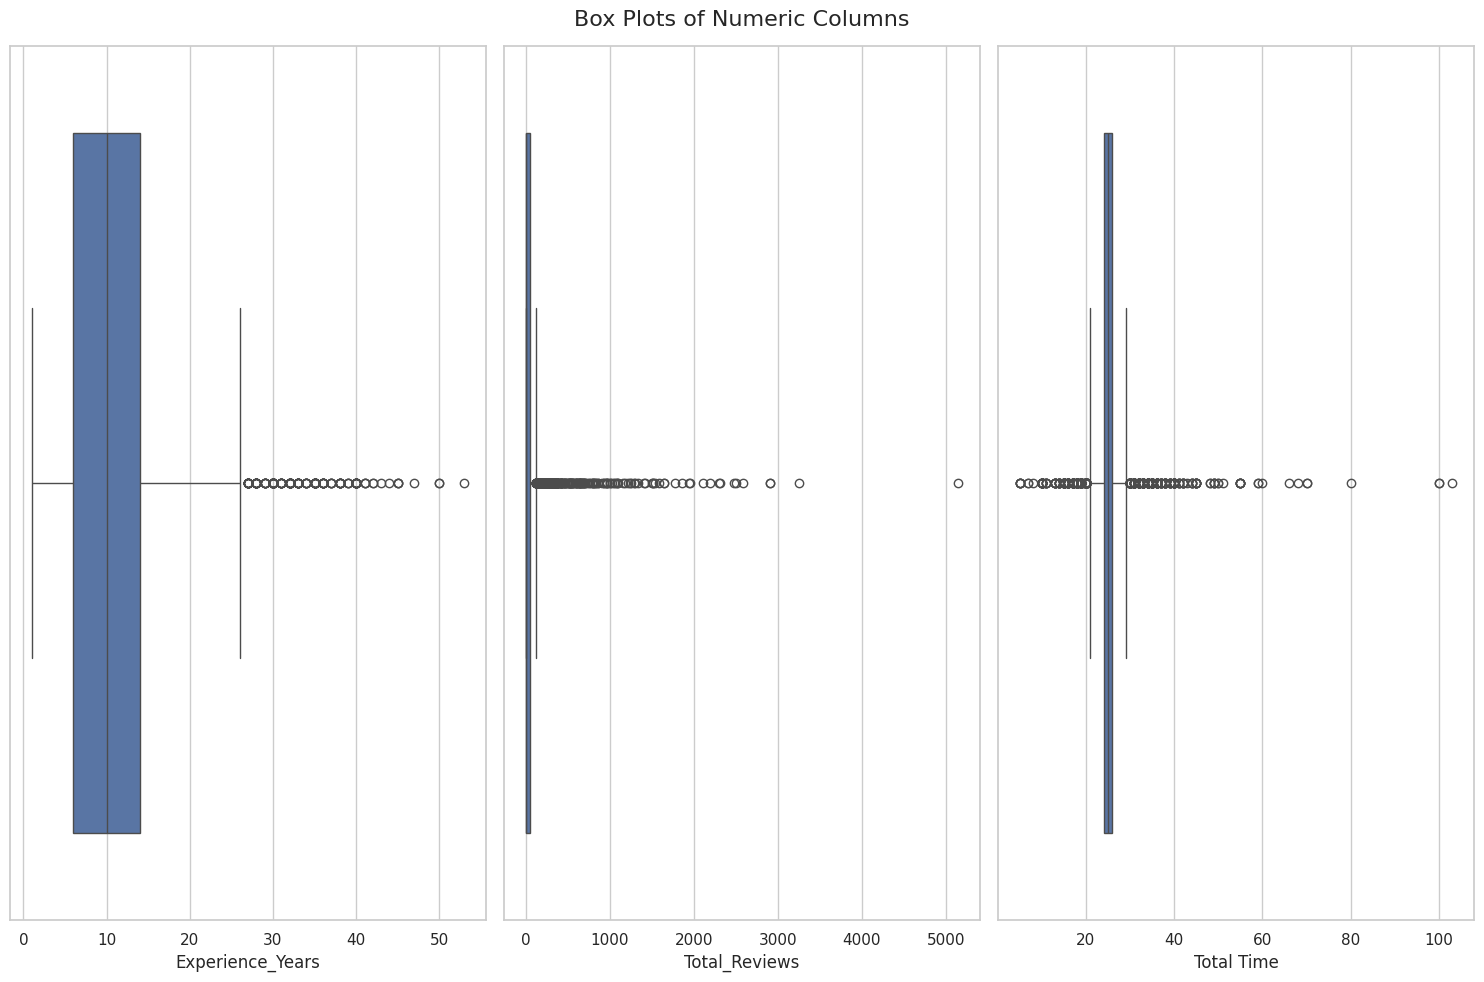

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over columns and create box plots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title("")  # Clear the title for individual plots

# Set a common title for all plots
fig.suptitle('Box Plots of Numeric Columns', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#100
# numerical_cols = ['Experience_Years', 'Total_Reviews','Total Time']

# scaler = StandardScaler()

# # Iterate over each numerical column
# for col in numerical_cols:
#     # Fit and transform the column
#     df[col] = scaler.fit_transform(df[[col]])

<Figure size 800x400 with 0 Axes>

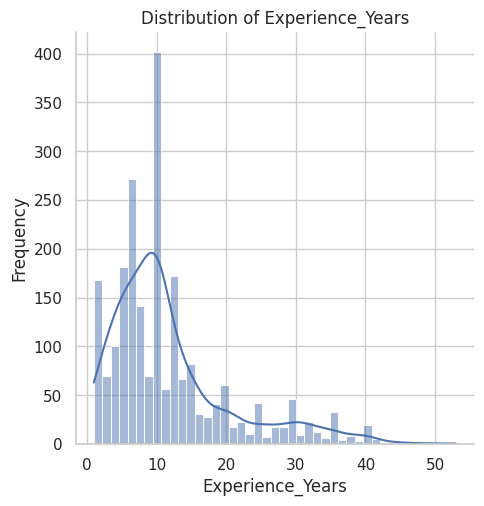

<Figure size 800x400 with 0 Axes>

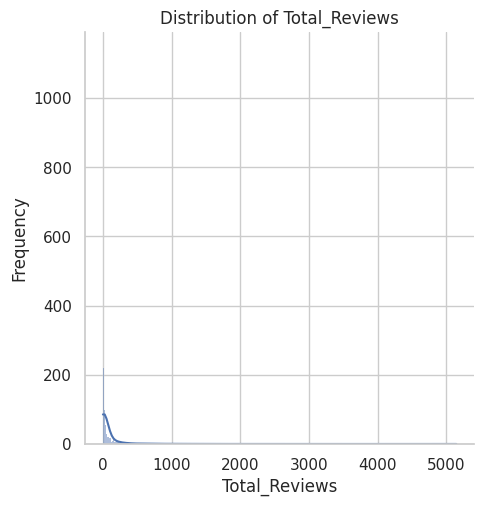

<Figure size 800x400 with 0 Axes>

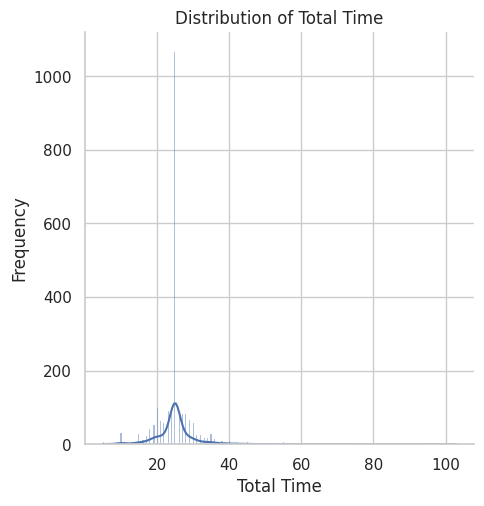

In [ ]:
numerical_cols = ['Experience_Years', 'Total_Reviews','Total Time']

for col in numerical_cols:

    plt.figure(figsize=(8, 4))
    sns.displot(x=df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Scaling

<ipython-input-220-73b6f90bd926>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




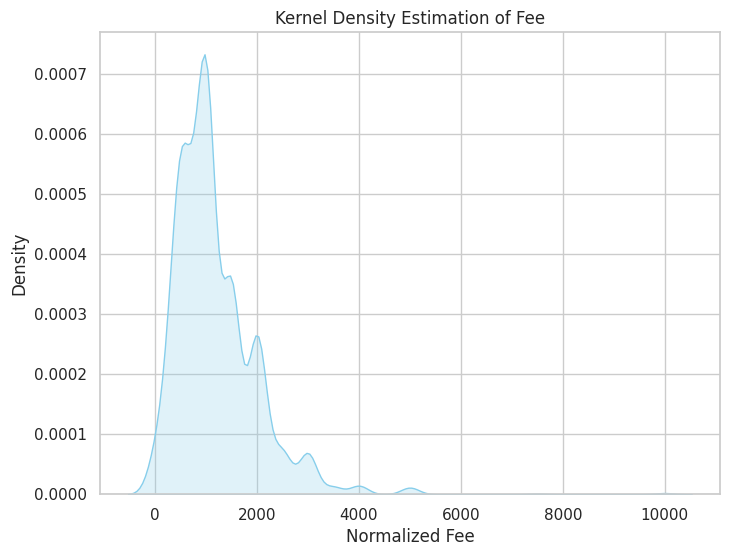

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a KDE plot of the normalized 'Fee' column
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Fee'], shade=True, color="skyblue")
plt.title('Kernel Density Estimation of Fee')
plt.xlabel('Normalized Fee')
plt.ylabel('Density')
plt.show()

## Encoding data

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['City', 'Specialization', 'Doctor Qualification', 'Titles'], dtype='object')

* Title

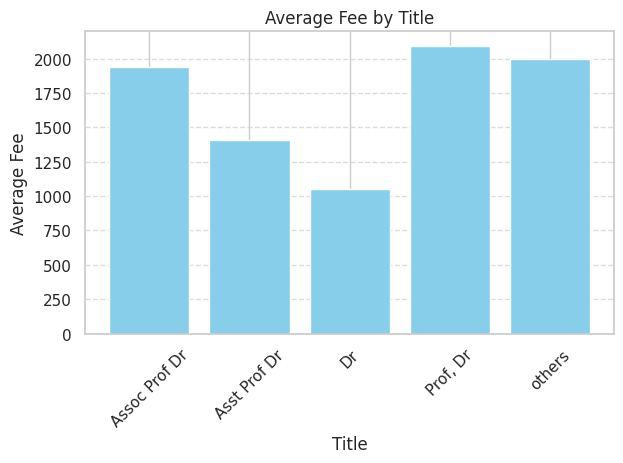

In [ ]:
average_fee_by_title = df.groupby('Titles')['Fee'].mean()

# Plot the bar graph
plt.bar(average_fee_by_title.index, average_fee_by_title.values, color='skyblue')
plt.title('Average Fee by Title')
plt.xlabel('Title')
plt.ylabel('Average Fee')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
print(df['Titles'].value_counts())
print('-'*100)
def encode_fee_by_title_avg_reverse(df, fee_col, title_col):
    # Calculate the average fee for each title
    average_fee_by_title = df.groupby(title_col)[fee_col].mean()

    # Rank the titles based on average fees in reverse order
    ranked_titles = average_fee_by_title.rank(method='dense', ascending=True).astype(int)

    # Subtract 1 from each rank to make it zero-based
    ranked_titles -= 1

    # Add encoding as a new column in the DataFrame
    encoded_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    encoded_df['Titles'] = ranked_titles.loc[df[title_col]].values

    return encoded_df


# Apply the function to encode the fee column
encoded_df = encode_fee_by_title_avg_reverse(df, 'Fee', 'Titles')





print( encoded_df['Titles'].value_counts())
print('-'*100)

Titles
Dr               1812
Asst Prof Dr      222
Prof, Dr          138
Assoc Prof Dr      77
others              2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Titles
0    1812
1     222
4     138
2      77
3       2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:

def calculate_fee_group(df):
    # Grouping by 'Titles' and calculating the mean of 'Fee' for each group
    fee_by_title = df.groupby('Titles')['Fee'].mean()
    # Sorting the result by average fee in descending order
    fee_by_title_sorted = fee_by_title.sort_values(ascending=False)
    # Creating an encoding based on the sorted order
    encoding = {title: i for i, title in enumerate(fee_by_title_sorted.index)}
    # Encoding the titles based on the sorted order
    encoded_titles = df['Titles'].map(encoding)
    return encoded_titles

In [ ]:
fee_by_title = calculate_fee_group(df)
print(fee_by_title)
df['Titles']= fee_by_title

0       4
1       4
2       4
3       4
4       4
       ..
2380    4
2381    4
2382    4
2384    3
2385    4
Name: Titles, Length: 2251, dtype: int64


In [ ]:
df['Titles'].value_counts()

Titles
4    1812
3     222
0     138
2      77
1       2
Name: count, dtype: int64

* Specialization encoding

In [ ]:
top_15_specializations = df['Specialization'].value_counts().head(15)

df['Specialization'] = df['Specialization'].apply(lambda x: x if x in top_15_specializations.index else 'Others')

specialization_counts = df['Specialization'].value_counts()

print("Specialization Counts including 'Others':")
print(specialization_counts)
onehot_encoded = pd.get_dummies(df['Specialization']).astype(int)

df_encoded = pd.concat([df, onehot_encoded], axis=1)
df_encoded
import category_encoders as ce
df = df_encoded

Specialization Counts including 'Others':
Specialization
General Physician     392
Gynecologist          254
Pediatrician          246
Orthopedic Surgeon    192
Dermatologist         177
Others                165
Gastroenterologist    122
Pulmonologist         117
Neuro Surgeon         107
Urologist              95
Neurologist            82
Andrologist            79
Nephrologist           76
Ent Specialist         69
Eye Surgeon            61
Ophthalmologist        17
Name: count, dtype: int64


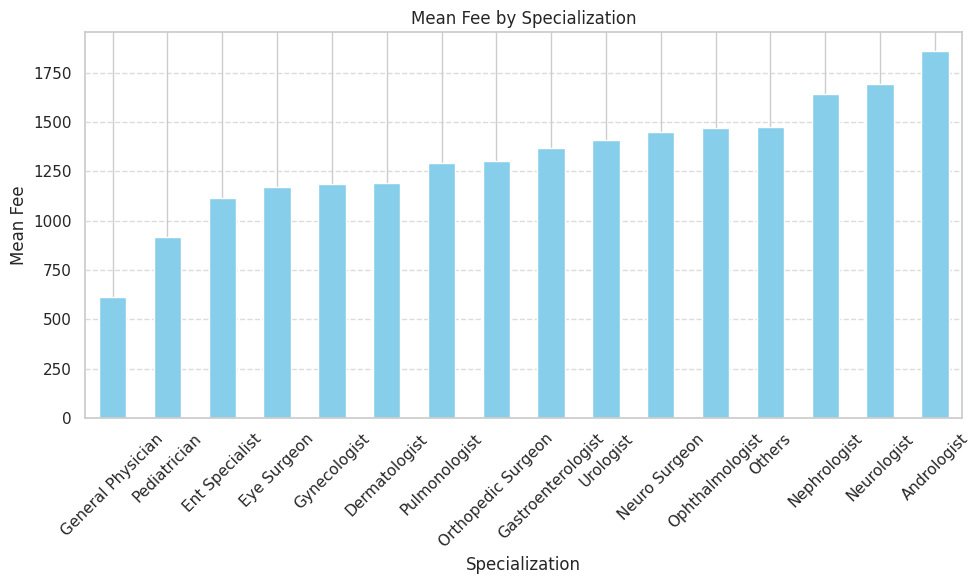

In [ ]:
specialization_mean_fee = df.groupby('Specialization')['Fee'].mean().sort_values()

# Plotting the mean fee for each specialization
plt.figure(figsize=(10, 6))
specialization_mean_fee.plot(kind='bar', color='skyblue')
plt.title('Mean Fee by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Mean Fee')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(['Specialization'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2251 entries, 0 to 2385
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   City                       2251 non-null   object  
 1   Doctor Qualification       2251 non-null   object  
 2   Experience_Years           2251 non-null   float64 
 3   Total_Reviews              2251 non-null   int64   
 4   Patient_Satisfaction_Rate  2251 non-null   int64   
 5   Fee                        2251 non-null   int64   
 6   Titles                     2251 non-null   int64   
 7   Specialization Count       2251 non-null   int64   
 8   has_Doctors_Link           2251 non-null   int64   
 9   has_hospital_address       2251 non-null   int64   
 10  Experience_Group           2081 non-null   category
 11  Total Time                 2251 non-null   int64   
 12  Andrologist                2251 non-null   int64   
 13  Dermatologist              2251 non-nu

In [ ]:
import category_encoders as ce

target_encoder_qual = ce.TargetEncoder(cols=['Doctor Qualification'])
df['Doctor_Qualification_encoded'] = target_encoder_qual.fit_transform(df['Doctor Qualification'], df['Fee'])

# Target encoding for 'City'
target_encoder_city = ce.TargetEncoder(cols=['City'])
df['City_encoded'] = target_encoder_city.fit_transform(df['City'], df['Fee'])

# Drop original columns if needed
df.drop(['Doctor Qualification', 'City'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())

   Experience_Years  Total_Reviews  Patient_Satisfaction_Rate   Fee  Titles  \
0               6.0             11                        100  2000       4   
1               1.0              0                         94   500       4   
2               6.0              9                        100  1000       4   
3              11.0             71                         96   800       4   
4              12.0            199                        100  1500       4   

   Specialization Count  has_Doctors_Link  has_hospital_address  \
0                     1                 1                     1   
1                     1                 0                     0   
2                     1                 1                     1   
3                     1                 1                     1   
4                     1                 1                     1   

  Experience_Group  Total Time  ...  Neuro Surgeon  Neurologist  \
0         Beginner          25  ...              0     

In [ ]:
print(df.head())

   Experience_Years  Total_Reviews  Patient_Satisfaction_Rate   Fee  Titles  \
0               6.0             11                        100  2000       4   
1               1.0              0                         94   500       4   
2               6.0              9                        100  1000       4   
3              11.0             71                         96   800       4   
4              12.0            199                        100  1500       4   

   Specialization Count  has_Doctors_Link  has_hospital_address  \
0                     1                 1                     1   
1                     1                 0                     0   
2                     1                 1                     1   
3                     1                 1                     1   
4                     1                 1                     1   

  Experience_Group  Total Time  ...  Neuro Surgeon  Neurologist  \
0         Beginner          25  ...              0     

In [ ]:
df.isna().sum()

Experience_Years                  0
Total_Reviews                     0
Patient_Satisfaction_Rate         0
Fee                               0
Titles                            0
Specialization Count              0
has_Doctors_Link                  0
has_hospital_address              0
Experience_Group                170
Total Time                        0
Andrologist                       0
Dermatologist                     0
Ent Specialist                    0
Eye Surgeon                       0
Gastroenterologist                0
General Physician                 0
Gynecologist                      0
Nephrologist                      0
Neuro Surgeon                     0
Neurologist                       0
Ophthalmologist                   0
Orthopedic Surgeon                0
Others                            0
Pediatrician                      0
Pulmonologist                     0
Urologist                         0
Doctor_Qualification_encoded      0
City_encoded                

In [ ]:
# # Ensure 'Hospital Address' column contains string values
# df['Hospital Address'] = df['Hospital Address'].astype(str)

# # Combine Hospital Address into a single string without commas
# df['Hospital Address'] = df['Hospital Address'].apply(lambda x: ' '.join([item.strip() for item in x.split(', ')]))

# label_encoder = LabelEncoder()

# df['Hospital Address'] = label_encoder.fit_transform(df['Hospital Address'])

# df['Hospital Address'].unique()

In [ ]:
# label_encoder = LabelEncoder()

# for col in to_encode:
#     df[col] = label_encoder.fit_transform(df[col])
#     print(df[col].unique())
#     print('-'*40)

In [ ]:
# filePath=r'truefinaldf.csv'

In [ ]:
#df.to_csv(filePath, index=False)

In [ ]:
# numerical_cols = [col for col in df.columns if col != 'Fee']

# scaler = MinMaxScaler()

# # Iterate over each numerical column
# for col in numerical_cols:
#     # Fit and transform the column
#     df[col] = scaler.fit_transform(df[[col]])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# numerical_cols = [col for col in df.columns if col != 'Fee']

# scaler = StandardScaler()

# # Iterate over each numerical column
# for col in numerical_cols:
#     # Fit and transform the column
#     df[col] = scaler.fit_transform(df[[col]])

# # Display the scaled DataFrame
# print(df.head())

#Modeling and feature selection

In [ ]:
num_columns = df.shape[1]

print("Number of columns in the DataFrame:", num_columns)

Number of columns in the DataFrame: 28


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

# Now, calculate the correlation
correlation_with_fee = df.corr()['Fee'].sort_values(ascending=False)

print("Correlation with 'fee' column:")
print(correlation_with_fee)

Correlation with 'fee' column:
Fee                             1.000000
Doctor_Qualification_encoded    0.601664
City_encoded                    0.512476
Experience_Years                0.440910
Total_Reviews                   0.316714
has_Doctors_Link                0.316232
has_hospital_address            0.245319
Andrologist                     0.157193
Specialization Count            0.147447
Neurologist                     0.120682
Total Time                      0.119509
Nephrologist                    0.104714
Others                          0.099581
Neuro Surgeon                   0.071887
Urologist                       0.057757
Gastroenterologist              0.053833
Orthopedic Surgeon              0.044829
Pulmonologist                   0.031664
Ophthalmologist                 0.030403
Patient_Satisfaction_Rate       0.028405
Dermatologist                   0.002335
Gynecologist                    0.001638
Eye Surgeon                    -0.003119
Ent Specialist            

In [ ]:
df.drop(['Specialization Count'], axis=1, inplace=True)

In [ ]:
# correlation_with_fees = df.corr()['Fee'].sort_values(ascending=False)

# correlation_df = pd.DataFrame({'Columns': correlation_with_fees.index, 'Correlation': correlation_with_fees.values})

# fig = px.bar(correlation_df, x='Columns', y='Correlation', color='Correlation',
#              color_continuous_scale='blues', text='Correlation')

# fig.update_layout(title='Correlation with Fees Column',
#                   xaxis_title='Columns',
#                   yaxis_title='Correlation Coefficient',
#                   xaxis_tickangle=-90,
#                   width=3000, height=800)  # Set the width and height in pixels

# fig.show()


exp yrs ,ttl rev , n of qual

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2251 entries, 0 to 2385
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Experience_Years              2251 non-null   float64
 1   Total_Reviews                 2251 non-null   int64  
 2   Patient_Satisfaction_Rate     2251 non-null   int64  
 3   Fee                           2251 non-null   int64  
 4   Titles                        2251 non-null   int64  
 5   has_Doctors_Link              2251 non-null   int64  
 6   has_hospital_address          2251 non-null   int64  
 7   Experience_Group              0 non-null      float64
 8   Total Time                    2251 non-null   int64  
 9   Andrologist                   2251 non-null   int64  
 10  Dermatologist                 2251 non-null   int64  
 11  Ent Specialist                2251 non-null   int64  
 12  Eye Surgeon                   2251 non-null   int64  
 13  Gastroen

In [ ]:
df.shape

(2251, 26)

In [ ]:
import time
from sklearn.ensemble import GradientBoostingRegressor

def evaluate_regression_models(X_train, X_test, y_train, y_test):

    np.random.seed(42)

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(random_state=42),
        'Lasso Regression': Lasso(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
        'XGBoost Regressor': xgb.XGBRegressor(random_state=42),
        # 'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
        # 'LGBM Regressor': LGBMRegressor(random_state=42,verbose=-1)  # Remove LGBMRegressor
    }

    best_hyperparameters = {}
    train_results = {'Model': [], 'Train MSE': [], 'Train RMSE': [], 'Train R2': [], 'Train Time (s)': []}
    test_results = {'Model': [], 'Test MSE': [], 'Test RMSE': [], 'Test R2': [], 'Test Time (s)': []}

    for model_name, model in models.items():
        param_distributions = {}
        if model_name in ['Ridge Regression', 'Lasso Regression']:
            param_distributions = {'alpha': uniform(0, 100)}
        elif model_name == 'Random Forest Regressor':
            param_distributions = {'n_estimators': randint(100, 200), 'max_depth': [None, 10, 20], 'min_samples_split': randint(2, 10)}
        elif model_name == 'AdaBoost Regressor':
            param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1)}
        elif model_name == 'XGBoost Regressor':
            param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1), 'max_depth': randint(2, 7)}


        # elif model_name in ['Gradient Boosting Regressor', 'LGBM Regressor']:  # Modify for LGBMRegressor
        #     param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1), 'max_depth': randint(2, 7)}

        start_train_time = time.time()
        random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        end_train_time = time.time()

        best_hyperparameters[model_name] = random_search.best_params_

        best_model = random_search.best_estimator_
        best_model.fit(X_train, y_train)

        # Print selected features
        print(f"Selected features for {model_name}: {X_train.columns}")

        start_pred_time_test = time.time()
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        end_pred_time_test = time.time()

        train_mse, test_mse = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)
        train_rmse, test_rmse = np.sqrt(train_mse), np.sqrt(test_mse)
        train_r2, test_r2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

        train_time = (end_train_time - start_train_time)   # Convert to milliseconds
        test_time = (end_pred_time_test - start_pred_time_test)   # Convert to milliseconds

        train_results['Model'].append(model_name)
        train_results['Train MSE'].append(round(train_mse, 6))
        train_results['Train RMSE'].append(round(train_rmse, 6))
        train_results['Train R2'].append(round(train_r2, 6))
        train_results['Train Time (s)'].append(round(train_time / 1000, 6))  # Convert back to seconds

        test_results['Model'].append(model_name)
        test_results['Test MSE'].append(round(test_mse, 6))
        test_results['Test RMSE'].append(round(test_rmse, 6))
        test_results['Test R2'].append(round(test_r2, 6))
        test_results['Test Time (s)'].append(round(test_time / 1000, 6))  # Convert back to seconds

        print(f"Model: {model_name}\nBest Hyperparameters: {random_search.best_params_}\nTrain MSE: {round(train_mse, 6)}, Train RMSE: {round(train_rmse, 6)}, Train R2: {round(train_r2, 6)}, Train Time (s): {round(train_time / 1000, 6)}\nTest MSE: {round(test_mse, 6)}, Test RMSE: {round(test_rmse, 6)}, Test R2: {round(test_r2, 6)}, Test Time (s): {round(test_time / 1000, 6)}\n{'='*50}")

    return best_hyperparameters, train_results, test_results


In [ ]:
# Calculate Spearman correlation coefficients
correlation_scores = []
for column in df.drop('Fee', axis=1).columns:
    correlation, _ = spearmanr(df[column], df['Fee'])
    correlation_scores.append((column, abs(correlation)))




# Sort features by absolute correlation coefficient
correlation_scores.sort(key=lambda x: x[1], reverse=True)

# Select the top k features
k = 24  # Number of features to select
selected_features = [feat for feat, _ in correlation_scores[:k]]

# Get the selected features from the DataFrame
X = df.drop('Fee', axis=1)[selected_features]
y = df['Fee']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluating regression models
best_hyperparameters, train_results, test_results = evaluate_regression_models(X_train, X_test, y_train, y_test)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Selected features for Linear Regression: Index(['Doctor_Qualification_encoded', 'Total_Reviews', 'City_encoded',
       'Experience_Years', 'General Physician', 'has_Doctors_Link', 'Titles',
       'has_hospital_address', 'Andrologist', 'Total Time',
       'Patient_Satisfaction_Rate', 'Neurologist', 'Pediatrician',
       'Nephrologist', 'Urologist', 'Gastroenterologist', 'Orthopedic Surgeon',
       'Neuro Surgeon', 'Others', 'Pulmonologist', 'Ophthalmologist',
       'Dermatologist', 'Gynecologist', 'Ent Specialist'],
      dtype='object')
Model: Linear Regression
Best Hyperparameters: {}
Train MSE: 316286.195822, Train RMSE: 562.393275, Train R2: 0.51639, Train Time (s): 0.000104
Test MSE: 377072.903288, Test RMSE: 614.062622, Test R2: 0.509471, Test Time (s): 6e-06
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Selected features for Ridge Regression: Index(['Doctor_Qualification_encoded', 'Total_Reviews', 'Ci

In [ ]:
# Create a table for train results using Plotly
train_results_df = pd.DataFrame(train_results)
fig1 = go.Figure(data=[go.Table(header=dict(values=list(train_results_df.columns)),
                                cells=dict(values=[train_results_df[col] for col in train_results_df.columns]))])
fig1.show()

# Create a table for test results using Plotly
test_results_df = pd.DataFrame(test_results)
fig2 = go.Figure(data=[go.Table(header=dict(values=list(test_results_df.columns)),
                                cells=dict(values=[test_results_df[col] for col in test_results_df.columns]))])
fig2.show()

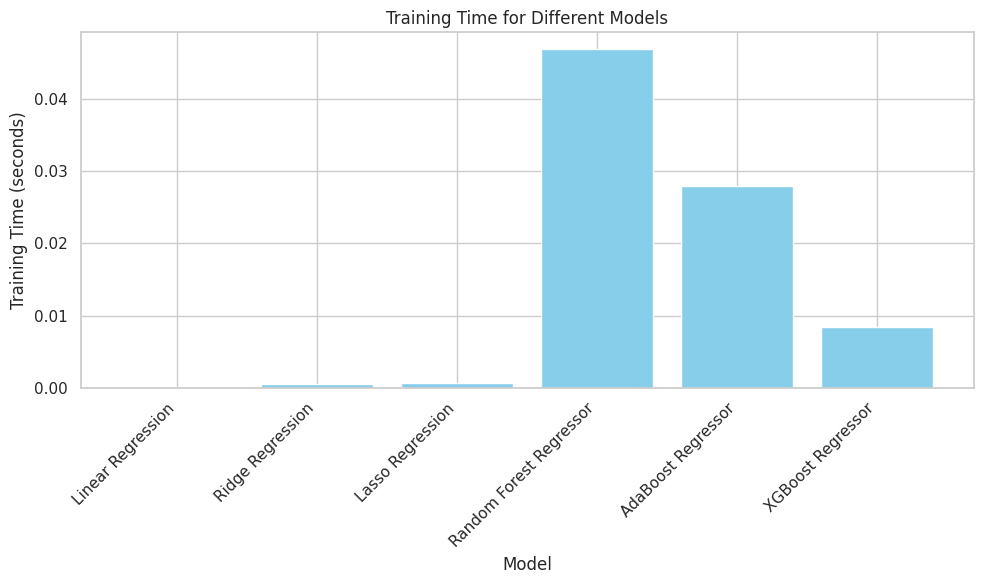

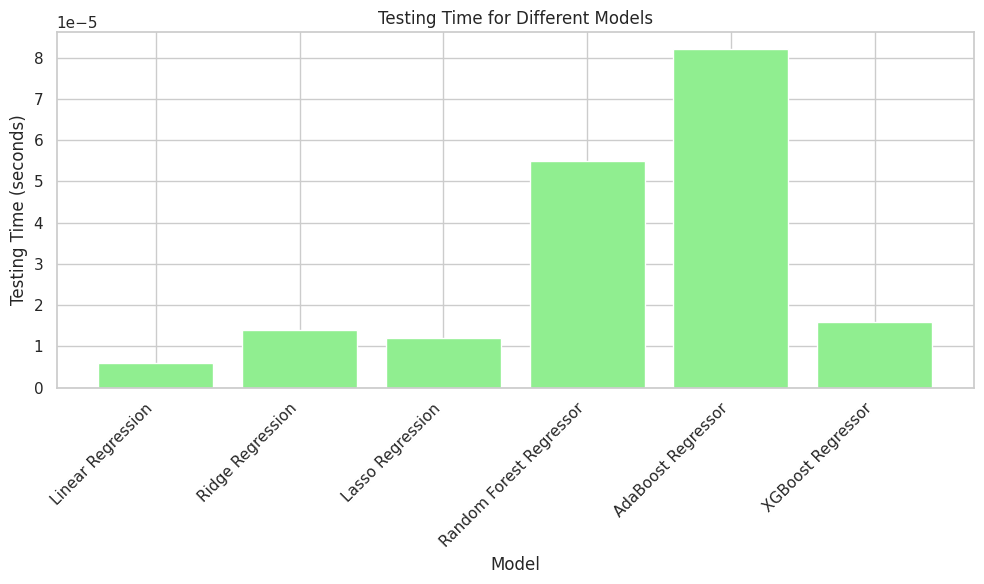

In [ ]:
import time
import matplotlib.pyplot as plt


train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

# Create bar plots for training time
plt.figure(figsize=(10, 6))
plt.bar(train_results_df['Model'], train_results_df['Train Time (s)'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create bar plots for testing time
plt.figure(figsize=(10, 6))
plt.bar(test_results_df['Model'], test_results_df['Test Time (s)'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Testing Time (seconds)')
plt.title('Testing Time for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


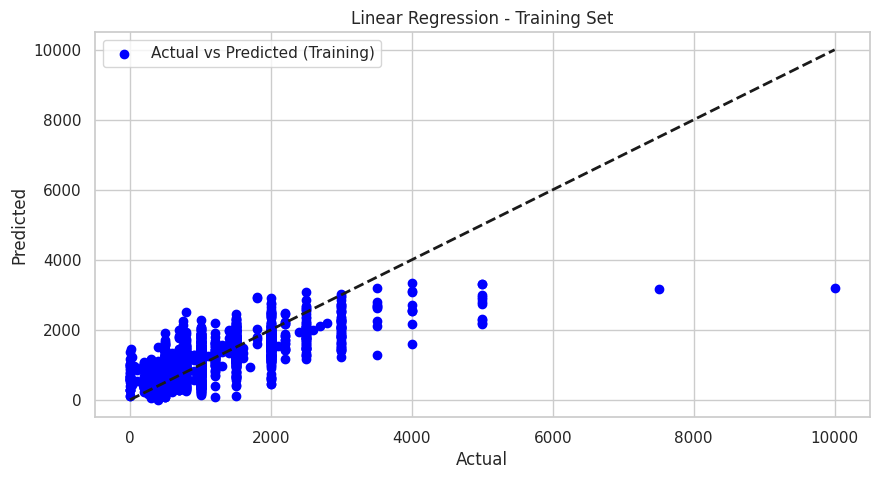

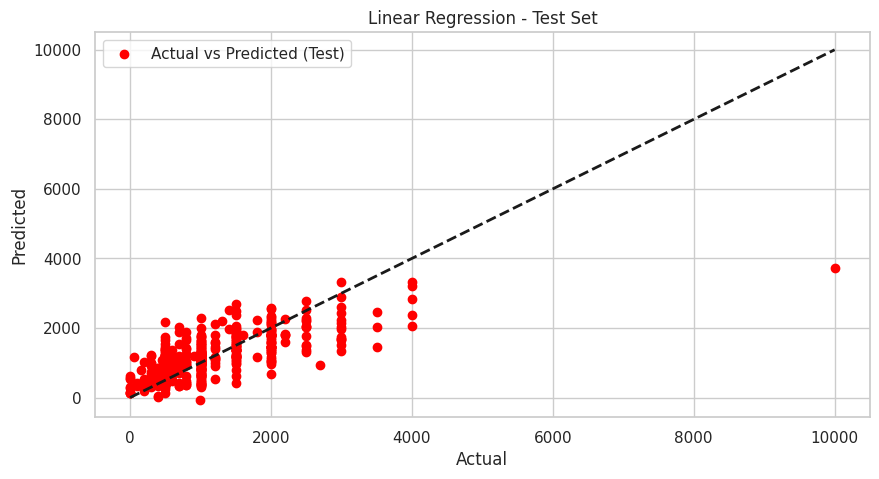

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting training set
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Training Set')
plt.legend()
plt.grid(True)
plt.show()

# Plotting test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='red', label='Actual vs Predicted (Test)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Test Set')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# def evaluate_regression_models(X_train, X_test, y_train, y_test):

#     np.random.seed(42)

#     models = {
#         'Linear Regression': LinearRegression(),
#         'Ridge Regression': Ridge(random_state=42),
#         'Lasso Regression': Lasso(random_state=42),
#         'Random Forest Regressor': RandomForestRegressor(random_state=42),
#         'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
#         'XGBoost Regressor': xgb.XGBRegressor(random_state=42),
#         'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
#         # 'LGBM Regressor': LGBMRegressor(random_state=42,verbose=-1)  # Remove LGBMRegressor
#     }

#     best_hyperparameters = {}
#     train_results = {'Model': [], 'Train MSE': [], 'Train RMSE': [], 'Train R2': [], 'Train Time (s)': []}
#     test_results = {'Model': [], 'Test MSE': [], 'Test RMSE': [], 'Test R2': [], 'Test Time (s)': []}

#     for model_name, model in models.items():
#         param_distributions = {}
#         if model_name in ['Ridge Regression', 'Lasso Regression']:
#             param_distributions = {'alpha': uniform(0, 100)}
#         elif model_name == 'Random Forest Regressor':
#             param_distributions = {'n_estimators': randint(100, 200), 'max_depth': [None, 10, 20], 'min_samples_split': randint(2, 10)}
#         elif model_name == 'AdaBoost Regressor':
#             param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1)}
#         elif model_name == 'XGBoost Regressor':
#             param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1), 'max_depth': randint(2, 7)}
#         elif model_name in ['Gradient Boosting Regressor', 'LGBM Regressor']:  # Modify for LGBMRegressor
#             param_distributions = {'n_estimators': randint(100, 200), 'learning_rate': uniform(0.01, 0.1), 'max_depth': randint(2, 7)}

#         start_train_time = time.time()
#         random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)
#         random_search.fit(X_train, y_train)
#         end_train_time = time.time()

#         best_hyperparameters[model_name] = random_search.best_params_

#         best_model = random_search.best_estimator_
#         best_model.fit(X_train, y_train)

#         # Print selected features
#         print(f"Selected features for {model_name}: {X_train.columns}")

#         start_pred_time_test = time.time()
#         y_train_pred = best_model.predict(X_train)
#         y_test_pred = best_model.predict(X_test)
#         end_pred_time_test = time.time()

#         train_mse, test_mse = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)
#         train_rmse, test_rmse = np.sqrt(train_mse), np.sqrt(test_mse)
#         train_r2, test_r2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

#         train_time = end_train_time - start_train_time
#         test_time = end_pred_time_test - start_pred_time_test

#         train_results['Model'].append(model_name)
#         train_results['Train MSE'].append(round(train_mse, 6))
#         train_results['Train RMSE'].append(round(train_rmse, 6))
#         train_results['Train R2'].append(round(train_r2, 6))
#         train_results['Train Time (s)'].append(round(train_time, 6))

#         test_results['Model'].append(model_name)
#         test_results['Test MSE'].append(round(test_mse, 6))
#         test_results['Test RMSE'].append(round(test_rmse, 6))
#         test_results['Test R2'].append(round(test_r2, 6))
#         test_results['Test Time (s)'].append(round(test_time, 6))

#         print(f"Model: {model_name}\nBest Hyperparameters: {random_search.best_params_}\nTrain MSE: {round(train_mse, 6)}, Train RMSE: {round(train_rmse, 6)}, Train R2: {round(train_r2, 6)}, Train Time (s): {round(train_time, 6)}\nTest MSE: {round(test_mse, 6)}, Test RMSE: {round(test_rmse, 6)}, Test R2: {round(test_r2, 6)}, Test Time (s): {round(test_time, 6)}\n{'='*50}")

#     return best_hyperparameters, train_results, test_results
